In [21]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings(action = 'ignore')

In [22]:
import matplotlib.font_manager as fm
from matplotlib import rc

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

In [23]:
from matplotlib import font_manager, rc

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font)

In [24]:
pal = sns.color_palette('Set2',12)

In [25]:
data= pd.read_csv('C:/Users/fsecuser508/viz_data.csv')

In [26]:
data['단가'] = round(data['결제금액']/data['결제수량'],2)

In [27]:
data.head(2)

Unnamed: 0   YM_CD    시도명  운영점포수  주변입지  AGE  SEX 상품대분류 상품중분류  결제수량    결제금액  \
0           0  202101  서울특별시   6685  가족주택   40    1  간편식사   도시락    24  126327   
1           1  202101  서울특별시   6685  가족주택   40    1  간편식사   주먹밥    32   44473   

   결제고객수  month 요일   결제시간   가구생애       단가  
0     22      1  일  00~05  신혼영유아  5263.62  
1     23      1  일  00~05  신혼영유아  1389.78

### 1. 데이터 전처리
#### (1) 범주형 변수들간의 상관관계 분석
* 편의점 이용데이터의 값들을 살펴보면 범주형 변수가 많은 것을 알 수 있다. 이에 따라 두개이상의 범주일 경우 상관관계를 분석하는 Cram's V 통계량을 이용하여 변수간의 상관성을 살펴보고자 한다. 이는 0에 가까울 수록 변수간의 상관성이 없다고 판단하며 1이 넘는 경우 변수간의 강한 상관성을 띈다고 판단한다.

In [28]:
# 월별 상품중분류별 결제수량 합계 
t1 = data.groupby(['시도명','month'], as_index = False)['결제수량'].sum()
t1.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t1_spread = t1.set_index(['시도명','month'])['sum'].unstack(fill_value = 0).reset_index()

t2 = data.groupby(['시도명','month'], as_index = False)['결제고객수'].sum()
t2.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t2_spread = t2.set_index(['시도명','month'])['sum'].unstack(fill_value = 0).reset_index()

# 결제시간별 
t3 = data.groupby(['시도명','주변입지'], as_index = False)['결제수량'].sum()
t3.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t3_spread = t3.set_index(['시도명','주변입지'])['sum'].unstack(fill_value = 0).reset_index()


t4 = data.groupby(['시도명','주변입지'], as_index = False)['결제고객수'].sum()
t4.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t4_spread = t4.set_index(['시도명','주변입지'])['sum'].unstack(fill_value = 0).reset_index()

t5 = data.groupby(['시도명','AGE'], as_index = False)['결제고객수'].sum()
t5.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t5_spread = t5.set_index(['시도명','AGE'])['sum'].unstack(fill_value = 0).reset_index()

t6 = data.groupby(['시도명','상품중분류'], as_index = False)['결제고객수'].sum()
t6.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t6_spread = t6.set_index(['시도명','상품중분류'])['sum'].unstack(fill_value = 0).reset_index()

t7 = data.groupby(['시도명','주변입지'], as_index = False)['결제고객수'].sum()
t7.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t7_spread = t7.set_index(['시도명','주변입지'])['sum'].unstack(fill_value = 0).reset_index()

t8 = data.groupby(['시도명','요일'], as_index = False)['결제고객수'].sum()
t8.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t8_spread = t8.set_index(['시도명','요일'])['sum'].unstack(fill_value = 0).reset_index()

t9 = data.groupby(['시도명','결제시간'], as_index = False)['결제고객수'].sum()
t9.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t9_spread = t9.set_index(['시도명','결제시간'])['sum'].unstack(fill_value = 0).reset_index()

t10 = data.groupby(['시도명','가구생애'], as_index = False)['결제고객수'].sum()
t10.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t10_spread = t10.set_index(['시도명','가구생애'])['sum'].unstack(fill_value = 0).reset_index()

In [29]:
import scipy.stats as stats

def corr_categorical(data) :
    ## chi-squared test statistic, sample size and minimum of rows and col
    X2 = stats.chi2_contingency(data,correction = False)[0]
    n = np.sum(data)
    minDim = min(data.shape) - 1

    # calculate Cramer's V
    V = np.sqrt((X2/n) / minDim)

    # display Cramer's V
    print(V)
    return V

In [30]:
for df in [t1_spread,t2_spread,t3_spread,t4_spread,t5_spread,t6_spread,t7_spread,t8_spread, t9_spread, t10_spread] :
    print('---------------')
    corr_categorical(df.iloc[:,1:].values)

---------------
0.009037937346120744
---------------
0.00851038147509987
---------------
0.1456649903262665
---------------
0.14743835179660597
---------------
0.052542255322296394
---------------
0.027030076860476582
---------------
0.14743835179660597
---------------
0.01218794566507181
---------------
0.02462791591335933
---------------
0.06181375507944195


In [31]:
# 월별 상품중분류별 결제수량 합계 
t1 = data.groupby(['주변입지','month'], as_index = False)['결제수량'].sum()
t1.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t1_spread = t1.set_index(['주변입지','month'])['sum'].unstack(fill_value = 0).reset_index()

t2 = data.groupby(['주변입지','month'], as_index = False)['결제고객수'].sum()
t2.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t2_spread = t2.set_index(['주변입지','month'])['sum'].unstack(fill_value = 0).reset_index()

# 결제시간별 
t3 = data.groupby(['주변입지','SEX'], as_index = False)['결제수량'].sum()
t3.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t3_spread = t3.set_index(['주변입지','SEX'])['sum'].unstack(fill_value = 0).reset_index()


t4 = data.groupby(['주변입지','SEX'], as_index = False)['결제고객수'].sum()
t4.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t4_spread = t4.set_index(['주변입지','SEX'])['sum'].unstack(fill_value = 0).reset_index()

t5 = data.groupby(['주변입지','AGE'], as_index = False)['결제고객수'].sum()
t5.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t5_spread = t5.set_index(['주변입지','AGE'])['sum'].unstack(fill_value = 0).reset_index()

t6 = data.groupby(['주변입지','상품중분류'], as_index = False)['결제고객수'].sum()
t6.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t6_spread = t6.set_index(['주변입지','상품중분류'])['sum'].unstack(fill_value = 0).reset_index()

t8 = data.groupby(['주변입지','요일'], as_index = False)['결제고객수'].sum()
t8.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t8_spread = t8.set_index(['주변입지','요일'])['sum'].unstack(fill_value = 0).reset_index()

t9 = data.groupby(['주변입지','결제시간'], as_index = False)['결제고객수'].sum()
t9.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t9_spread = t9.set_index(['주변입지','결제시간'])['sum'].unstack(fill_value = 0).reset_index()

t10 = data.groupby(['주변입지','가구생애'], as_index = False)['결제고객수'].sum()
t10.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t10_spread = t10.set_index(['주변입지','가구생애'])['sum'].unstack(fill_value = 0).reset_index()

In [32]:
for df in [t1_spread,t2_spread,t3_spread,t4_spread,t5_spread,t6_spread,t8_spread, t9_spread, t10_spread] :
    print('---------------')
    corr_categorical(df.iloc[:,1:].values)

---------------
0.018174916755849965
---------------
0.01859914230363038
---------------
0.11121050754647464
---------------
0.11197524966385357
---------------
0.10736400990480455
---------------
0.06119675774340191
---------------
0.03785541671396887
---------------
0.0876874310969898
---------------
0.10823717860663729


In [33]:
# 월별 상품중분류별 결제수량 합계 
t1 = data.groupby(['AGE','month'], as_index = False)['결제수량'].sum()
t1.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t1_spread = t1.set_index(['AGE','month'])['sum'].unstack(fill_value = 0).reset_index()

t2 = data.groupby(['AGE','month'], as_index = False)['결제고객수'].sum()
t2.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t2_spread = t2.set_index(['AGE','month'])['sum'].unstack(fill_value = 0).reset_index()

# 결제시간별 
t3 = data.groupby(['AGE','SEX'], as_index = False)['결제수량'].sum()
t3.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t3_spread = t3.set_index(['AGE','SEX'])['sum'].unstack(fill_value = 0).reset_index()


t4 = data.groupby(['AGE','SEX'], as_index = False)['결제고객수'].sum()
t4.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t4_spread = t4.set_index(['AGE','SEX'])['sum'].unstack(fill_value = 0).reset_index()


t6 = data.groupby(['AGE','상품중분류'], as_index = False)['결제고객수'].sum()
t6.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t6_spread = t6.set_index(['AGE','상품중분류'])['sum'].unstack(fill_value = 0).reset_index()

t8 = data.groupby(['AGE','요일'], as_index = False)['결제고객수'].sum()
t8.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t8_spread = t8.set_index(['AGE','요일'])['sum'].unstack(fill_value = 0).reset_index()

t9 = data.groupby(['AGE','결제시간'], as_index = False)['결제고객수'].sum()
t9.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t9_spread = t9.set_index(['AGE','결제시간'])['sum'].unstack(fill_value = 0).reset_index()

t10 = data.groupby(['AGE','가구생애'], as_index = False)['결제고객수'].sum()
t10.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t10_spread = t10.set_index(['AGE','가구생애'])['sum'].unstack(fill_value = 0).reset_index()

In [34]:
for df in [t1_spread,t2_spread,t3_spread,t4_spread,t6_spread,t8_spread, t9_spread, t10_spread] :
    print('---------------')
    corr_categorical(df.iloc[:,1:].values)

---------------
0.013066765018356772
---------------
0.01194031854177107
---------------
0.055040655305956705
---------------
0.06200900435456174
---------------
0.10331986363622901
---------------
0.0060069918168896685
---------------
0.05560369574301318
---------------
0.8536345552342522


In [35]:
# 월별 상품중분류별 결제수량 합계 
t1 = data.groupby(['SEX','month'], as_index = False)['결제수량'].sum()
t1.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t1_spread = t1.set_index(['SEX','month'])['sum'].unstack(fill_value = 0).reset_index()

t2 = data.groupby(['SEX','month'], as_index = False)['결제고객수'].sum()
t2.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t2_spread = t2.set_index(['SEX','month'])['sum'].unstack(fill_value = 0).reset_index()

t6 = data.groupby(['SEX','상품중분류'], as_index = False)['결제고객수'].sum()
t6.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t6_spread = t6.set_index(['SEX','상품중분류'])['sum'].unstack(fill_value = 0).reset_index()

t8 = data.groupby(['SEX','요일'], as_index = False)['결제고객수'].sum()
t8.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t8_spread = t8.set_index(['SEX','요일'])['sum'].unstack(fill_value = 0).reset_index()

t9 = data.groupby(['SEX','결제시간'], as_index = False)['결제고객수'].sum()
t9.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t9_spread = t9.set_index(['SEX','결제시간'])['sum'].unstack(fill_value = 0).reset_index()

t10 = data.groupby(['SEX','가구생애'], as_index = False)['결제고객수'].sum()
t10.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t10_spread = t10.set_index(['SEX','가구생애'])['sum'].unstack(fill_value = 0).reset_index()

In [36]:
for df in [t1_spread,t2_spread,t6_spread,t8_spread, t9_spread, t10_spread] :
    print('---------------')
    corr_categorical(df.iloc[:,1:].values)

---------------
0.006900830278135438
---------------
0.008139458037605653
---------------
0.18980591315120057
---------------
0.008650292685974226
---------------
0.07742135268087245
---------------
0.02110333120353883


In [37]:
t1 = data.groupby(['상품중분류','month'], as_index = False)['결제수량'].sum()
t1.rename(columns = {'결제수량' : 'sum'},inplace=True) 
t1_spread = t1.set_index(['상품중분류','month'])['sum'].unstack(fill_value = 0).reset_index()

t2 = data.groupby(['상품중분류','month'], as_index = False)['결제고객수'].sum()
t2.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t2_spread = t2.set_index(['상품중분류','month'])['sum'].unstack(fill_value = 0).reset_index()

t8 = data.groupby(['상품중분류','요일'], as_index = False)['결제고객수'].sum()
t8.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t8_spread = t8.set_index(['상품중분류','요일'])['sum'].unstack(fill_value = 0).reset_index()

t9 = data.groupby(['상품중분류','결제시간'], as_index = False)['결제고객수'].sum()
t9.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t9_spread = t9.set_index(['상품중분류','결제시간'])['sum'].unstack(fill_value = 0).reset_index()

t10 = data.groupby(['상품중분류','가구생애'], as_index = False)['결제고객수'].sum()
t10.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t10_spread = t10.set_index(['상품중분류','가구생애'])['sum'].unstack(fill_value = 0).reset_index()

In [38]:
for df in [t1_spread,t2_spread,t8_spread, t9_spread, t10_spread] :
    print('---------------')
    corr_categorical(df.iloc[:,1:].values)

---------------
0.04524681757700274
---------------
0.034059128804509835
---------------
0.02835329610384106
---------------
0.1458018530559237
---------------
0.09890947424894556


In [39]:
t8 = data.groupby(['month','요일'], as_index = False)['결제고객수'].sum()
t8.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t8_spread = t8.set_index(['month','요일'])['sum'].unstack(fill_value = 0).reset_index()

t9 = data.groupby(['month','결제시간'], as_index = False)['결제고객수'].sum()
t9.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t9_spread = t9.set_index(['month','결제시간'])['sum'].unstack(fill_value = 0).reset_index()

t10 = data.groupby(['month','가구생애'], as_index = False)['결제고객수'].sum()
t10.rename(columns = {'결제고객수' : 'sum'},inplace=True) 
t10_spread = t10.set_index(['month','가구생애'])['sum'].unstack(fill_value = 0).reset_index()

In [40]:
for df in [t8_spread, t9_spread, t10_spread] :
    print('---------------')
    corr_categorical(df.iloc[:,1:].values)

---------------
0.06068157662245711
---------------
0.013033894003757509
---------------
0.01836443832719657


# 1. EDA

## (1) 단일 변수 분석

### [요일별 결제수량 분석]

<AxesSubplot:xlabel='요일', ylabel='결제수량'>

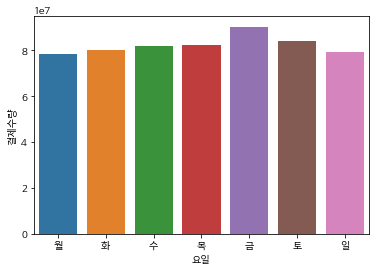

In [9]:
data1 = data.groupby(['요일'])['결제수량','결제고객수'].sum().reset_index()
sns.barplot(x = '요일', y ='결제수량', data = data1, order = ['월','화','수','목','금','토','일'])

- 금요일에 판매량과 고객수가 가장 많다.

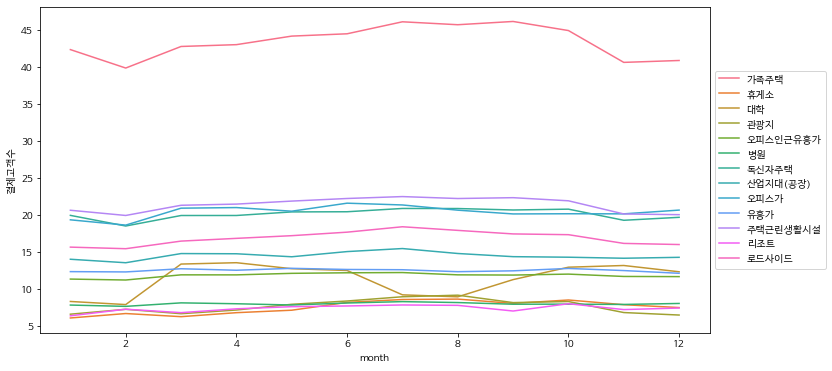

In [12]:
ax = plt.figure(figsize = (12,6))
ax = sns.lineplot(x= 'month', y = '결제고객수', hue = '주변입지', data = data,ci = None)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

- 다른 계절에 비해 겨울에 결제고객수가 비교적 낮았으며, 주변입지 중 가족주택일 경우가 다른 경우에 비해 고객수가 압도적으로 높다.

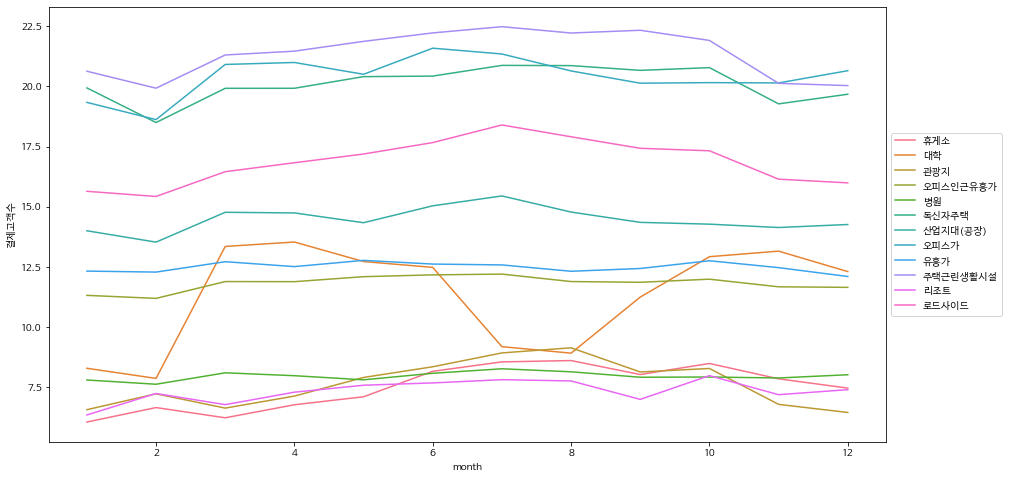

In [13]:
ax = plt.figure(figsize = (15,8))
ax = sns.lineplot(x= 'month', y = '결제고객수', hue = '주변입지', data = data[data['주변입지'] != '가족주택'], ci= None)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

- 결제고객수 1위인 가족주택을 제외했을 때, '주택근린생활시설, 독신자주택, 오피스가'가 결제고객수가 높은 상위군에 속한다. 세 주변입지 모두 고정적인 유동인구가 있다는 점에서 공통적이라고 판단했다. 반면에, 리조트, 관광지, 병원 등 시기에 따라 유동인구의 편차가 큰 곳은 결제고객수가 확연히 떨어지는 것을 확인할 수 있다.

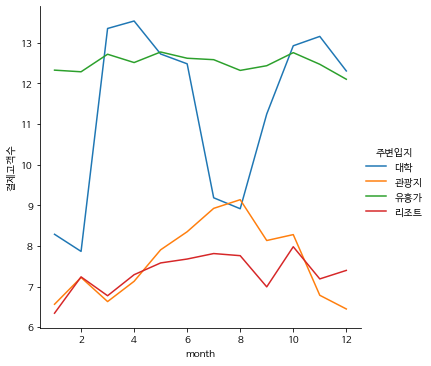

In [14]:
sns.relplot(x = 'month', y = '결제고객수', hue = '주변입지',data = data[data['주변입지'].isin(['대학','리조트','유흥가','관광지'])], kind = 'line', ci= None)

- 결제고객수 중위권 중 '대학'의 경우, 학기 중과 방학 중의 고객수에서 큰 차이를 보였다. '관광지'는 휴가철 때 고객수가 증가하는 것을 확인할 수 있다. (시기에 따라 고객수에 확연한 차이를 보이는 경우)

- 가족주택의 경우 CUST_CNT가 다른 곳보다 방문고객이 많은 것을 알 수 있다

<AxesSubplot:xlabel='SEX', ylabel='결제고객수'>

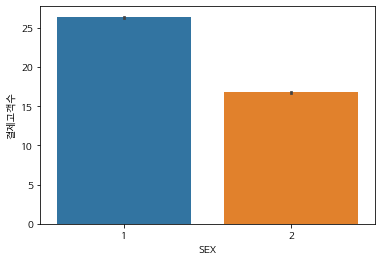

In [16]:
sns.barplot(x = 'SEX' , y ='결제고객수', data = data)

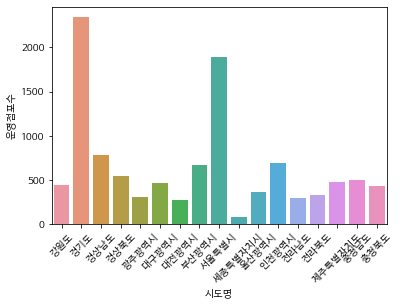

In [19]:
data3 = data.groupby('시도명')['운영점포수'].mean().reset_index()
sns.barplot(x= '시도명', y = '운영점포수', data = data3)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='AGE', ylabel='결제수량'>

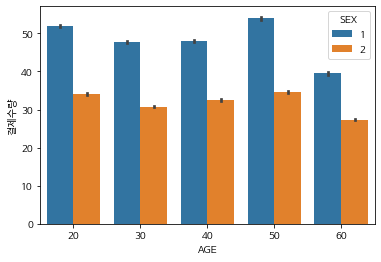

In [20]:
sns.barplot(x = 'AGE', y = '결제수량', hue = 'SEX', data= data)

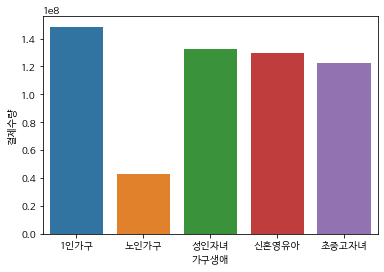

In [21]:
# 생애주기별 결제수량
data4 = data.groupby(['가구생애'])['결제수량'].sum().reset_index()
sns.barplot(x = '가구생애', y = '결제수량', data =data4)
plt.show()

### (2) 보고서 작성 관련 코드
* 연령대별 고객 라이프스타일에 집중하여 상품 판매 분석

### [월별 상품대분류의 결제수량 분석]

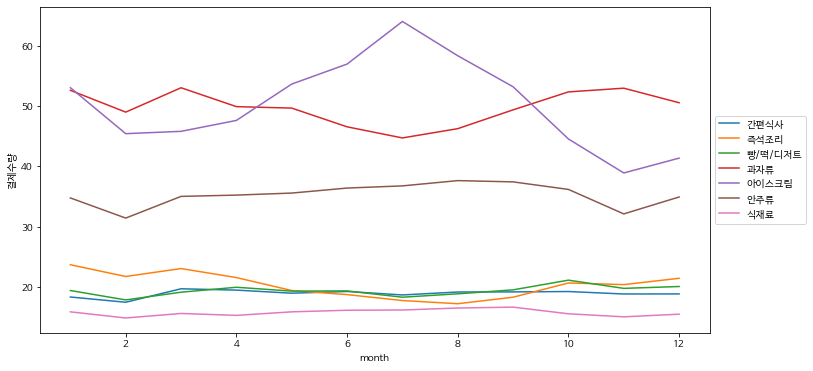

In [20]:
ax = plt.figure(figsize = (12,6))
ax = sns.lineplot(x= 'month', y = '결제수량', hue = '상품대분류', data = data[data.상품대분류.isin(['간편식사', '즉석조리', '빵/떡/디저트', '과자류', '아이스크림', '안주류', '식재료'])], ci= None)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

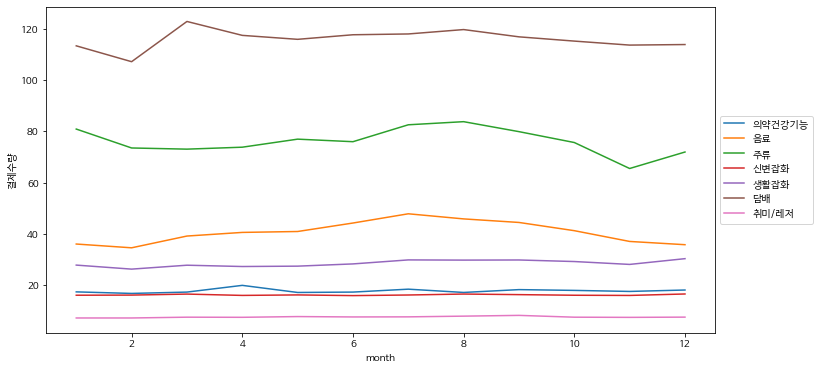

In [21]:
ax = plt.figure(figsize = (12,6))
ax = sns.lineplot(x= 'month', y = '결제수량', hue = '상품대분류', data = data[data.상품대분류.isin(['의약건강기능', '음료', '주류', '신변잡화', '생활잡화', '담배', '취미/레저'])], ci= None)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

- 상품중분류가 많아 랜덤으로 이등분하여 월별 상품대분류에 따른 결제수량 경향성을 분석하였다. 
- 여름에 결제수량이 증가한 아이스크림과 같은 통상적으로 알 수 있는 결과의 품목들과 담배를 제외하고 특이한 패턴이 있거나 결제수량이 다른 품목들보다 높은 상품들을 알아보았다. 과자류는 아이스크림 결제수량 경향성과 반대로 나타난다. 또한, 편의점에서 삼각김밥과 같은 간편식사류가 많이 팔릴 것으로 예상했던 바와 달리 간편식사류의 결제수량이 다른 상품군들에 비해 적은 것을 알 수 있으며 음료와 주류는 다른 상품들에 비해 구매수량이 많은 것을 알 수 있다. 이와 같은 이유로 라이프스타일 분석에 이러한 특징점이 있는 음료, 간편식사, 과자류, 주류에 집중하여 분석하고자 한다.

### [음료 중분류의 월별 결제수량 분석]

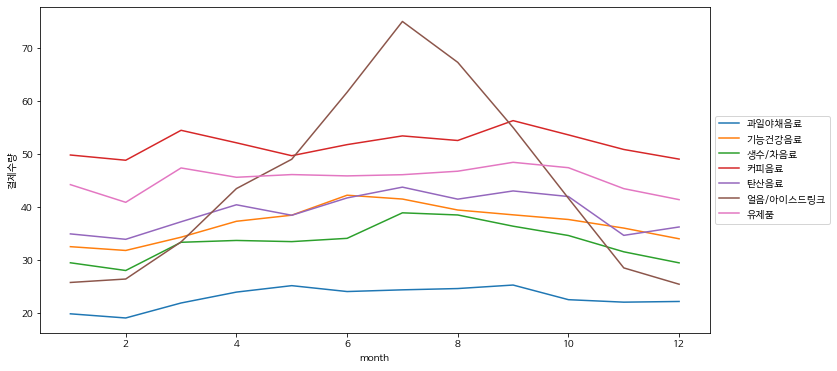

In [22]:
ax = plt.figure(figsize = (12,6))
ax = sns.lineplot(x= 'month', y = '결제수량', hue = '상품중분류', data = data[data.상품대분류.isin(['음료'])], ci= None)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

* 얼음/아이스드링크가 2월부터 꾸준히 상승하다가 7월부터 판매량이 감소하는 것을 알 수 있다

### [월별 연령대에 따른 상품 결제수량 분석]
> 음료, 가공식사제품, 간편식사, 주류를 중심으로

In [25]:
# 연령별, 음료 중분류, 구매수량
data9 = data[data['상품대분류'] == '음료'].groupby(['month','AGE','상품중분류'])['결제수량'].sum().reset_index()
data9_1 = data[data['상품대분류'] == '가공식사제품'].groupby(['month','AGE','상품중분류'])['결제수량'].sum().reset_index()
data9_2 = data[data['상품대분류'] == '간편식사'].groupby(['month','AGE','상품중분류'])['결제수량'].sum().reset_index()
data9_3 = data[data['상품대분류'] == '주류'].groupby(['month','AGE','상품중분류'])['결제수량'].sum().reset_index()

def mid_age(input_data) :
    fig,ax = plt.subplots(nrows=2, ncols=3, figsize = (14,6))
    sex_name = input_data['AGE'].unique()
    
    for i in range(5) :
        plt.subplot(2,3,i+1)
        sns.lineplot(x = 'month', y = '결제수량',hue = '상품중분류',data = input_data[input_data['AGE'] == sex_name[i]], ci = None)
        plt.title(sex_name[i], fontsize = 12)
        plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
        
        plt.tight_layout()

#### 음료

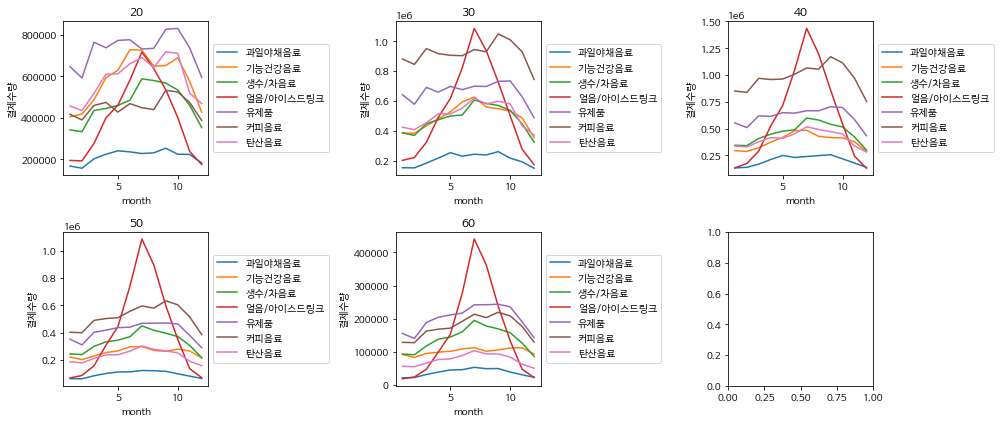

In [26]:
mid_age(data9)

- 음료의 결제수량은 20대에서 가장 높게 나타났다. 특히 20대에서는 유제품 결제수량이 높으며, 나머지 연령대에서는 커피음료가 대체로 결제수량 상위권에 자리하고 있음을 확인할 수 있다.

#### 가공식사제품

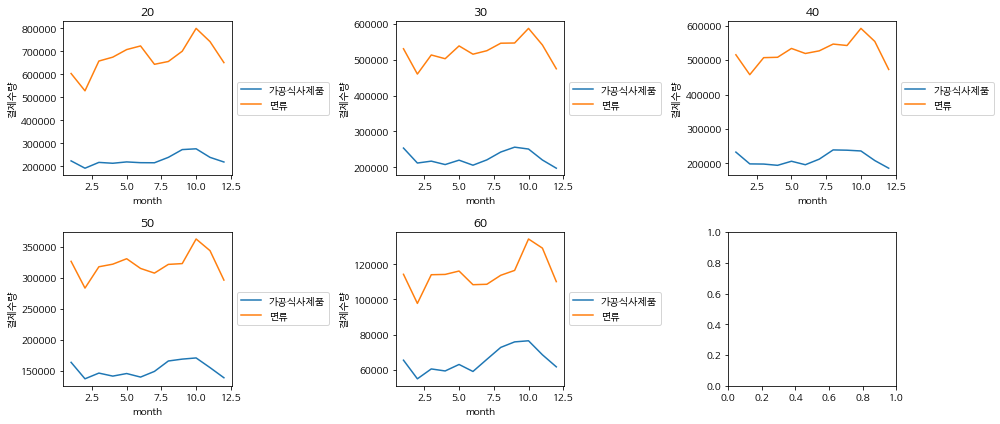

In [29]:
mid_age(data9_1)

#### 간편식사

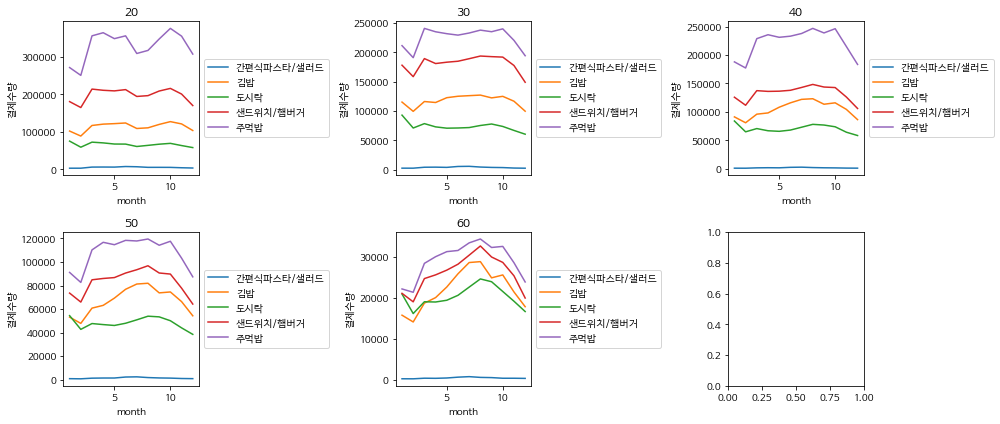

In [30]:
mid_age(data9_2)

- 각 연령대별로 품목의 결제수량 순위는 유사하게 나타난다. 60대 고객층에서는 다른 연령대에 비해 5가지 품목 간 결제수량의 차이가 적은 양상을 보이고 있다.

#### 주류

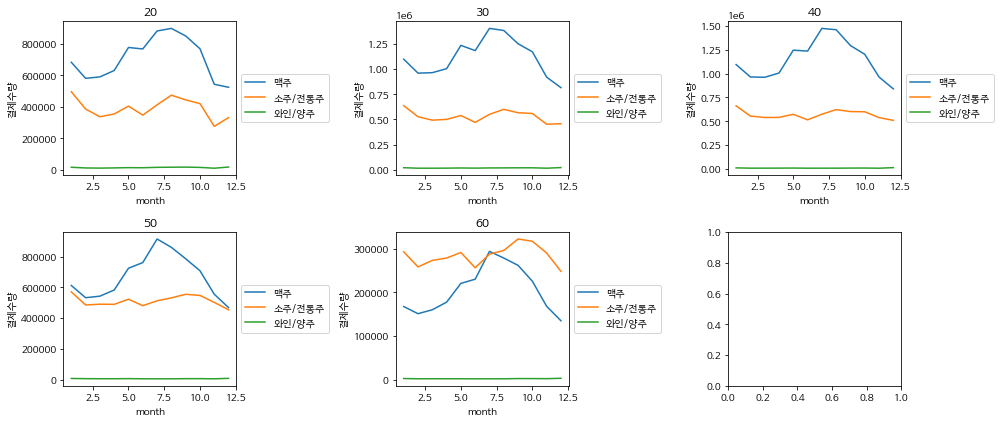

In [35]:
mid_age(data9_3)

- 20, 30, 40대에서는 맥주의 결제수량이 높았지만, 50, 60대에서는 소주/전통주가 맥주와 결제수량이 비슷하거나 능가하는 양상을 보이는 경우도 발견할 수 있다. 

### [음료 : 연령대와 주변입지에 따른 상품 결제수량 분석]

In [44]:
data10_1 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 20)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 30)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 40)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 50)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 60)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()

def age_func1(input_data) :
    fig,ax = plt.subplots(nrows=5, ncols=3, figsize = (20,16))
    lctn_name = input_data['주변입지'].unique()
    
    for i in range(13) :
        plt.subplot(5,3,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['주변입지'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 음료 중분류 | 연령대 및 주변입지

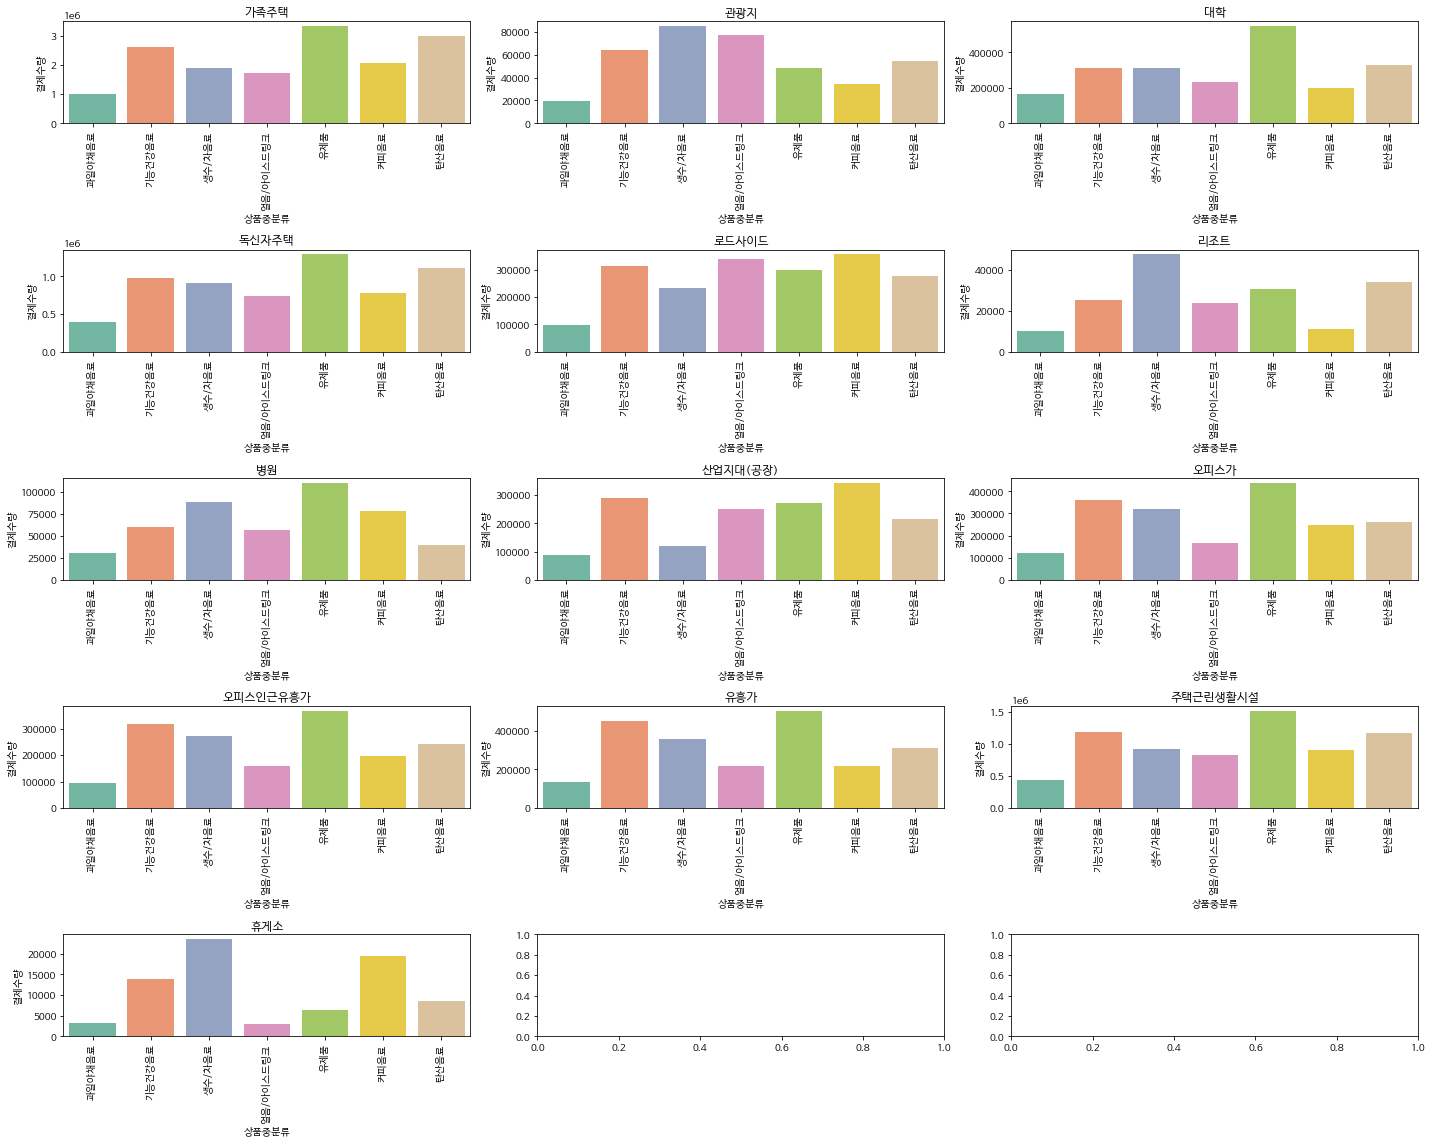

In [45]:
age_func1(data10_1)

- 대부분의 주변입지의 경우에서 유제품이 가장 높은 결제수량을 기록했으나, '관광지, 리조트, 휴게소'의 경우 생수/차음료가, '로드사이드'에서는 커피음료가 가장 높은 결제수량을 기록했다. 

#### 30대 음료 중분류 | 연령대 및 주변입지

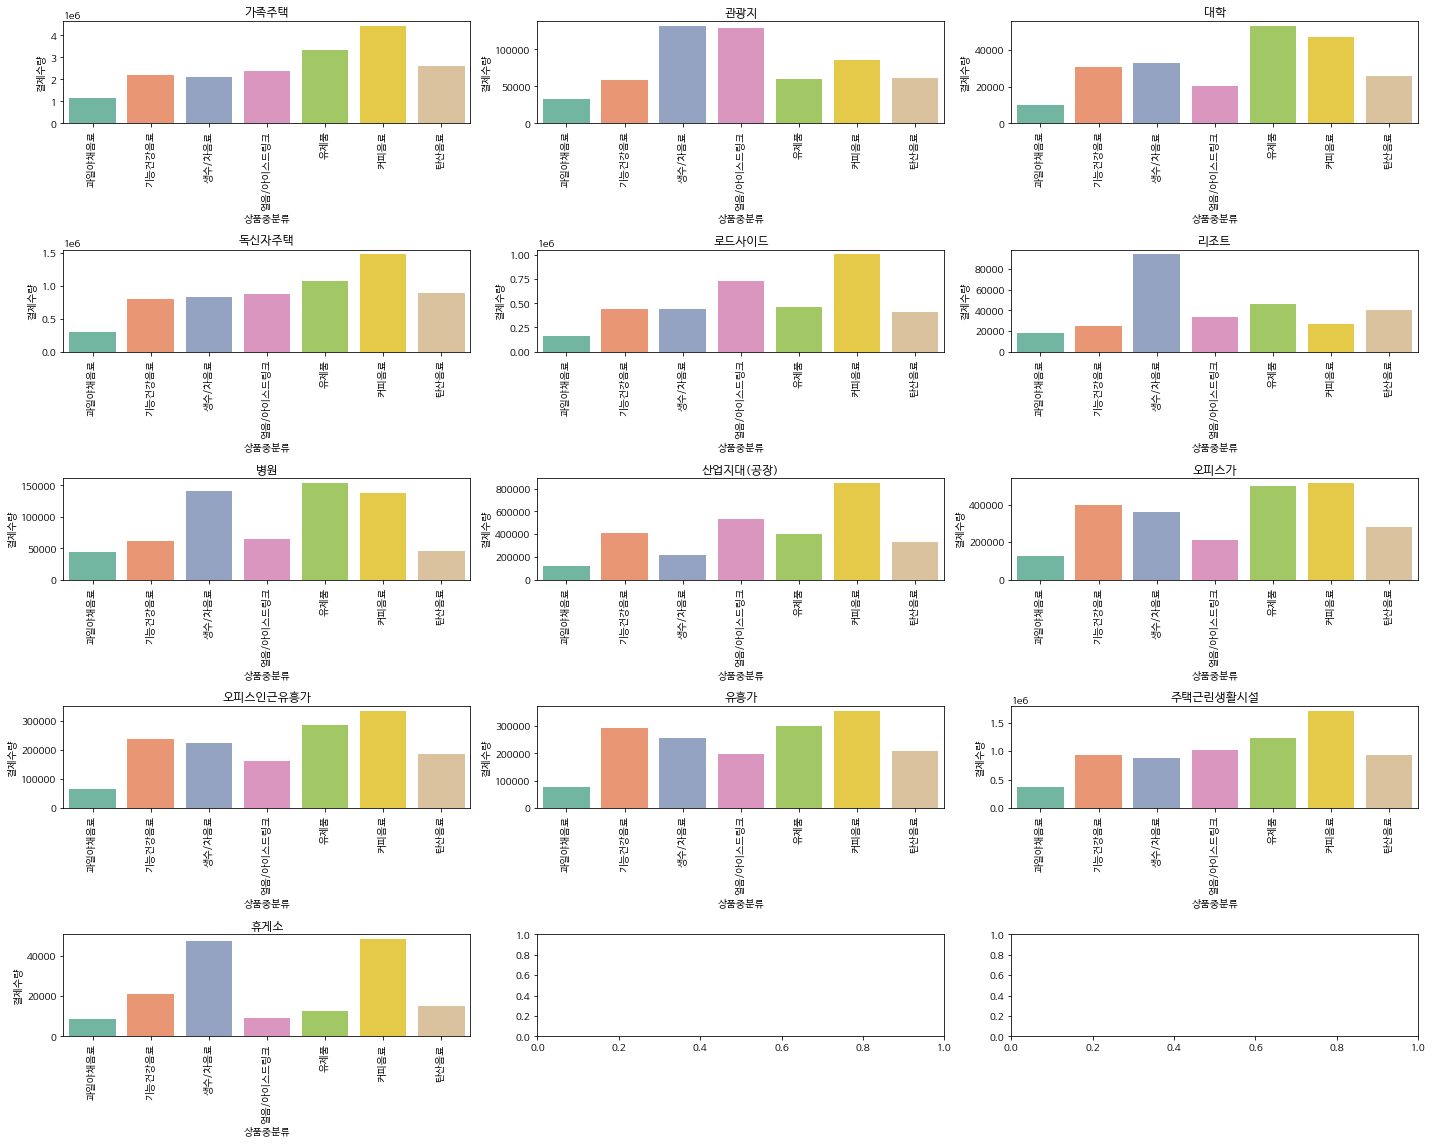

In [46]:
age_func1(data10_2)

- 대부분의 주변입지 경우에서 커피음료가 가장 높은 결제수량을 기록했으나, '병원, 대학'에서는 유제품이 높은 결제수량을 기록했다.

#### 40대 음료 중분류 | 연령대 및 주변입지

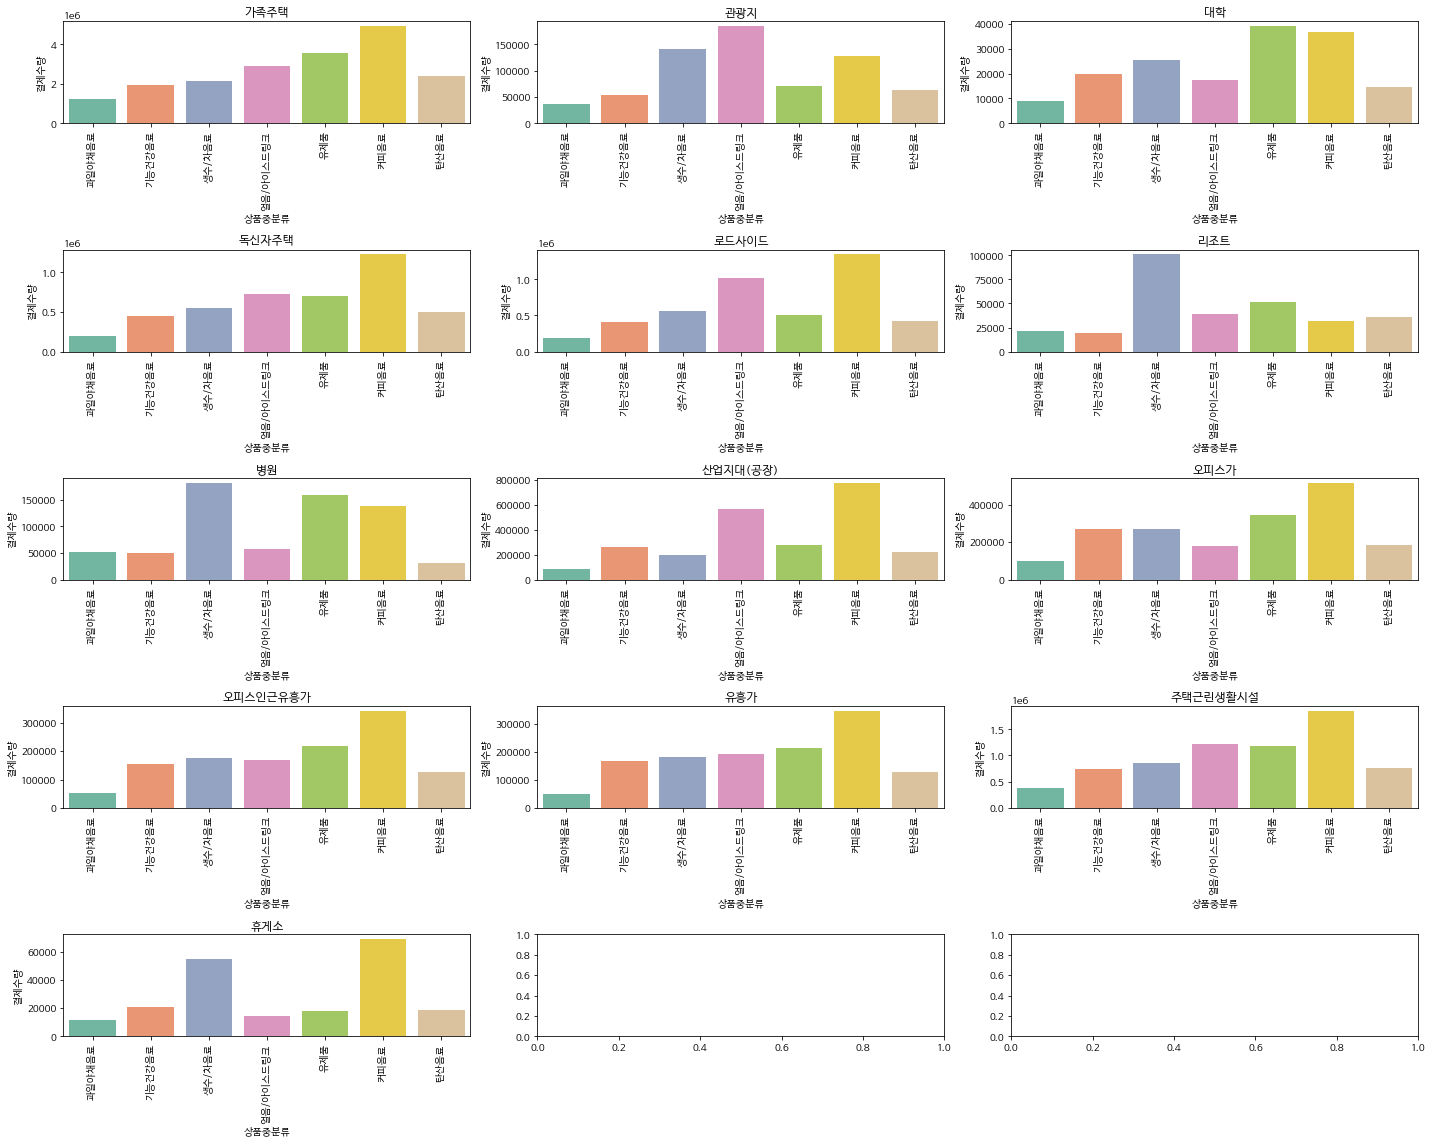

In [47]:
age_func1(data10_3)

- 30대와 전반적으로 비슷한 양상을 보인다. 

#### 50대 음료 중분류 | 연령대 및 주변입지

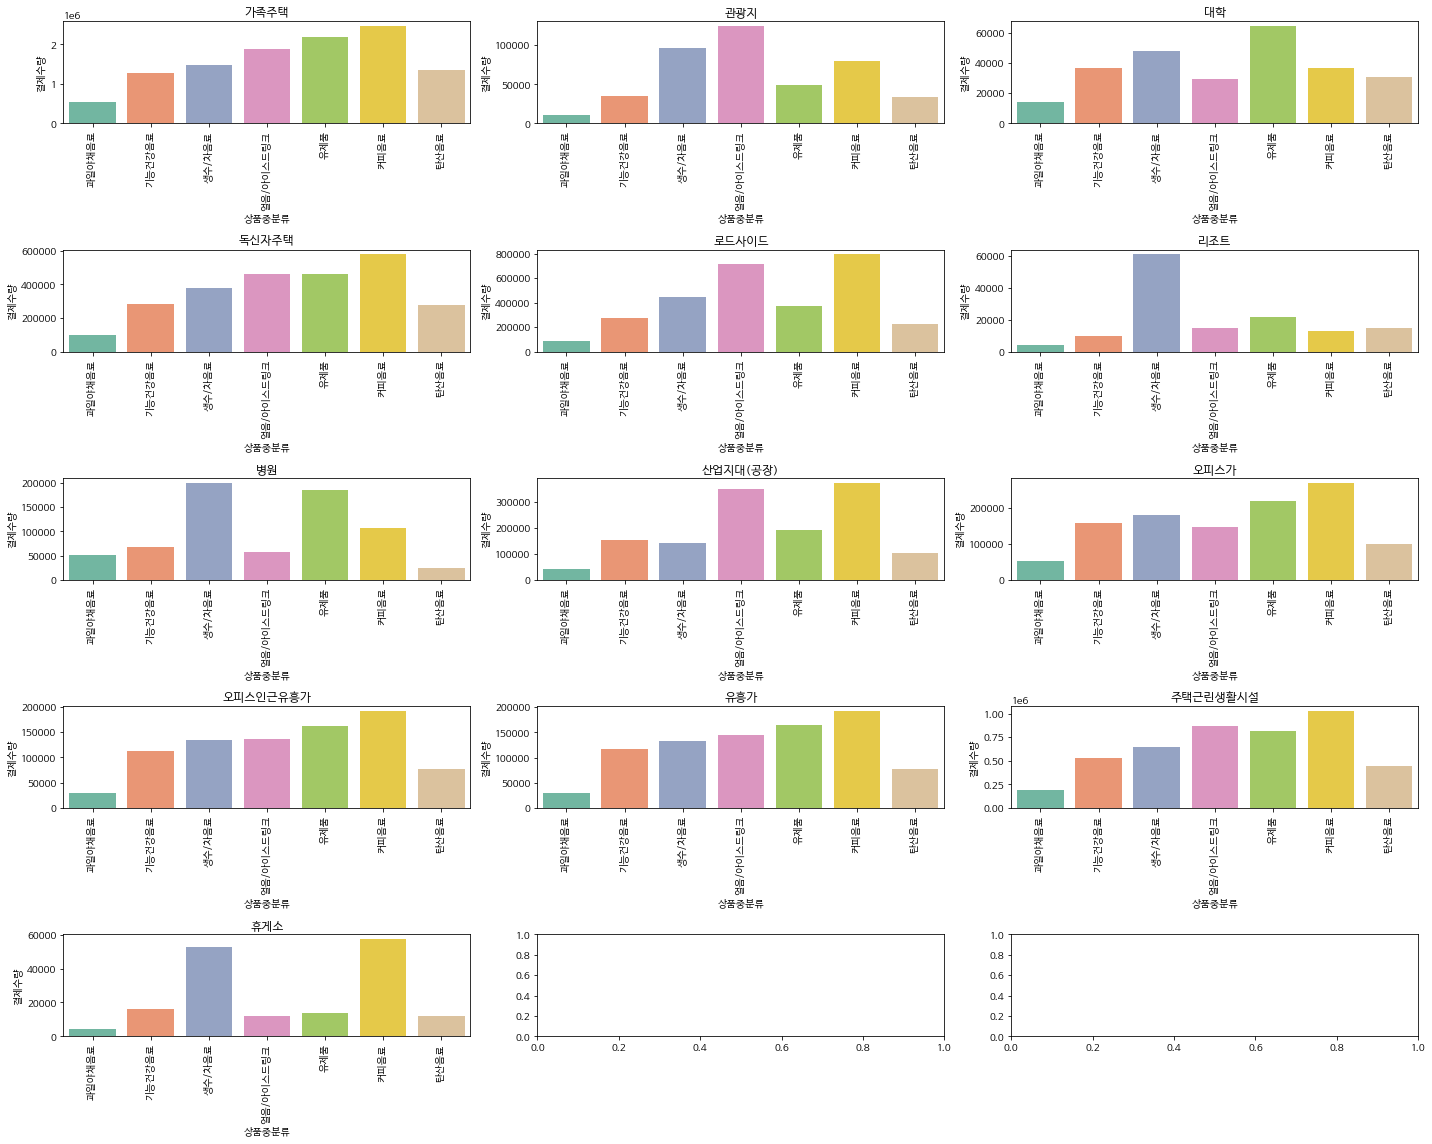

In [48]:
age_func1(data10_4)

- 젊은 연령층에 비해 전체 결제수량은 다소 떨어지지만, 3,40대와 전반적으로 음료종류별 결제수량 순위 양상이 유사하다.

#### 60대 음료 중분류 | 연령대 및 주변입지

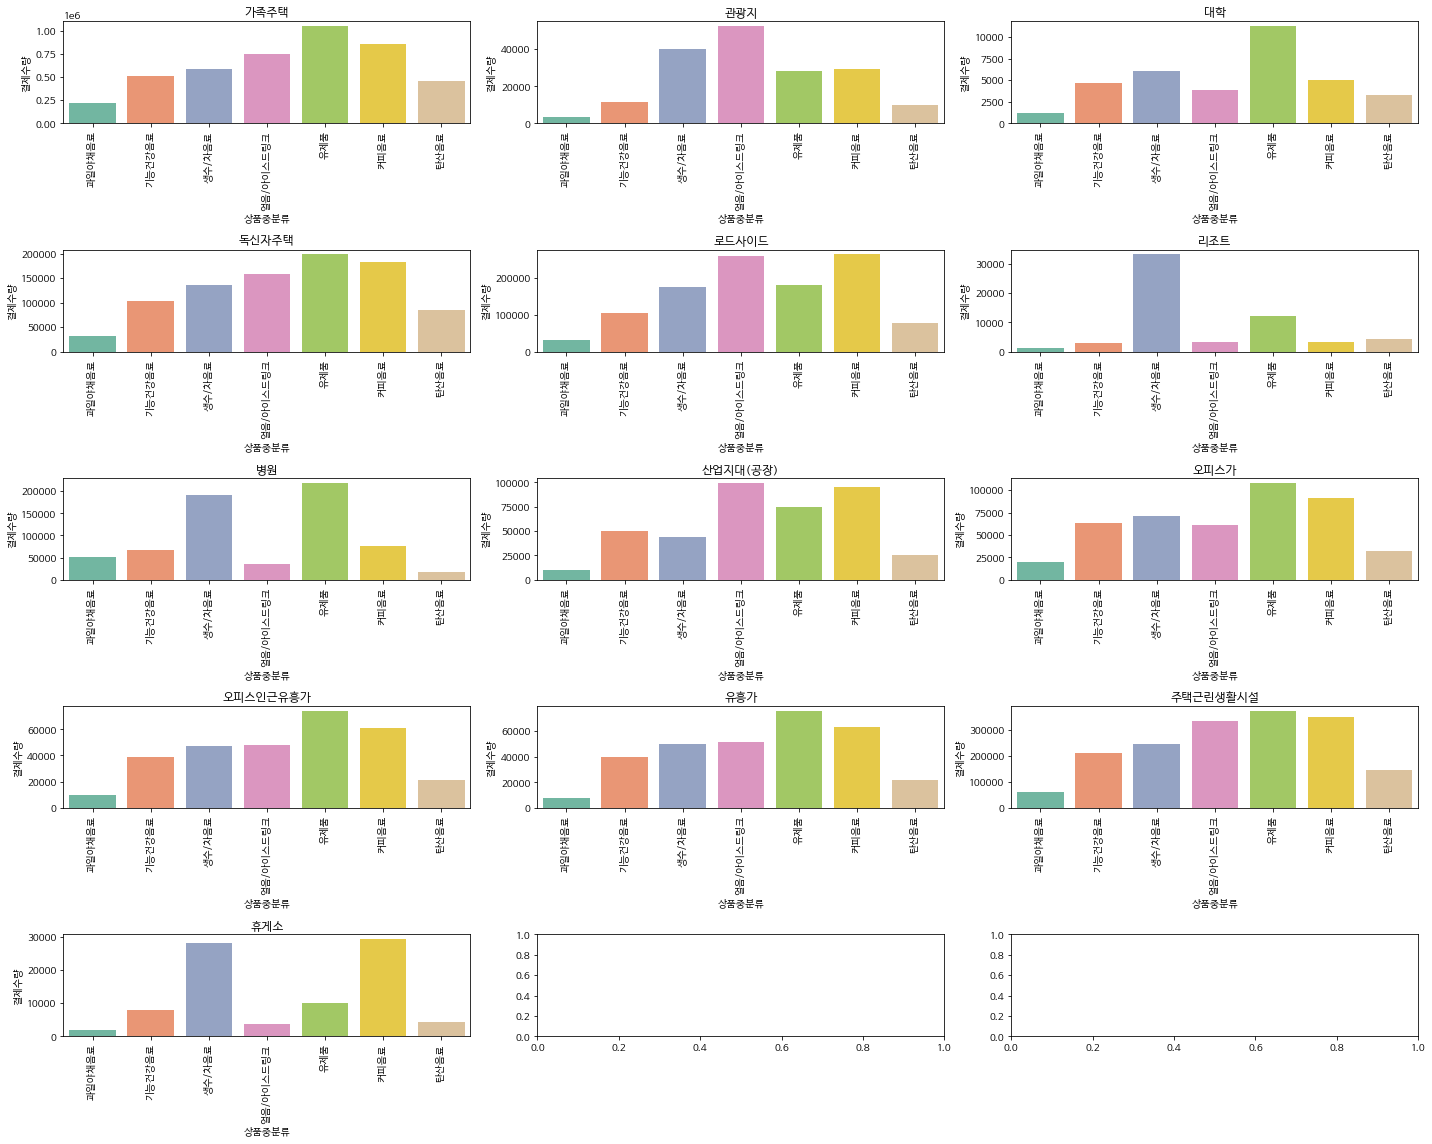

In [49]:
age_func1(data10_5)

- 전반적으로 유제품의 결제수량이 가장 높으나, '로드사이드, 휴게소'에서 커피음료의 결제수량 비중이 높으며, 다른 연령대에 비해 '로드사이드, 산업지대'에서 얼음/아이스드링크이 높은 결제수량을 기록했다.

### [간편식사 : 연령대와 주변입지에 따른 상품 결제수량 분석]

In [50]:
data10_1 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 20)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 30)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 40)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 50)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 60)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()

def age_func1(input_data) :
    fig,ax = plt.subplots(nrows=5, ncols=3, figsize = (20,16))
    lctn_name = input_data['주변입지'].unique()
    
    for i in range(13) :
        plt.subplot(5,3,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['주변입지'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 간편식사 중분류 | 연령대 및 주변입지

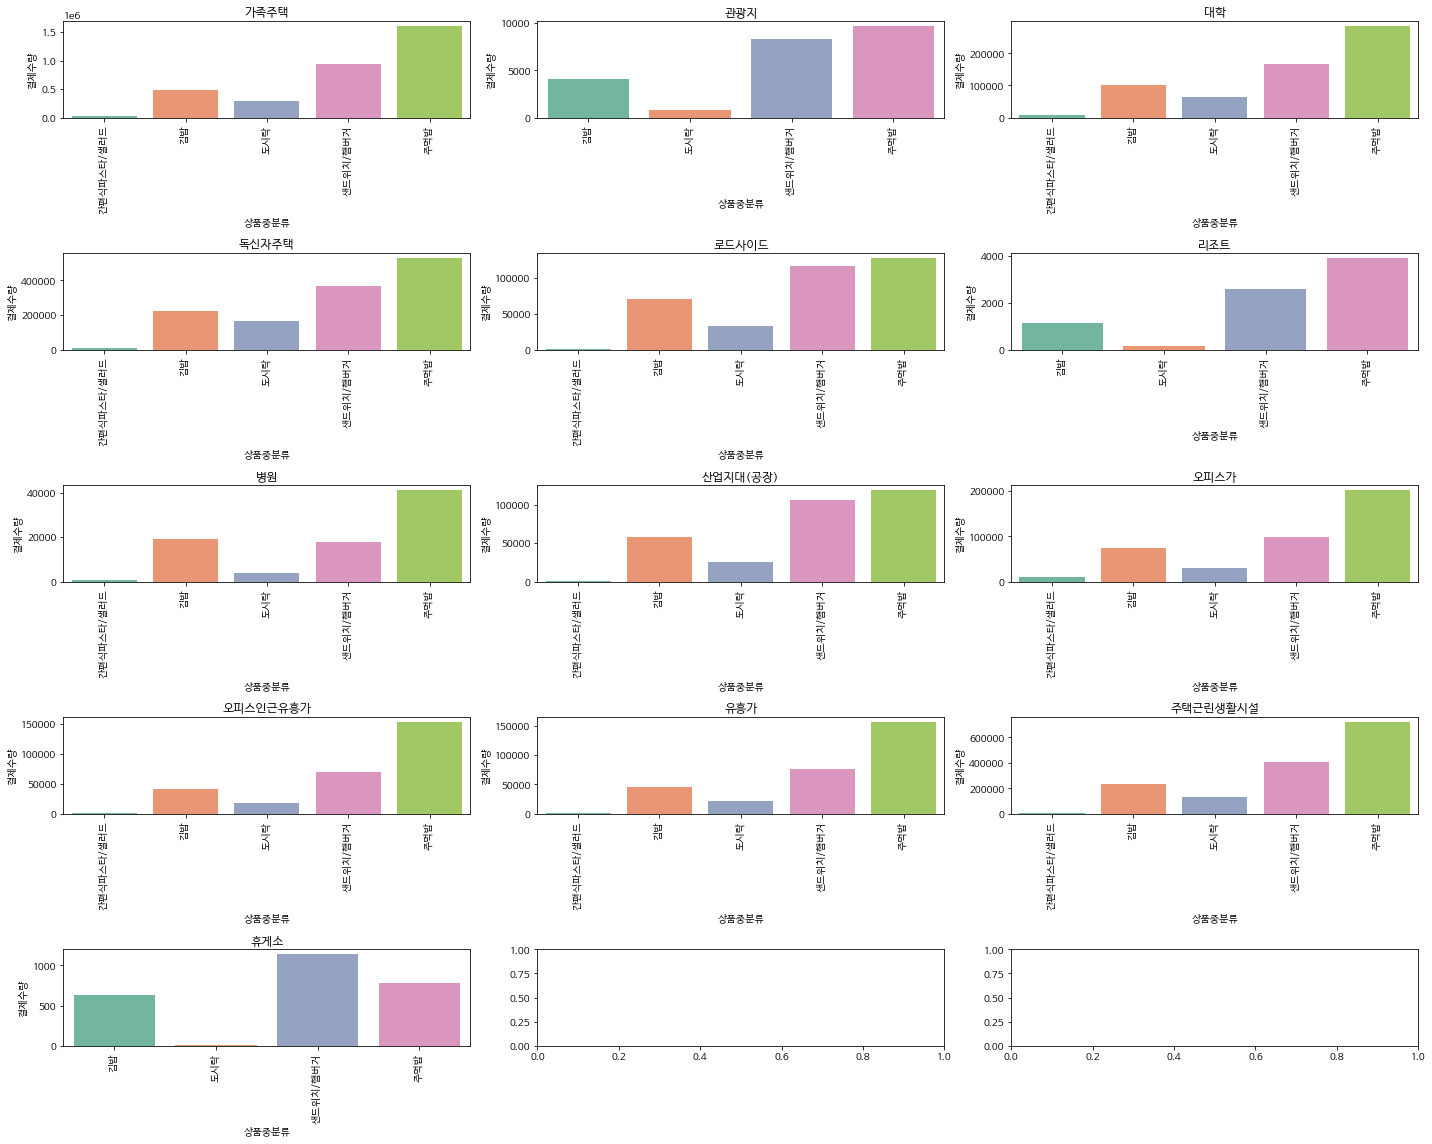

In [51]:
age_func1(data10_1)

- 대부분 주먹밥의 결제수량이 가장 높으며 그 뒤를 샌드위치/햄버거, 김밥이 잇는다. 휴게소에서는 샌드위치/햄버거의 결제수량이 가장 높다. 

#### 30대 간편식사 중분류 | 연령대 및 주변입지

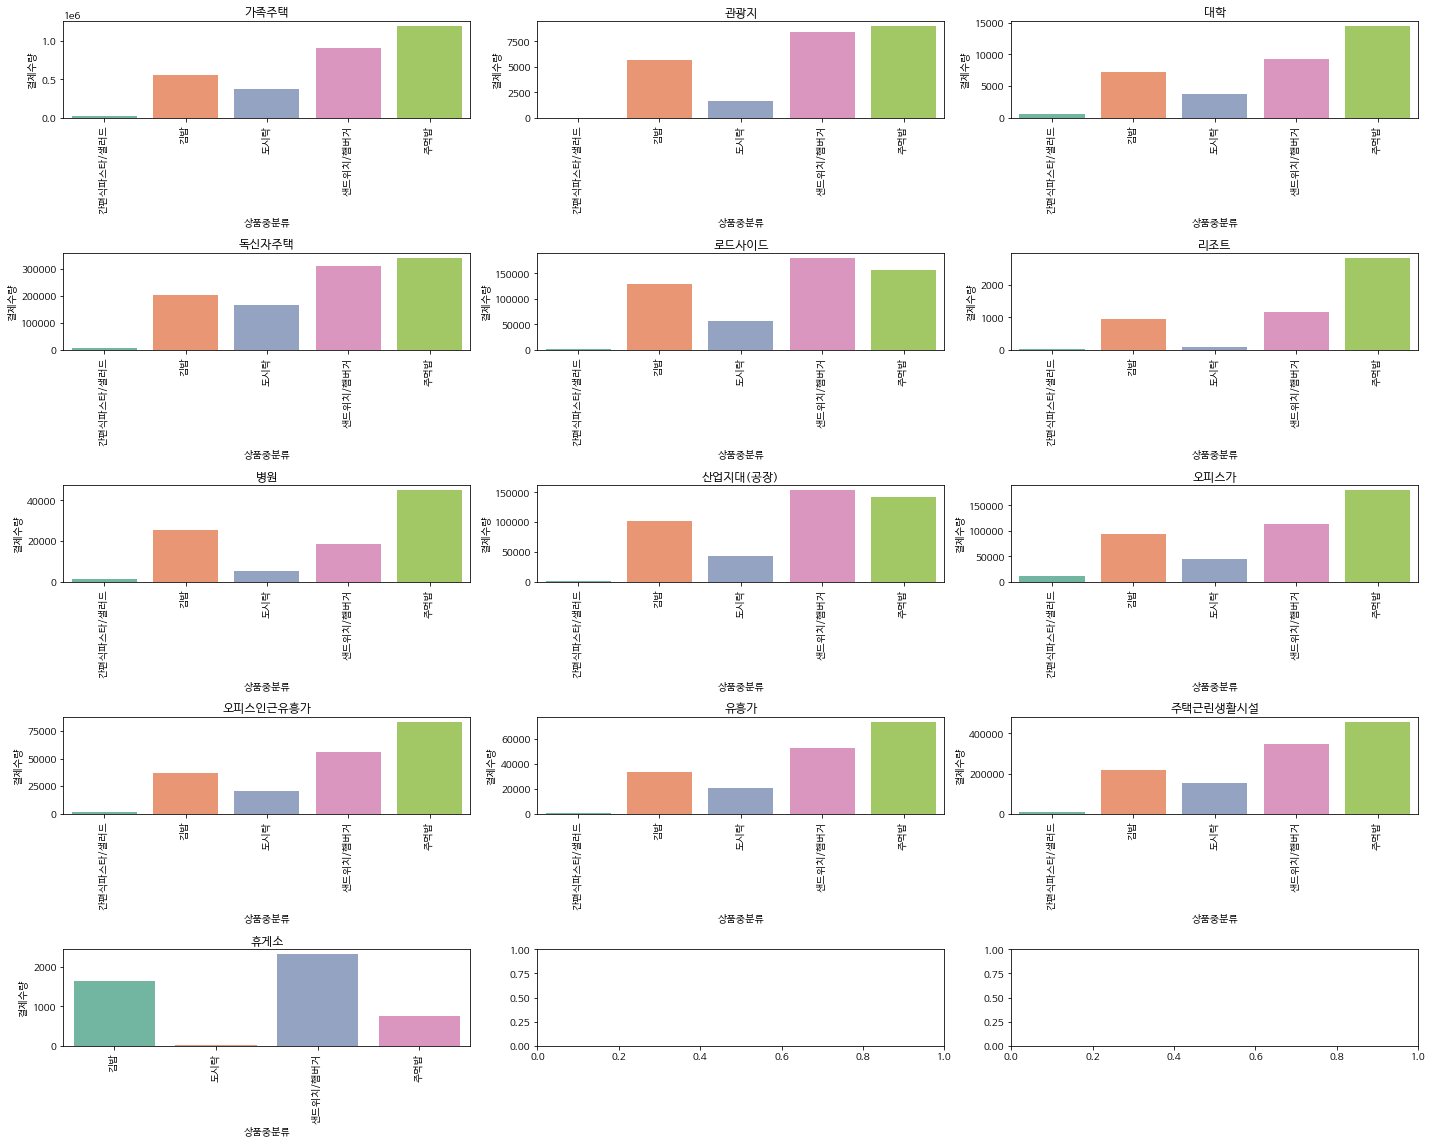

In [52]:
age_func1(data10_2)

#### 40대 간편식사 중분류 | 연령대 및 주변입지

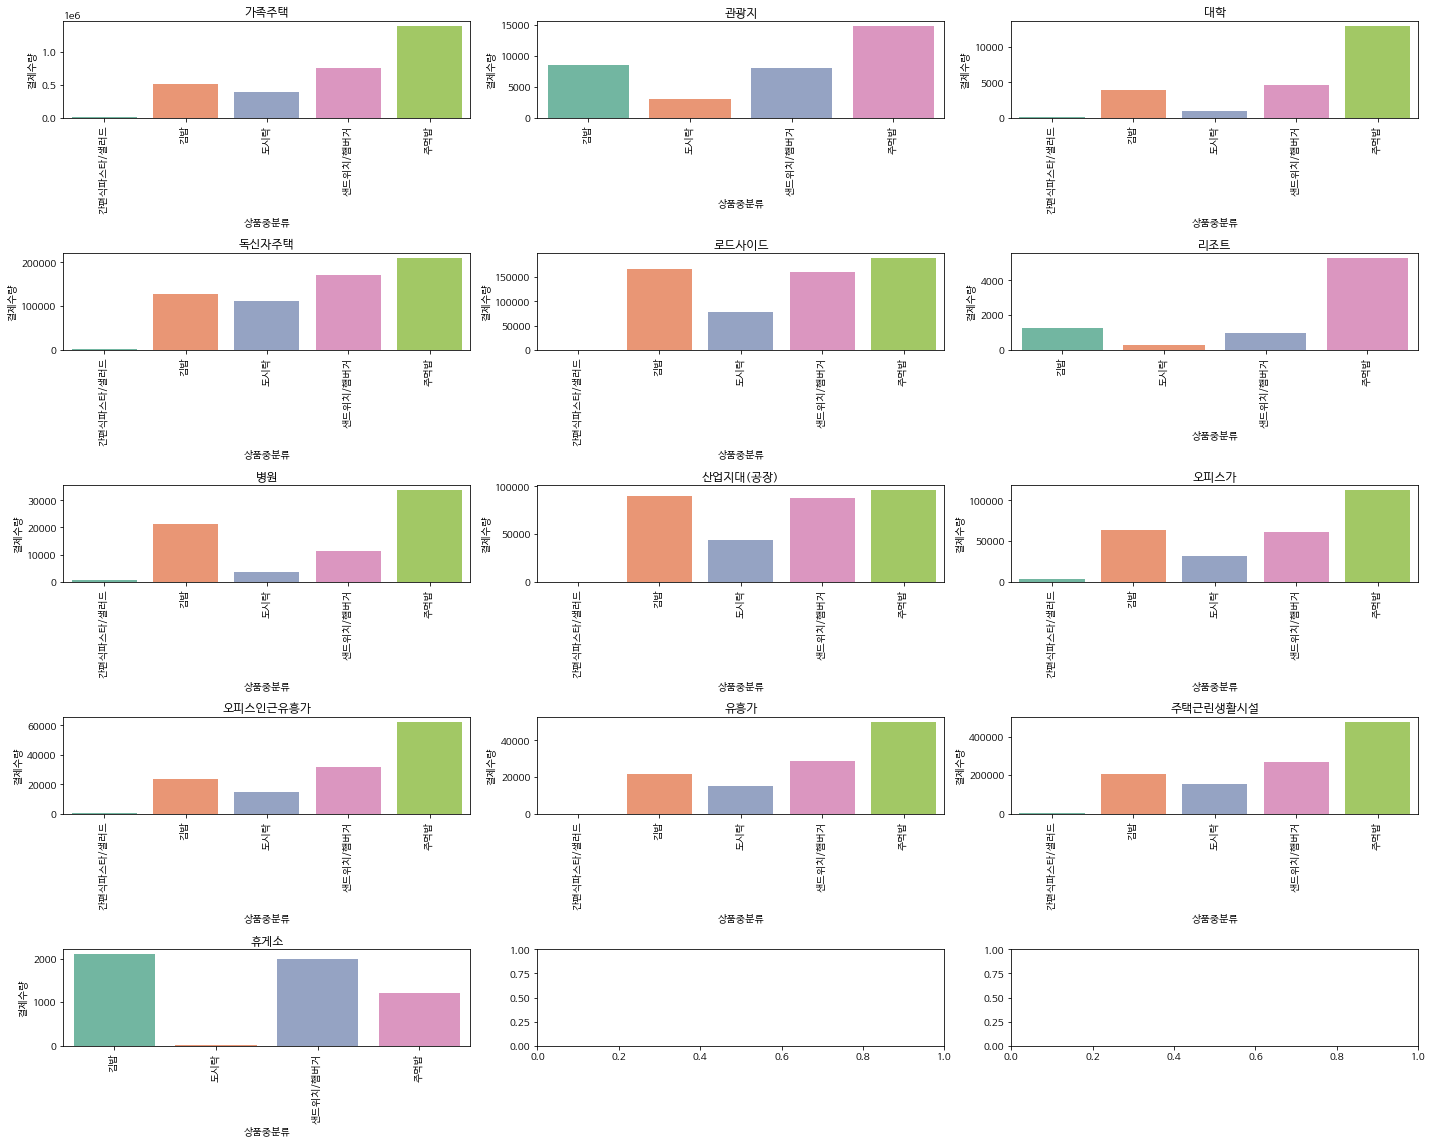

In [53]:
age_func1(data10_3)

#### 50대 간편식사 중분류 | 연령대 및 주변입지

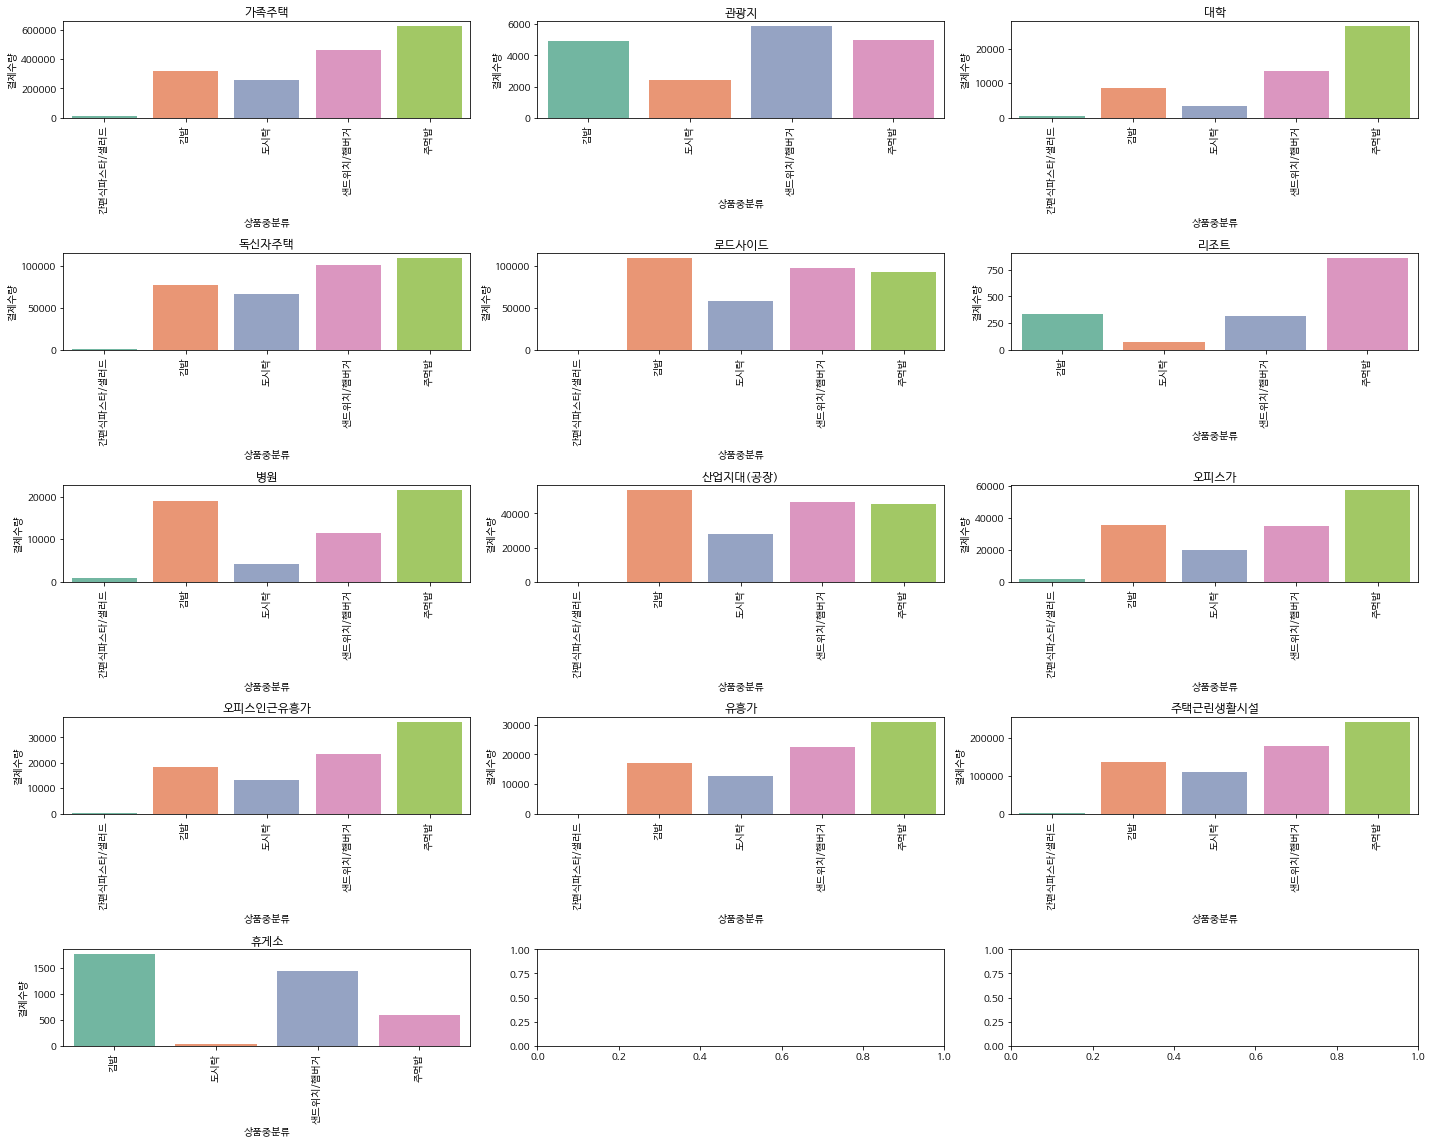

In [54]:
age_func1(data10_4)

- '로드사이드, 병원, 산업지대, 휴게소'에서 김밥의 결제수량이 가장 높다. 

#### 60대 간편식사 중분류 | 연령대 및 주변입지

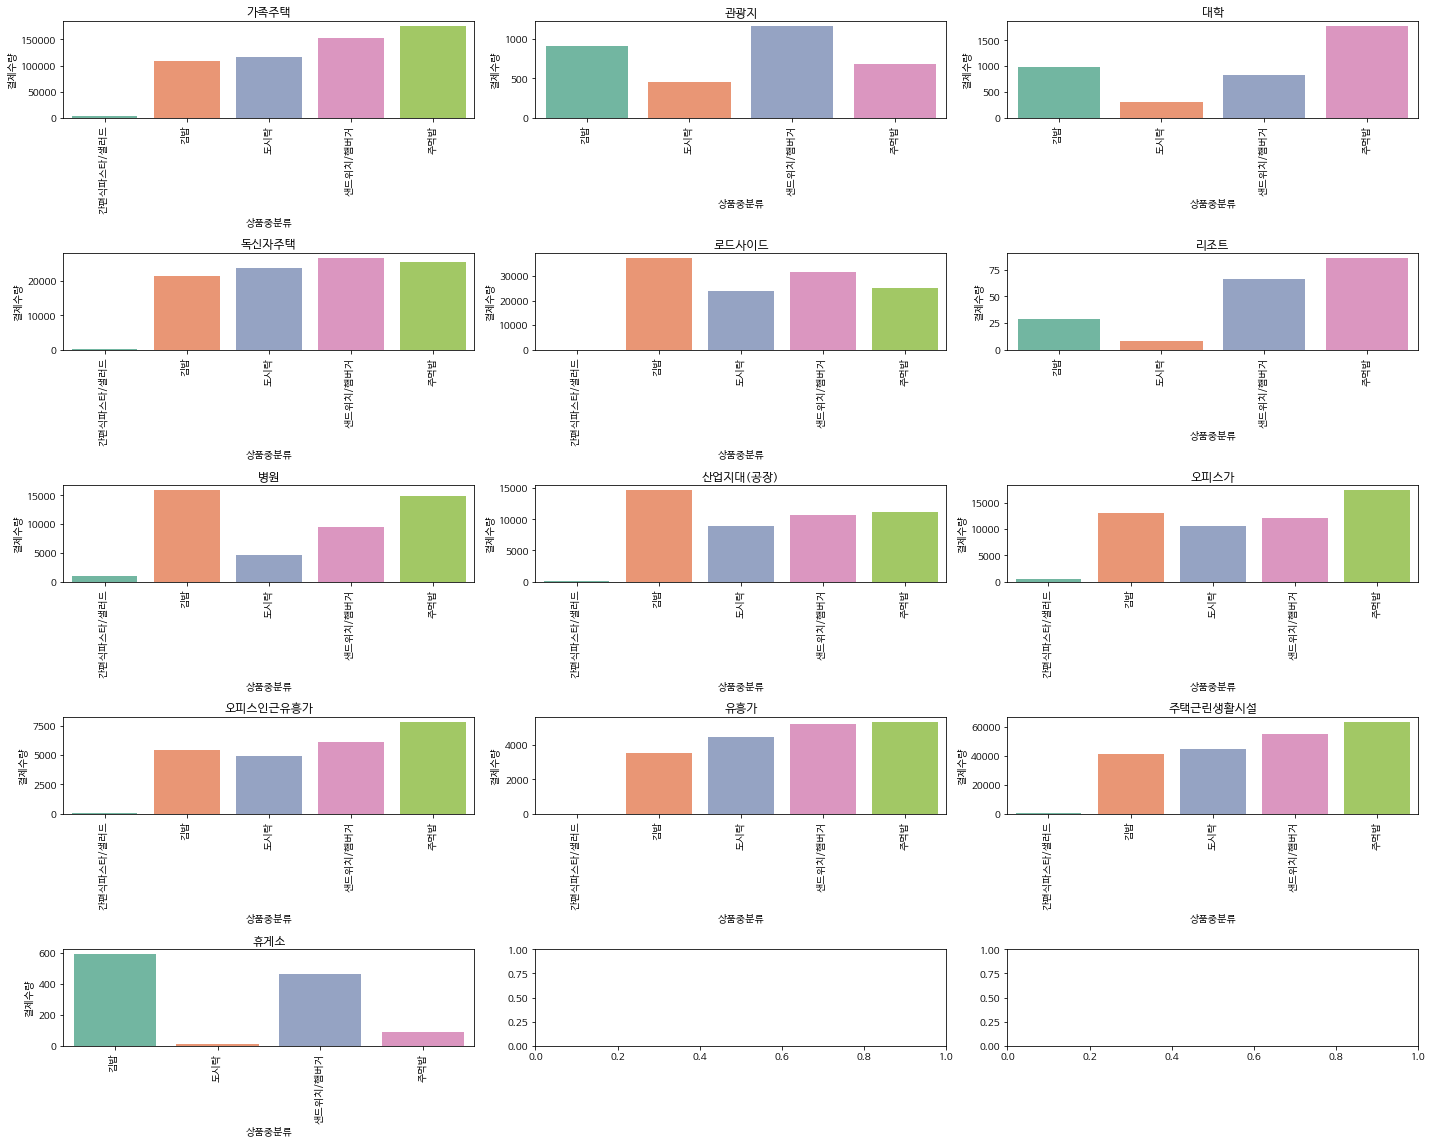

In [55]:
age_func1(data10_5)

- 50대와 주변입지-품목별 결제수량 양상이 비슷하다.

### [과자류 : 연령대와 주변입지에 따른 상품 결제수량 분석]

In [27]:
data10_1 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 20)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 30)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 40)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 50)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 60)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()

def age_func1(input_data) :
    fig,ax = plt.subplots(nrows=5, ncols=3, figsize = (20,16))
    lctn_name = input_data['주변입지'].unique()
    
    for i in range(13) :
        plt.subplot(5,3,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['주변입지'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 과자류 중분류 | 연령대 및 주변입지

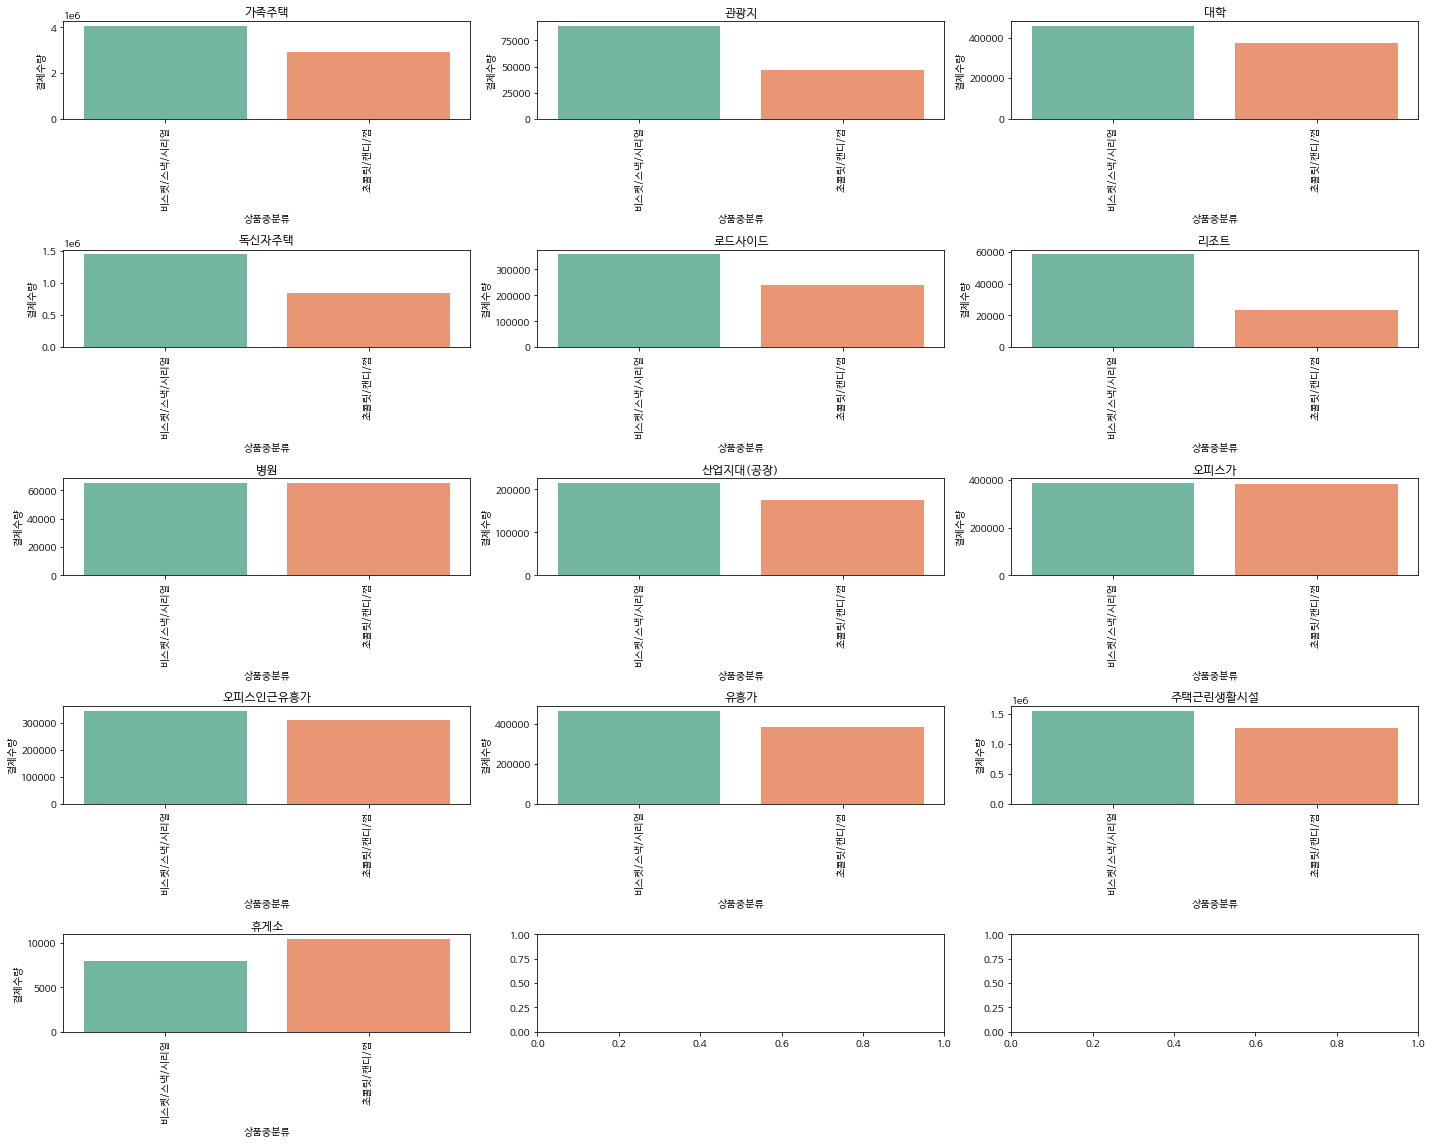

In [57]:
age_func1(data10_1)

- 대부분 비스켓/스낵/시리얼의 결제수량이 앞서지만, '병원, 오피스가'에서는 두 중분류가 대등한 수준을 보이고, 휴게소에서는 초콜릿/캔디/껌이 앞선다.

#### 30대 과자류 중분류 | 연령대 및 주변입지

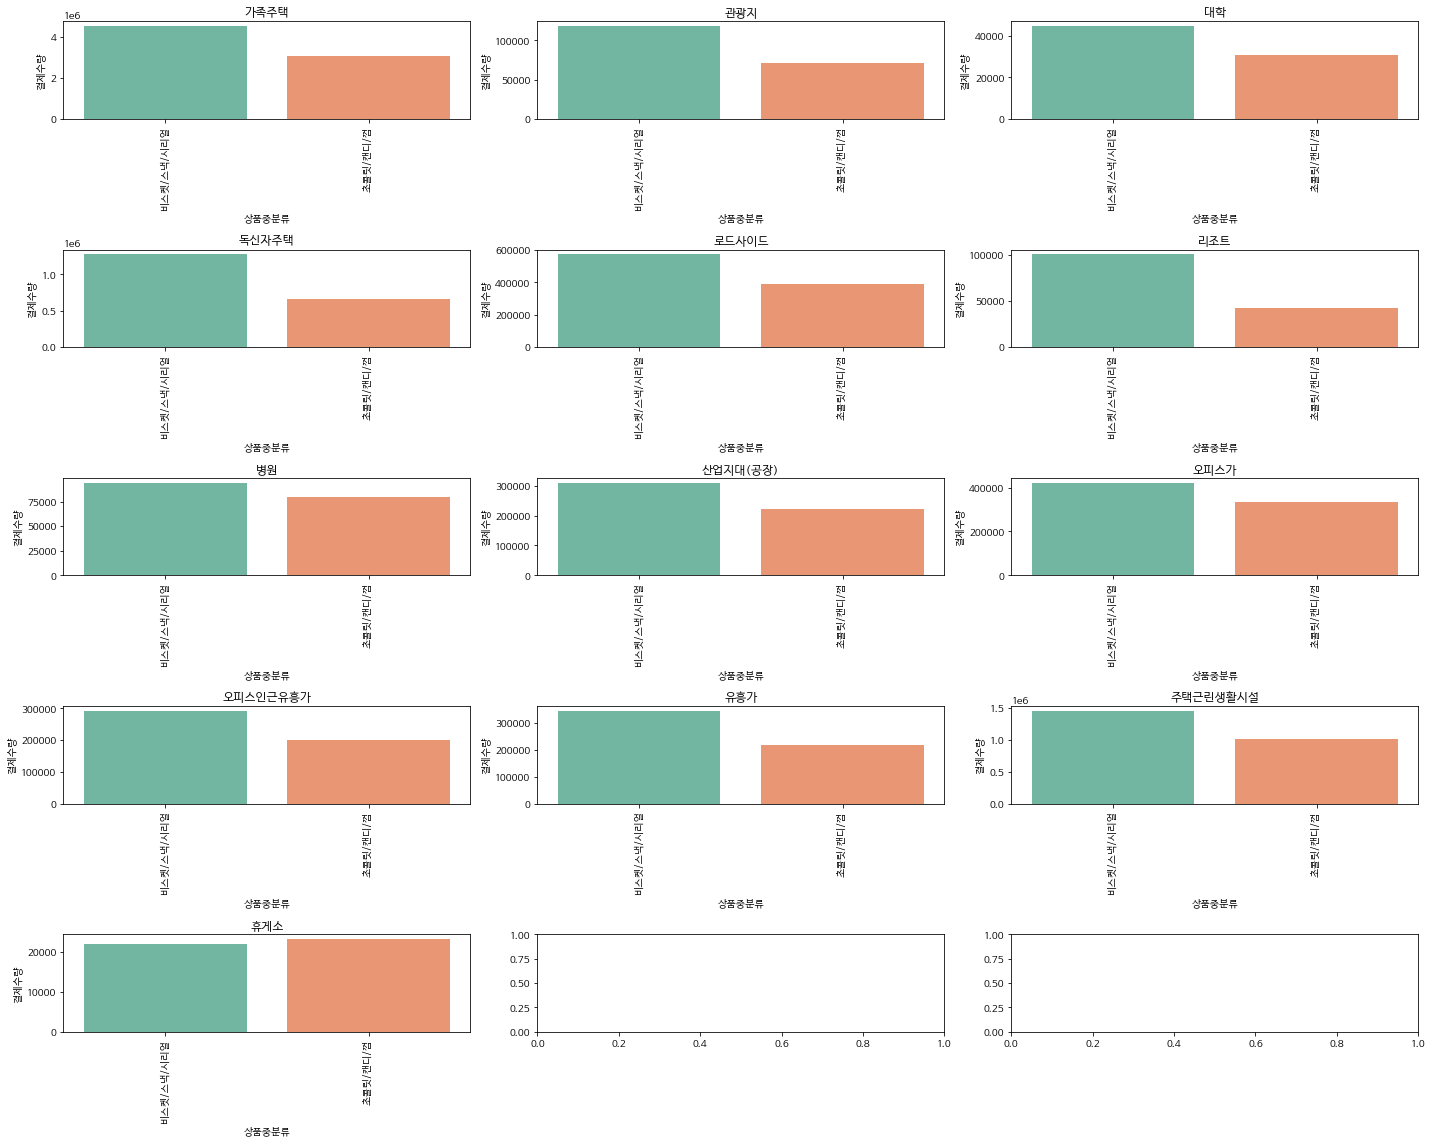

In [58]:
age_func1(data10_2)

- 대부분의 주변입지 경우에서 비스켓/스낵/시리얼이 앞서며, 휴게소에서는 두 분류의 각 결제수량이 근소한 차이를 보인다.

#### 40대 과자류 중분류 | 연령대 및 주변입지

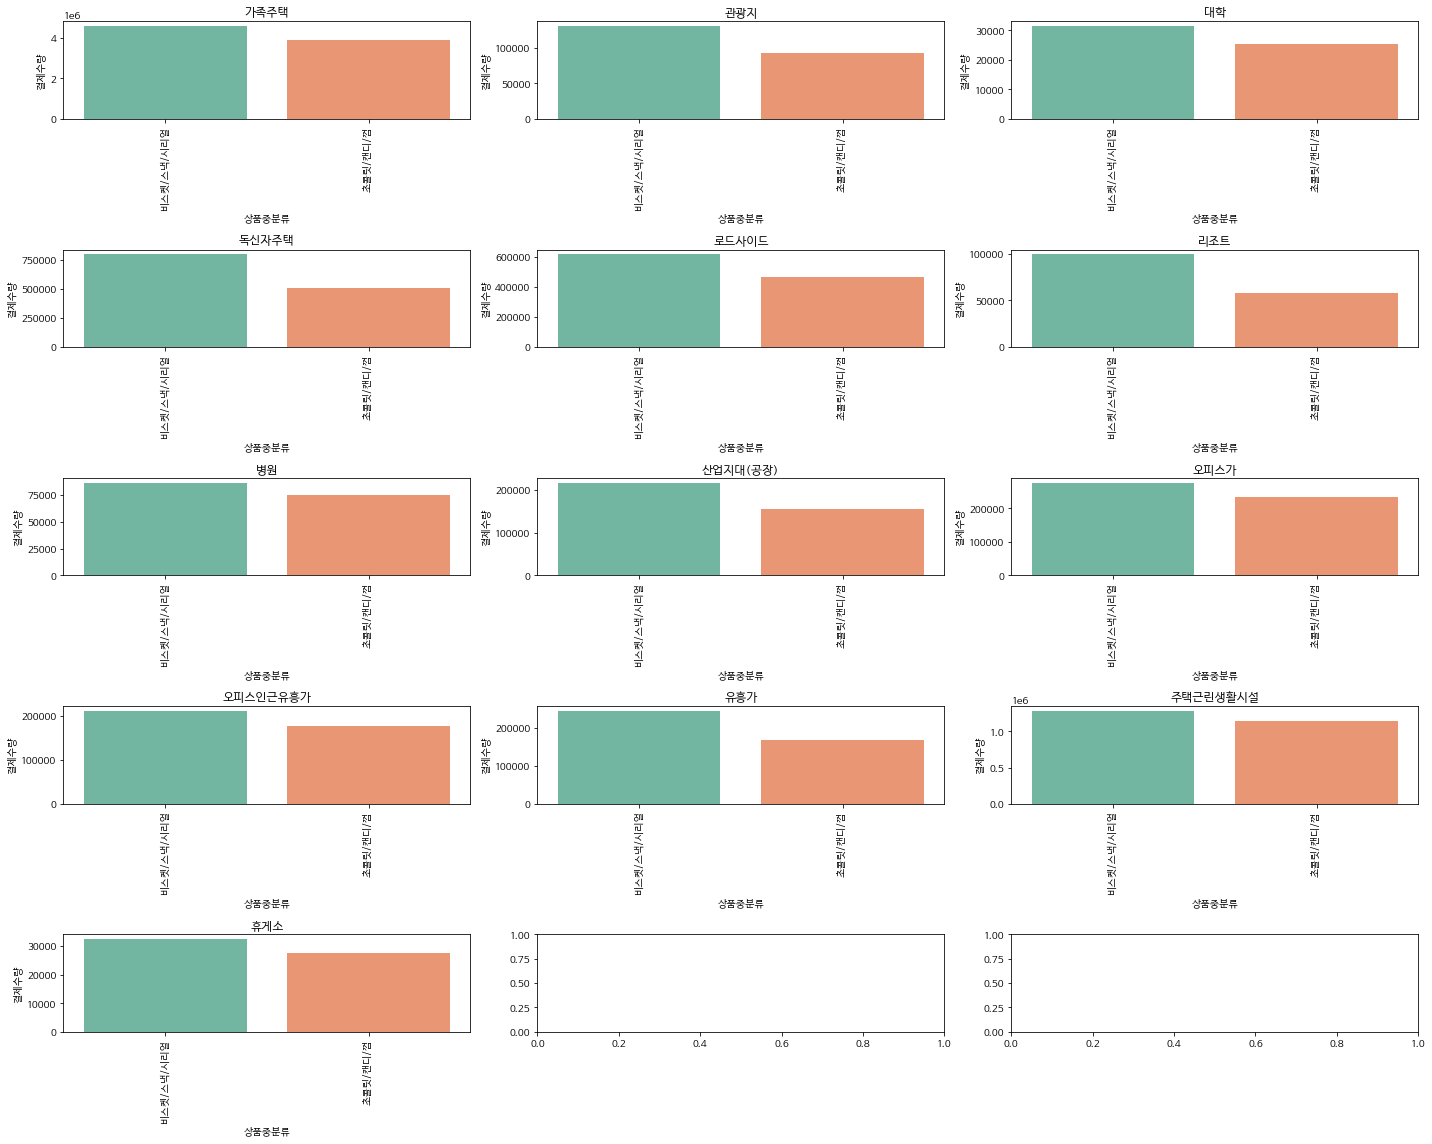

In [28]:
age_func1(data10_3)

- 모든 경우에서 비스켓/스낵/시리얼이 앞선다. (이하 5,60대도 공통적임.)

#### 50대 과자류 중분류 | 연령대 및 주변입지

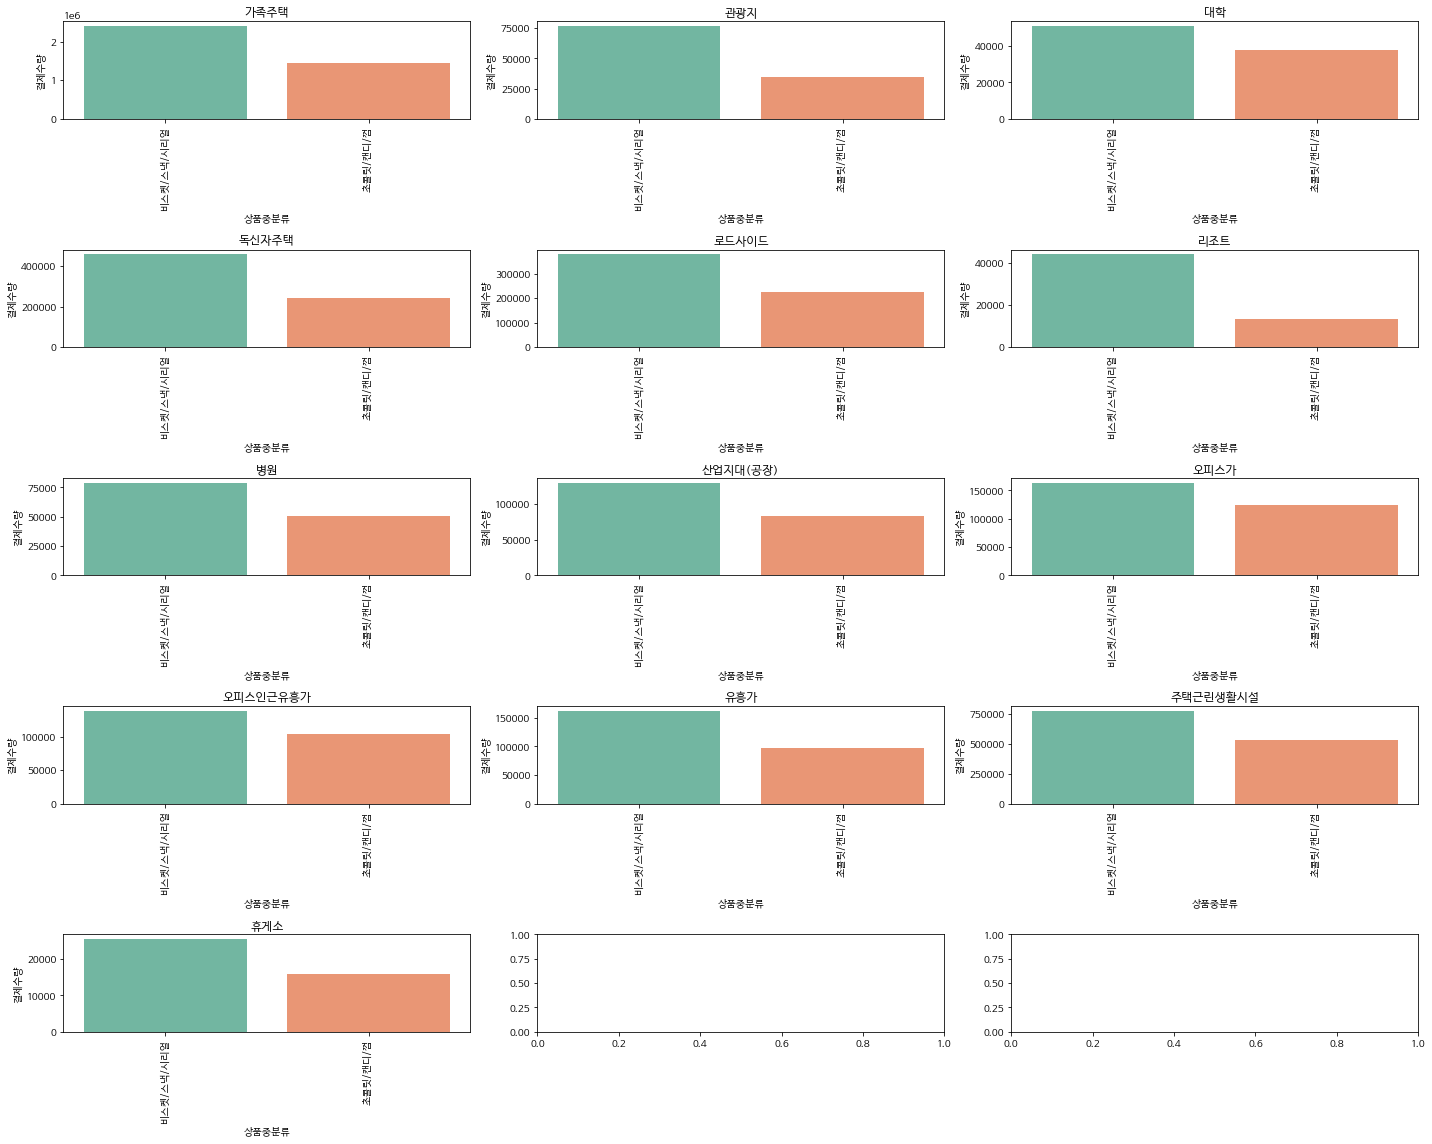

In [60]:
age_func1(data10_4)

- 다른 연령대에서 휴게소의 경우, 상품중분류 간 결제수량 차이가 적었는데, 50대에서는 비교적 차이가 크다.

#### 60대 과자류 중분류 | 연령대 및 주변입지

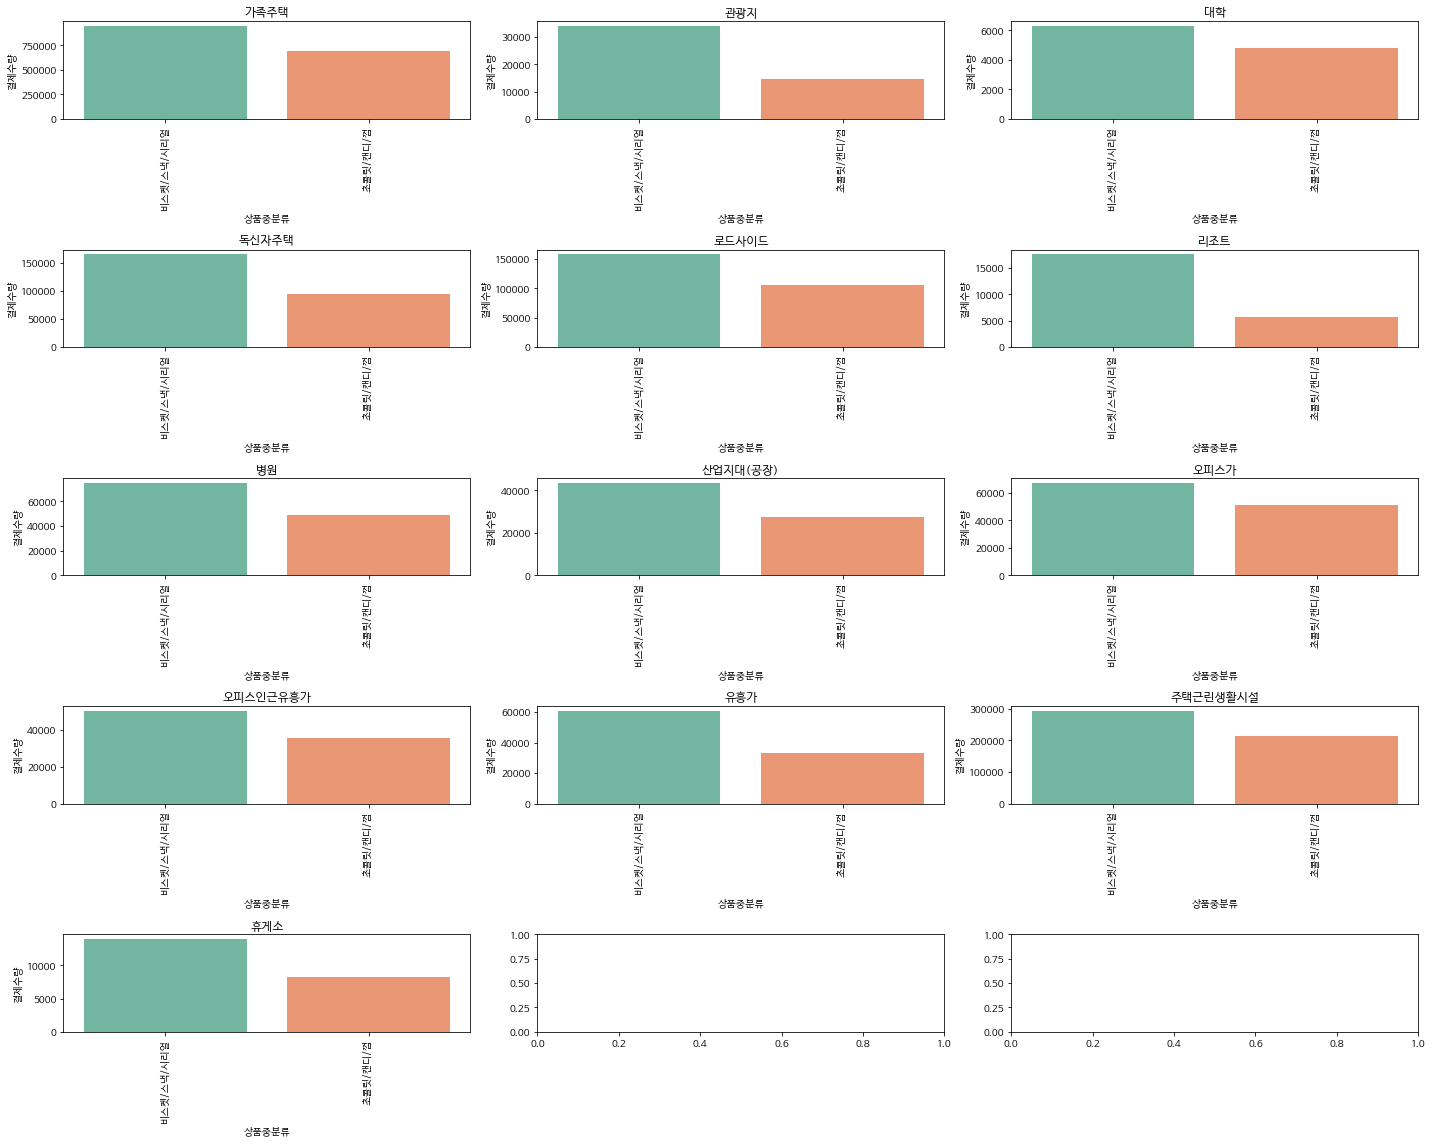

In [61]:
age_func1(data10_5)

- '관광지, 리조트'에서 두 상품중분류 간의 차이가 매우 크다.

### [주류 : 연령대와 주변입지에 따른 상품 결제수량 분석]

In [62]:
data10_1 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 20)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 30)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 40)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 50)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 60)].groupby(['AGE','주변입지','상품중분류'])['결제수량'].sum().reset_index()

def age_func1(input_data) :
    fig,ax = plt.subplots(nrows=5, ncols=3, figsize = (20,16))
    lctn_name = input_data['주변입지'].unique()
    
    for i in range(13) :
        plt.subplot(5,3,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['주변입지'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

- 전반적으로 모든 연령대에서 맥주의 결제수량이 압도적으로 많으며, 20,30대의 경우, 주변입지가 병원일 때 그 차이가 커지는 것을 확인할 수 있었다. 반면, 50대부터 맥주와 소주/전통주의 결제수량의 차이가 대폭 줄어들더니, 60대에서는 소주/전통주의 결제수량이 더 많거나 비슷한 것을 확인할 수 있었다. 

#### 20대 주류 중분류 | 연령대 및 주변입지

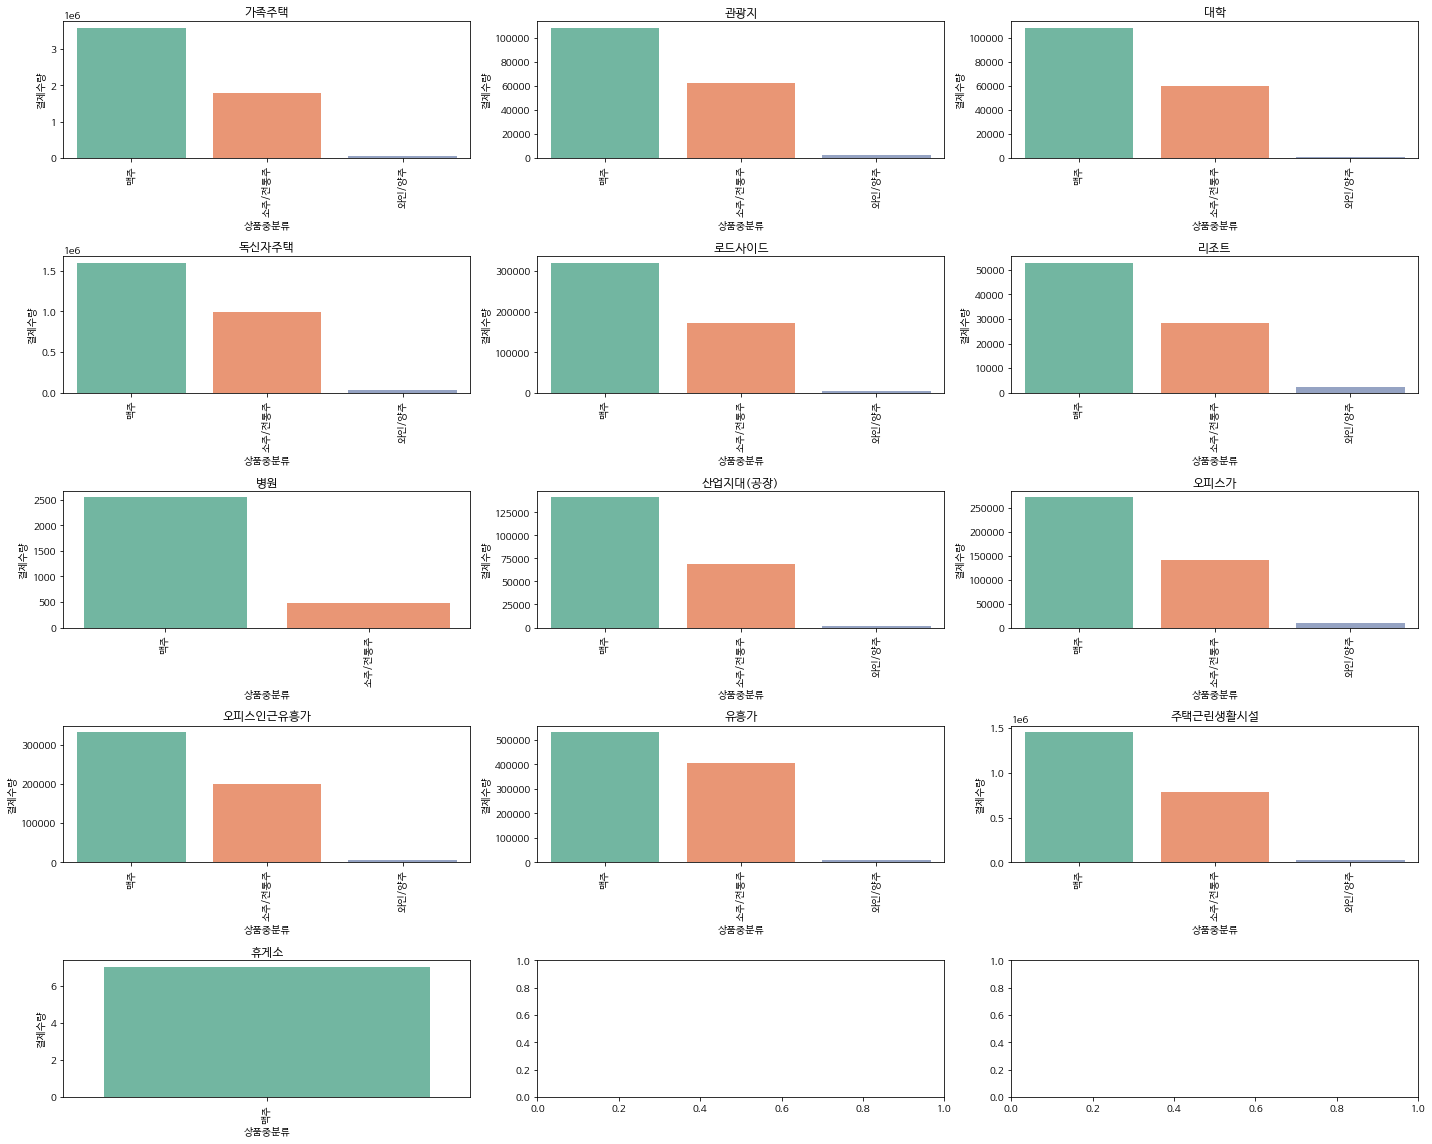

In [63]:
age_func1(data10_1)

#### 30대 주류 중분류 | 연령대 및 주변입지

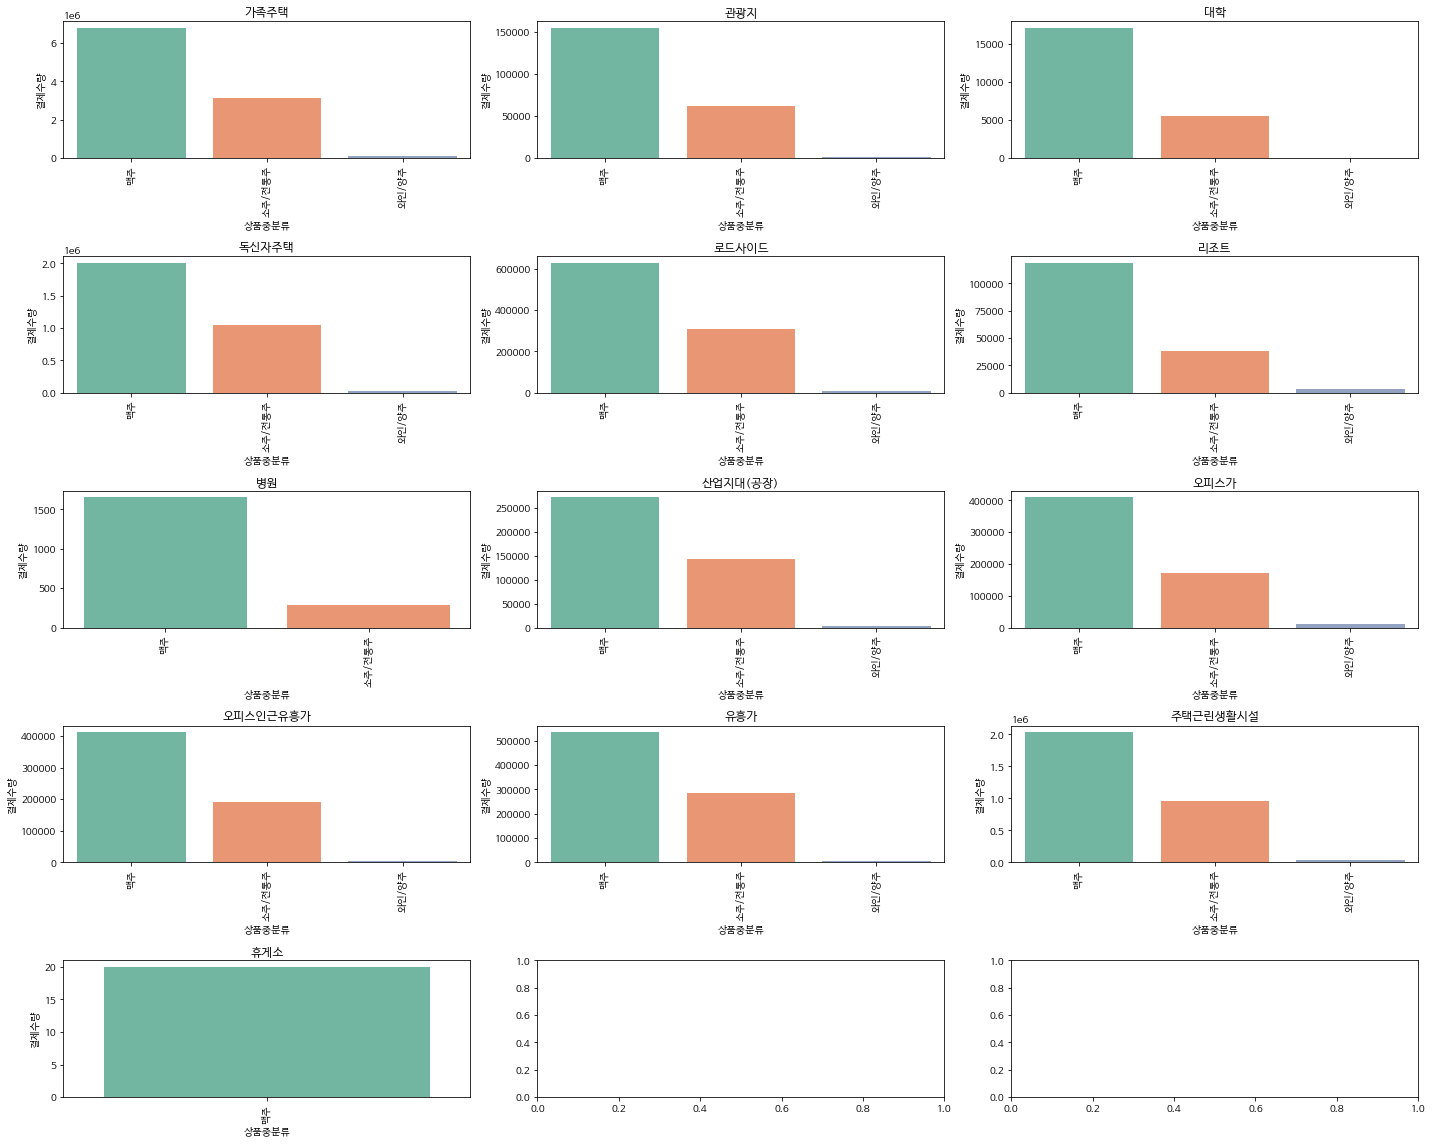

In [64]:
age_func1(data10_2)

#### 40대 주류 중분류 | 연령대 및 주변입지

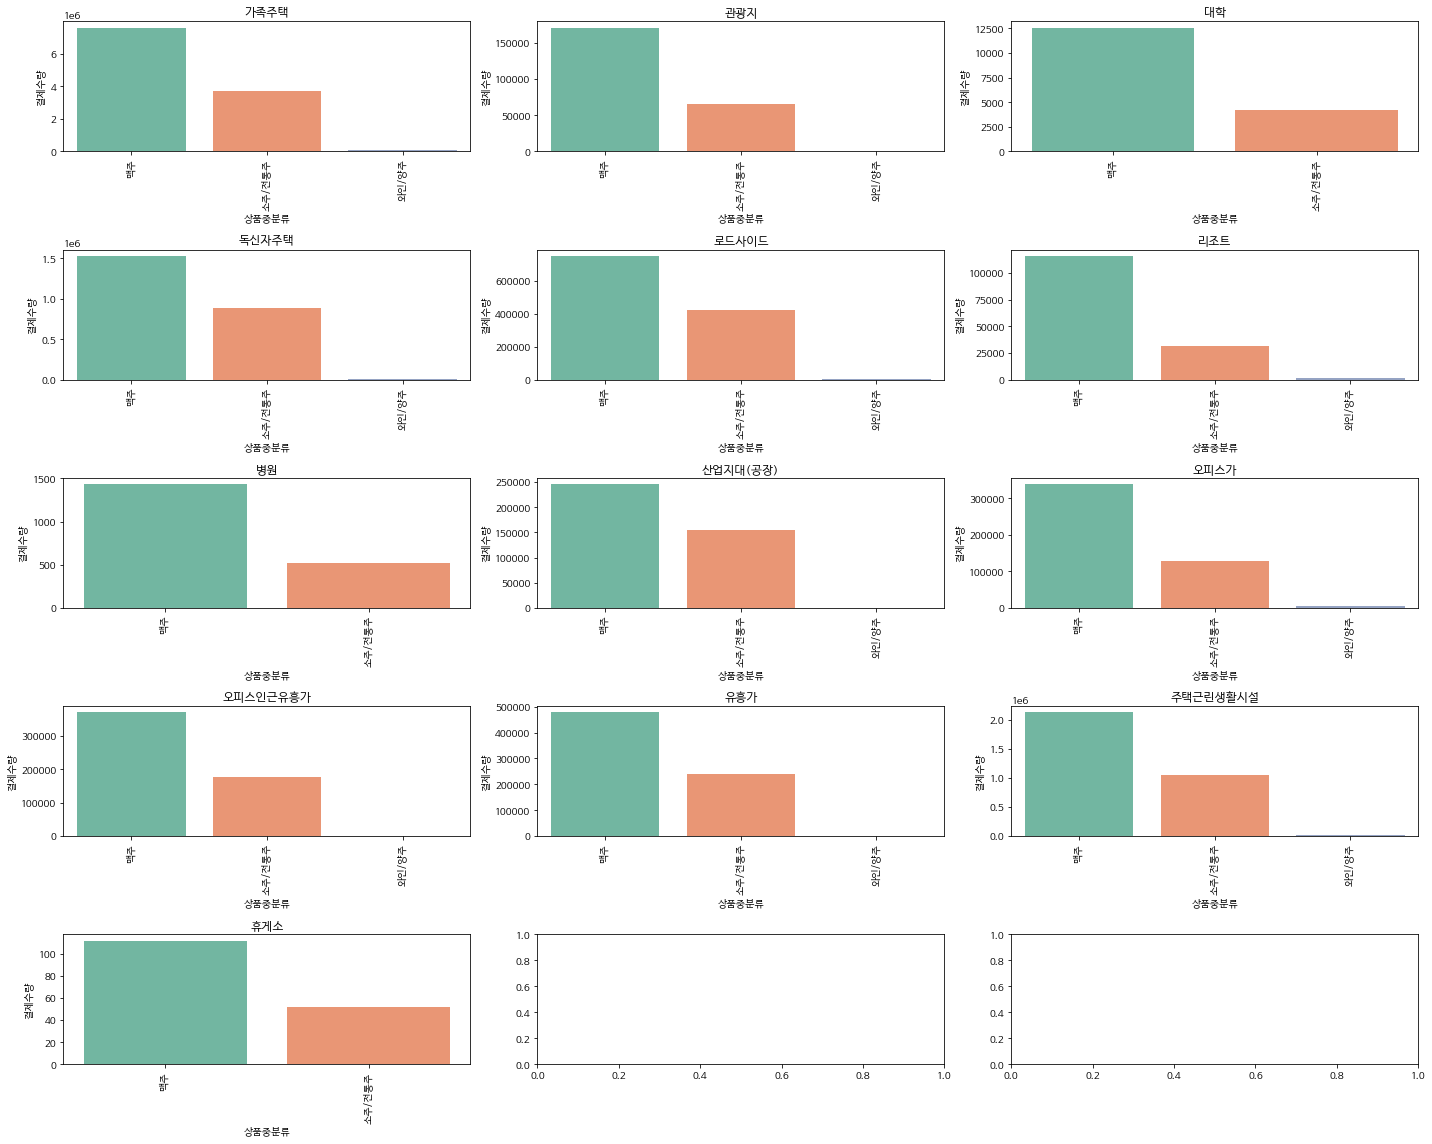

In [65]:
age_func1(data10_3)

#### 50대 주류 중분류 | 연령대 및 주변입지

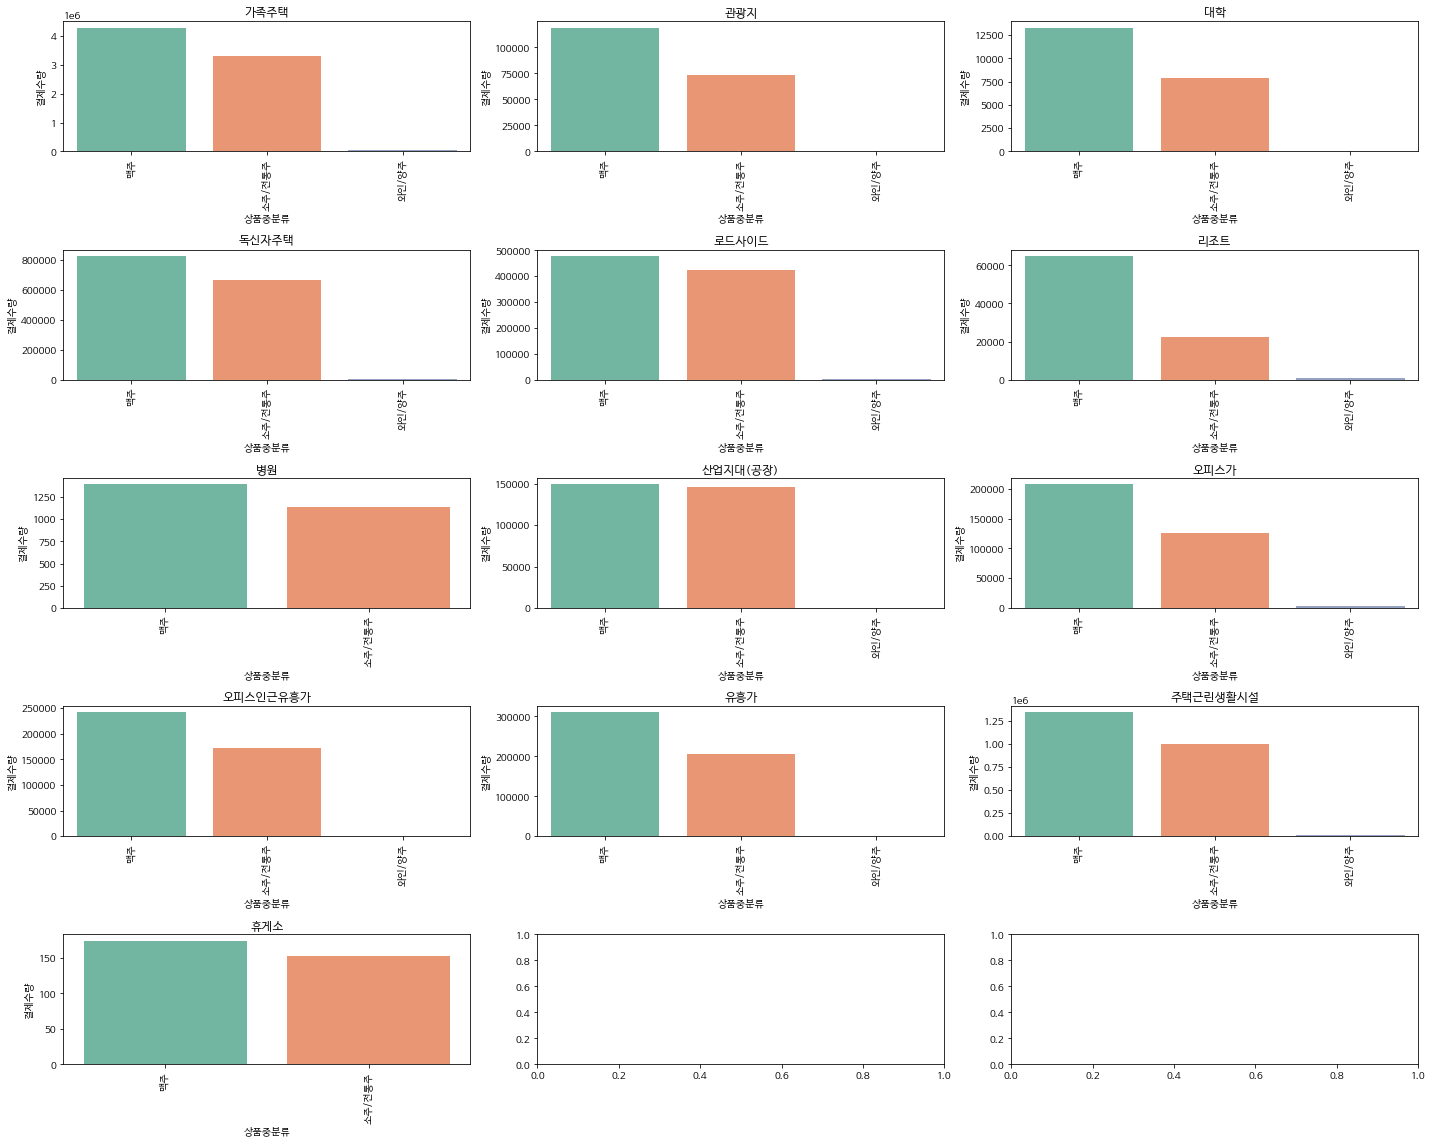

In [66]:
age_func1(data10_4)

#### 60대 주류 중분류 | 연령대 및 주변입지

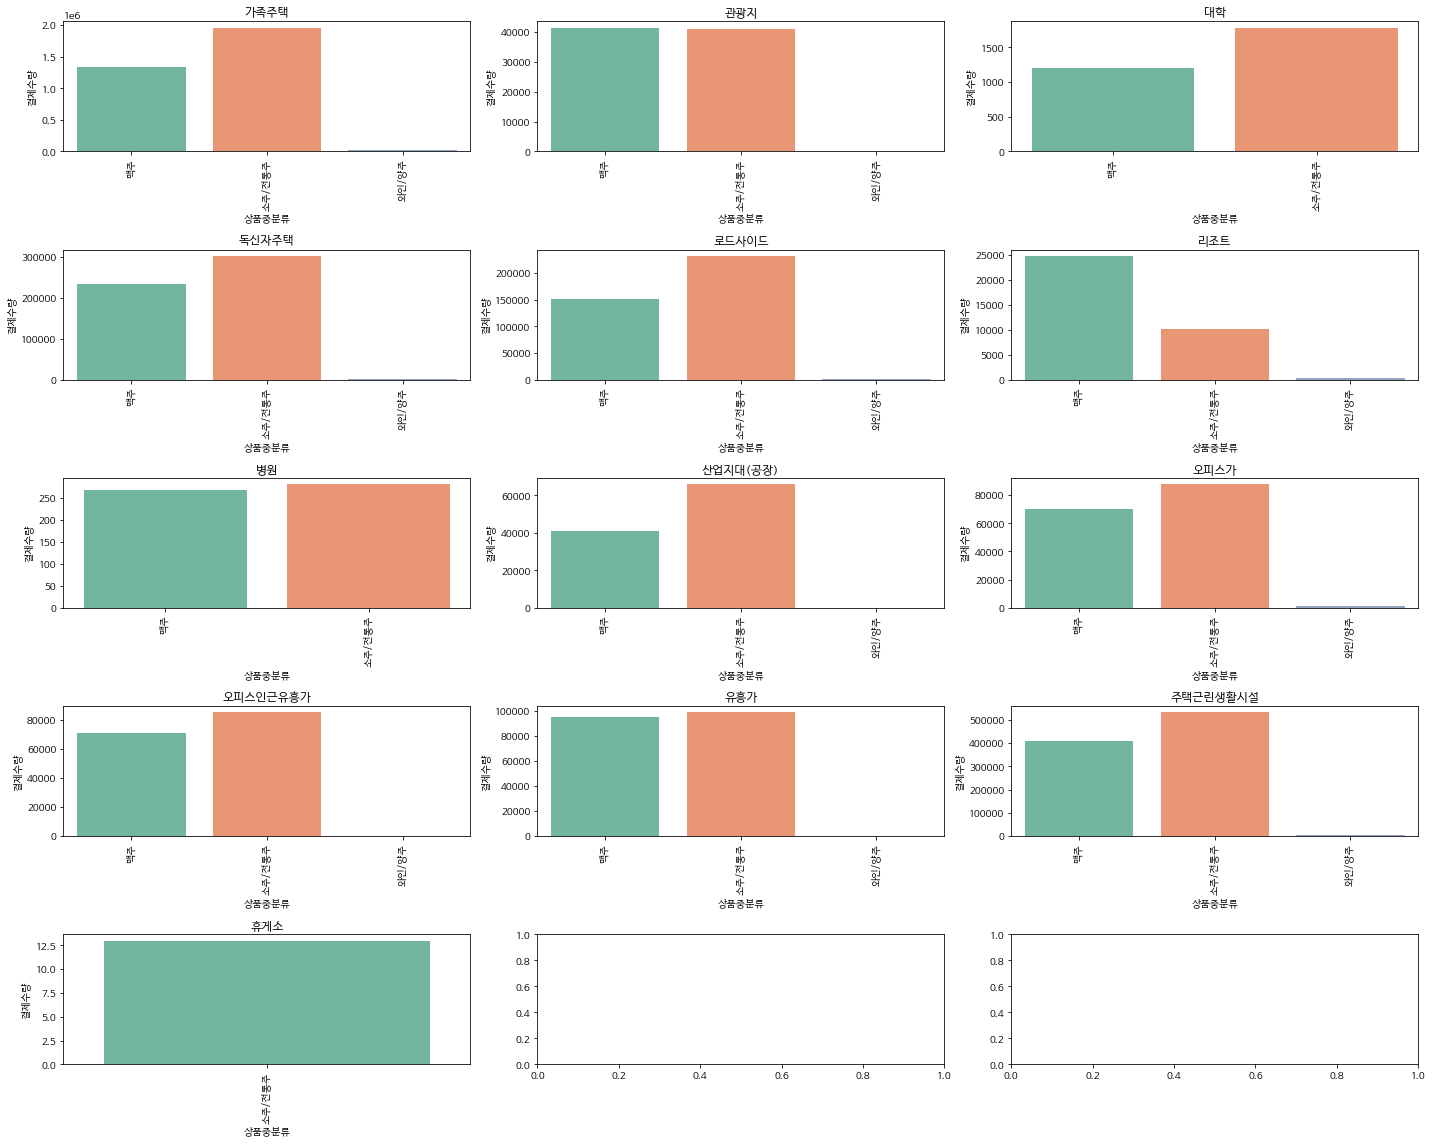

In [67]:
age_func1(data10_5)

### [음료 : 연령대와 가구생애에 따른 상품 결제수량 분석]

In [108]:
data10_1 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 20)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 30)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 40)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 50)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 60)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()

def age_func2(k,input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=k, figsize = (k*3,5))
    lctn_name = input_data['가구생애'].unique()
    
    for i in range(k) :
        plt.subplot(1,k,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['가구생애'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 음료 중분류 | 연령대 및 가구생애

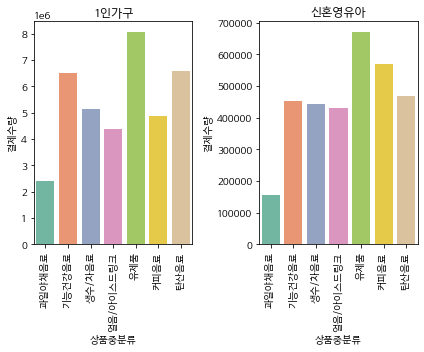

In [109]:
age_func2(2,data10_1)

#### 30대 음료 중분류 | 연령대 및 가구생애

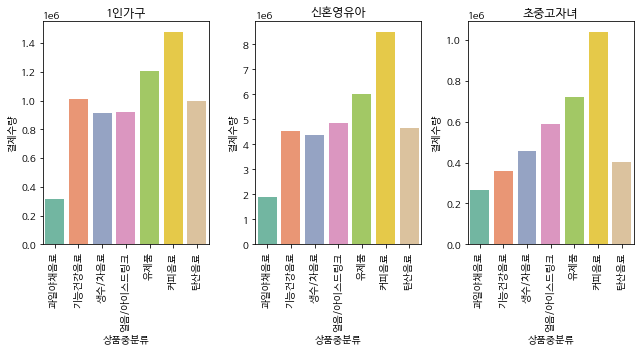

In [110]:
age_func2(3,data10_2)

* 30대 초중고 자녀에 해당하는 음료 품목 제품 구매 패턴이 다른 가구생애에 비하여 특징적이다. 

#### 40대 음료 중분류 | 연령대 및 가구생애

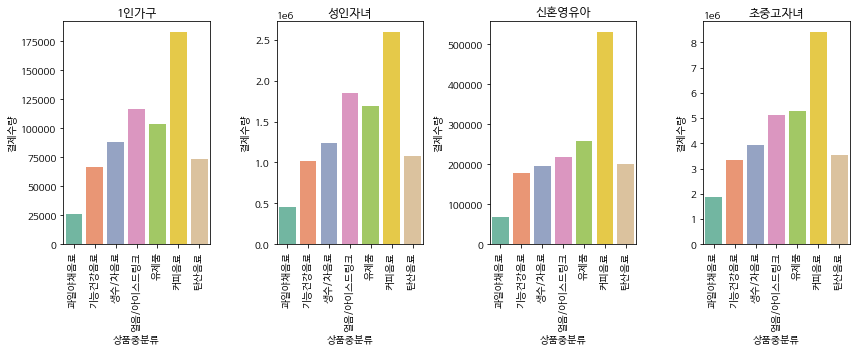

In [111]:
age_func2(4,data10_3)

#### 50대 음료 중분류 | 연령대 및 가구생애

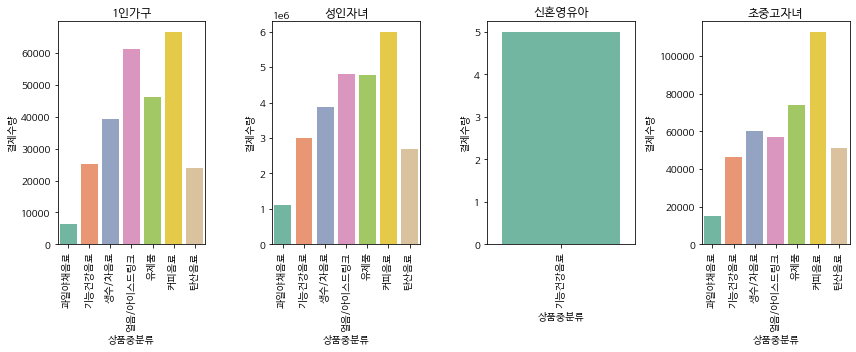

In [112]:
age_func2(4,data10_4)

- 젊은 연령층에 비해 전체 결제수량은 다소 떨어지지만, 3,40대와 전반적으로 음료종류별 결제수량 순위 양상이 유사하다.

#### 60대 음료 중분류 | 연령대 및 가구생애

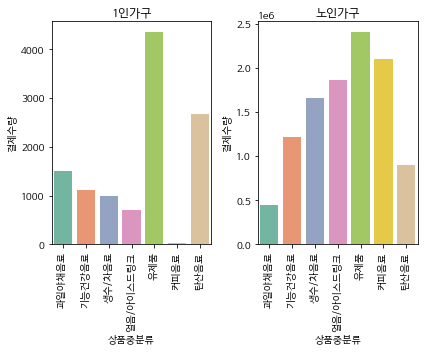

In [113]:
age_func2(2,data10_5)

- 전반적으로 유제품의 결제수량이 가장 높으나, '로드사이드, 휴게소'에서 커피음료의 결제수량 비중이 높으며, 다른 연령대에 비해 '로드사이드, 산업지대'에서 얼음/아이스드링크이 높은 결제수량을 기록했다.

### [간편식사 : 연령대와 가구생애에 따른 상품 결제수량 분석]

In [114]:
data10_1 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 20)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 30)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 40)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 50)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 60)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()

def age_func2(k,input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=k, figsize = (k*3,5))
    lctn_name = input_data['가구생애'].unique()
    
    for i in range(k) :
        plt.subplot(1,k,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['가구생애'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 간편식사 중분류 | 연령대 및 가구생애

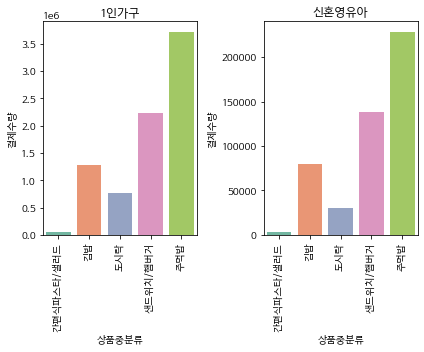

In [115]:
age_func2(2,data10_1)

- 대부분 주먹밥의 결제수량이 가장 높으며 그 뒤를 샌드위치/햄버거, 김밥이 잇는다. 휴게소에서는 샌드위치/햄버거의 결제수량이 가장 높다. 

#### 30대 간편식사 중분류 | 연령대 및 가구생애

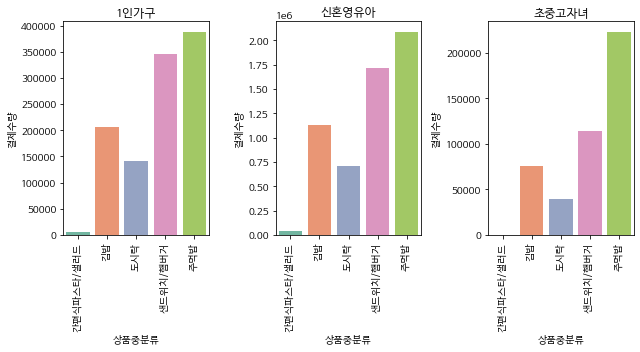

In [116]:
age_func2(3,data10_2)

#### 40대 간편식사 중분류 | 연령대 및 가구생애

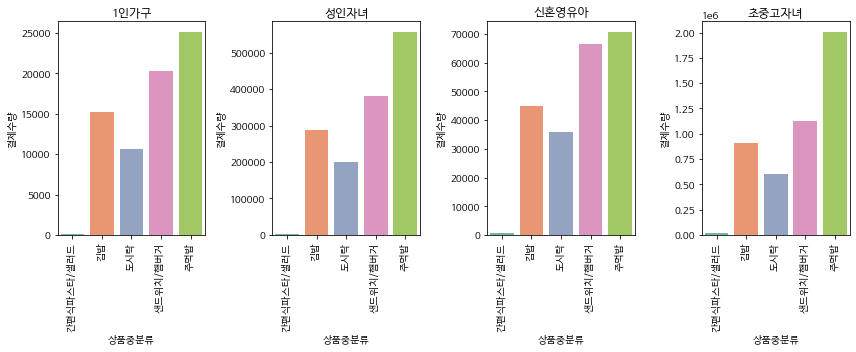

In [117]:
age_func2(4,data10_3)

#### 50대 간편식사 중분류 | 연령대 및 가구생애

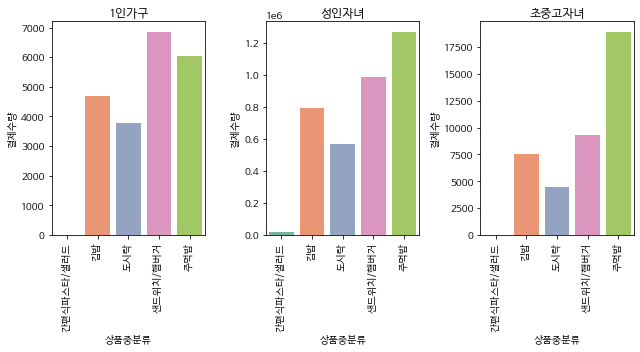

In [119]:
age_func2(3,data10_4)

#### 60대 간편식사 중분류 | 연령대 및 가구생애

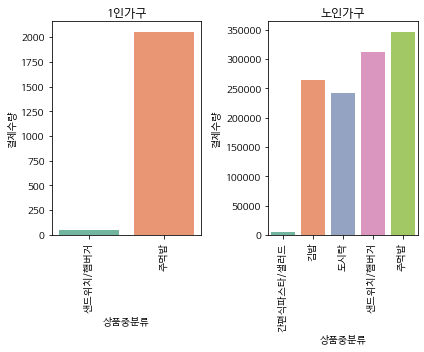

In [125]:
age_func2(2,data10_5)

* 독거노인의 경우, 그렇지 않은 노인가구보다 간편식사 구매 품목이 주먹밥으로 치중되어있다.

### [과자류 : 연령대와 가구생애에 따른 상품 결제수량 분석]

In [29]:
data10_1 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 20)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 30)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 40)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 50)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 60)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()

def age_func2(k,input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=k, figsize = (k*3,5))
    lctn_name = input_data['가구생애'].unique()
    
    for i in range(k) :
        plt.subplot(1,k,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['가구생애'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 과자류 중분류 | 연령대 및 가구생애

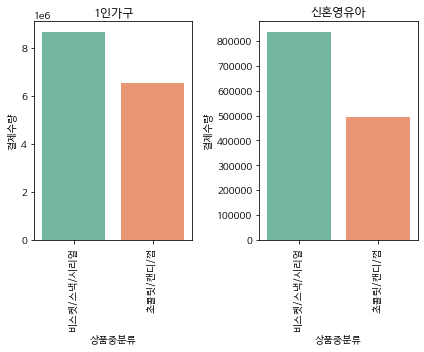

In [34]:
age_func2(2,data10_1)

#### 30대 과자류 중분류 | 연령대 및 가구생애

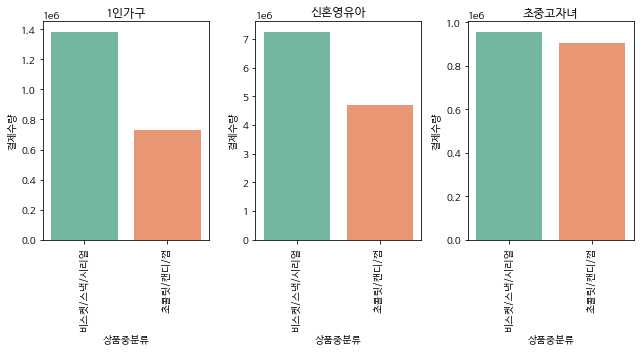

In [30]:
age_func2(3,data10_2)

* 초중고자녀를 둔 30대 고객은 비스켓/스낵/시리얼과 초콜릿/캔디/껌을 비슷한 빈도로 구매함을 파악할 수 있다. 

#### 40대 과자류 중분류 | 연령대 및 가구생애

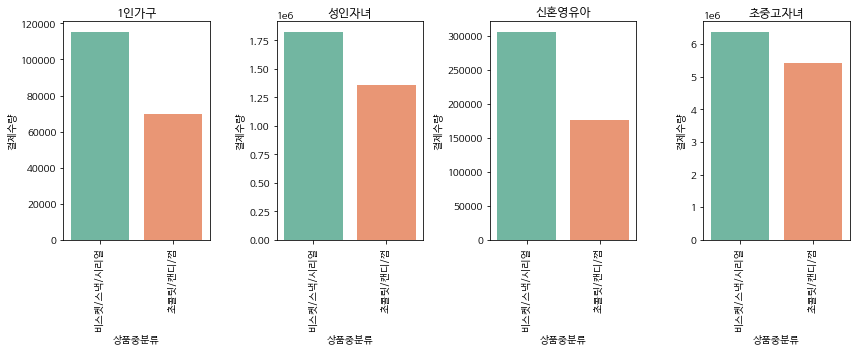

In [31]:
age_func2(4,data10_3)

#### 50대 과자류 중분류 | 연령대 및 가구생애

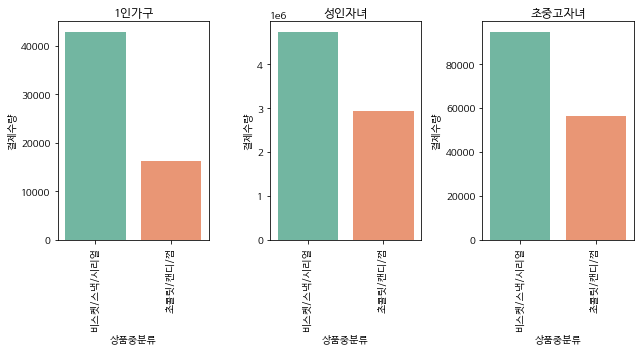

In [32]:
age_func2(3,data10_4)

#### 60대 과자류 중분류 | 연령대 및 가구생애

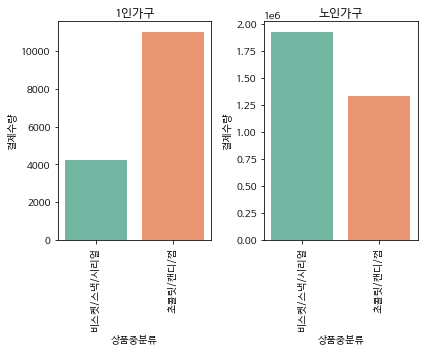

In [33]:
age_func2(2,data10_5)

### [주류 : 연령대와 가구생애에 따른 상품 결제수량 분석]

In [35]:
# 가구생애별 상품중분류별 결제수량
## 음료, 간편식사, 과자류, 주류, 가공식사제품
data10_1 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 20)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 30)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 40)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 50)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 60)].groupby(['AGE','가구생애','상품중분류'])['결제수량'].sum().reset_index()

def age_func2(k,input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=k, figsize = (k*3,5))
    lctn_name = input_data['가구생애'].unique()
    
    for i in range(k) :
        plt.subplot(1,k,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['가구생애'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 주류 중분류 | 연령대 및 가구생애

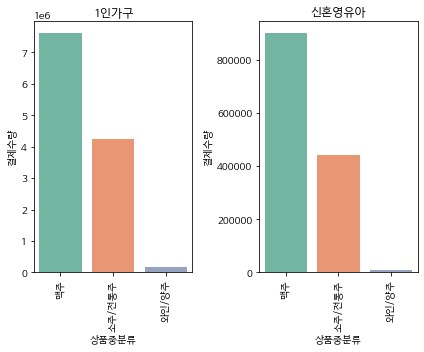

In [36]:
age_func2(2,data10_1)

#### 30대 주류 중분류 | 연령대 및 가구생애

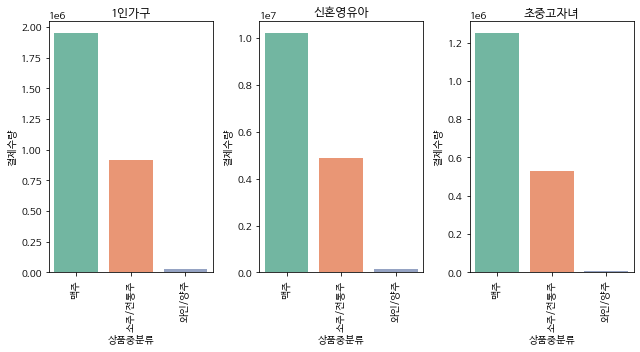

In [38]:
age_func2(3,data10_2)

#### 40대 주류 중분류 | 연령대 및 가구생애

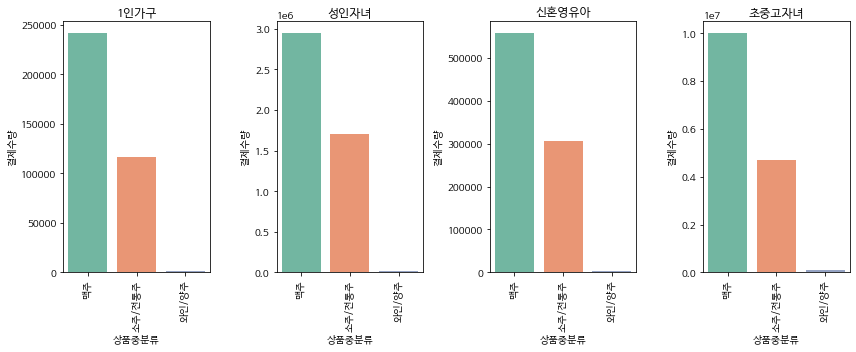

In [39]:
age_func2(4,data10_3)

#### 50대 주류 중분류 | 연령대 및 가구생애

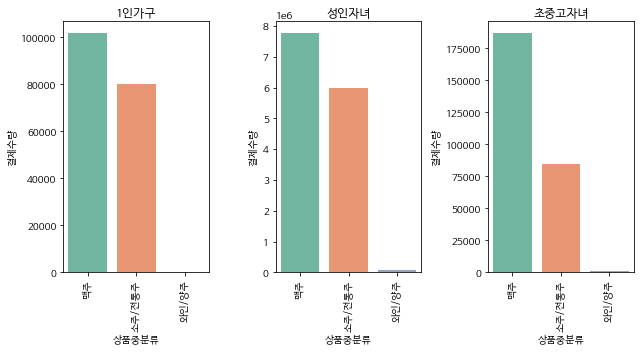

In [40]:
age_func2(3,data10_4)

#### 60대 주류 중분류 | 연령대 및 가구생애

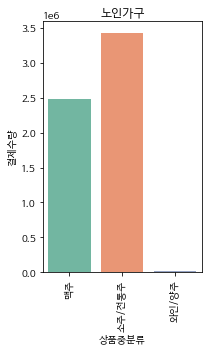

In [41]:
age_func2(1,data10_5)

### [음료 : 연령대와 결제시간에 따른 상품 결제수량 분석]

In [42]:
data10_1 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 20)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 30)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 40)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 50)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '음료') & (data['AGE'] == 60)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()

def age_func3(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (12,3))
    lctn_name = input_data['결제시간'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['결제시간'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 음료 중분류 | 연령대 및 결제시간

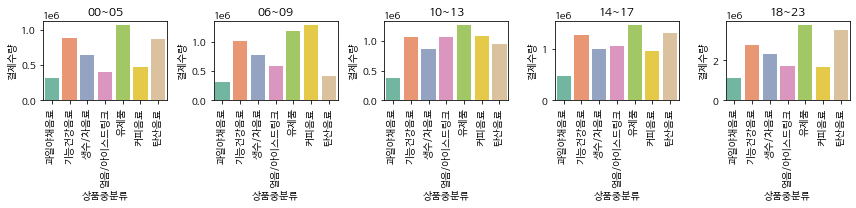

In [43]:
age_func3(data10_1)

* 오후보단 오전 시간대의 커피 음료 구매빈도가 더 높았다.

#### 30대 음료 중분류 | 연령대 및 결제시간

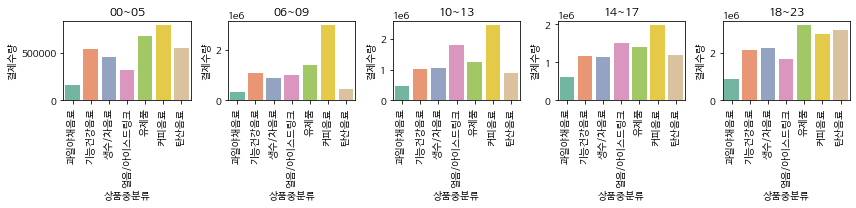

In [44]:
age_func3(data10_2)

#### 40대 음료 중분류 | 연령대 및 결제시간

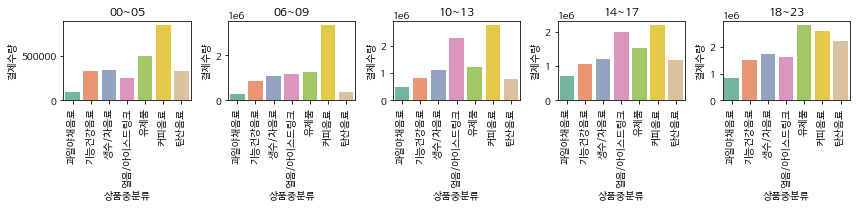

In [45]:
age_func3(data10_3)

#### 50대 음료 중분류 | 연령대 및 결제시간

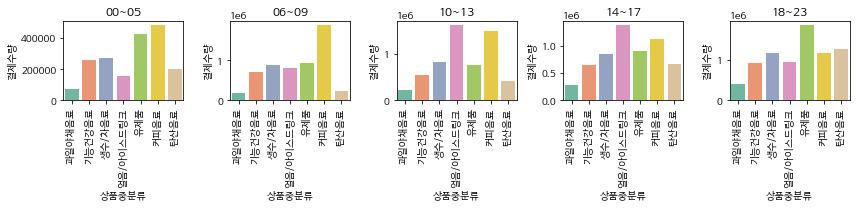

In [46]:
age_func3(data10_4)

* 유제품 품목에 대해 주로 저녁~새벽 시간에 구매를 많이 한다.

#### 60대 음료 중분류 | 연령대 및 결제시간

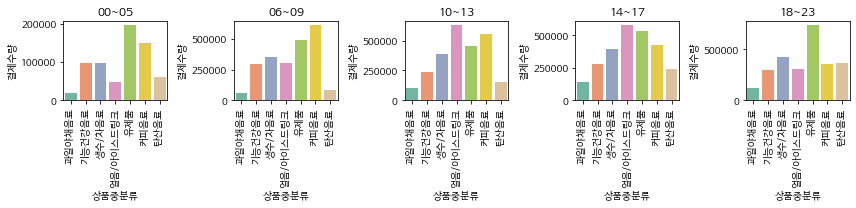

In [47]:
age_func3(data10_5)

### [간편식사 : 연령대와 결제시간에 따른 상품 결제수량 분석]

In [48]:
data10_1 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 20)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 30)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 40)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 50)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '간편식사') & (data['AGE'] == 60)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()

def age_func3(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (12,3))
    lctn_name = input_data['결제시간'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['결제시간'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 간편식사 중분류 | 연령대 및 결제시간

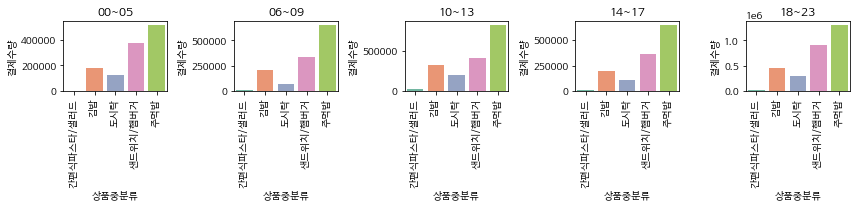

In [49]:
age_func3(data10_1)

#### 30대 간편식사 중분류 | 연령대 및 결제시간

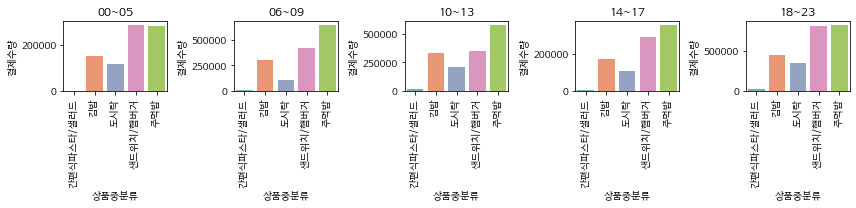

In [50]:
age_func3(data10_2)

* 주먹밥은 시간에 따른 구매 빈도의 차이가 많이 나지 않지만, 샌드위치/햄버거는 시간에 따라 구매 빈도가 변한다.

#### 40대 간편식사 중분류 | 연령대 및 결제시간

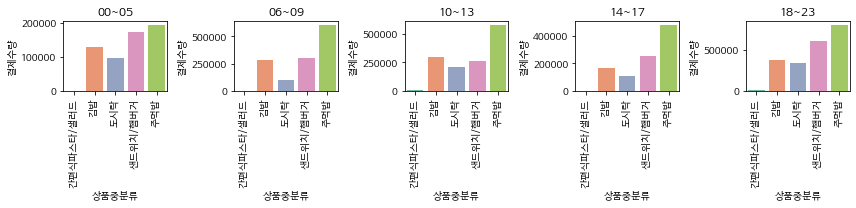

In [51]:
age_func3(data10_3)

#### 50대 간편식사 중분류 | 연령대 및 결제시간

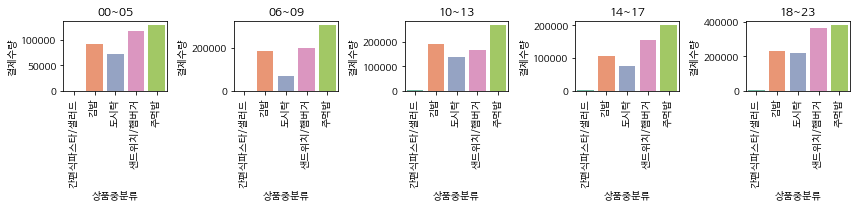

In [52]:
age_func3(data10_4)

#### 60대 간편식사 중분류 | 연령대 및 결제시간

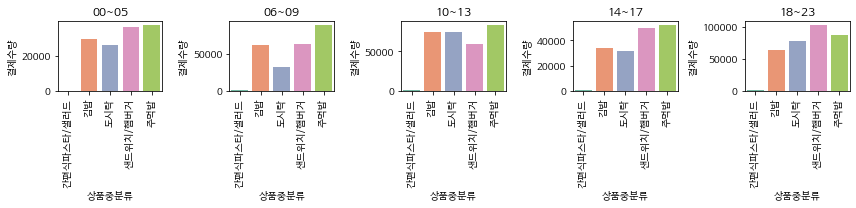

In [53]:
age_func3(data10_5)

### [과자류 : 연령대와 결제시간에 따른 상품 결제수량 분석]

In [54]:
data10_1 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 20)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 30)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 40)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 50)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '과자류') & (data['AGE'] == 60)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()

def age_func3(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (12,3))
    lctn_name = input_data['결제시간'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['결제시간'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 과자류 중분류 | 연령대 및 결제시간

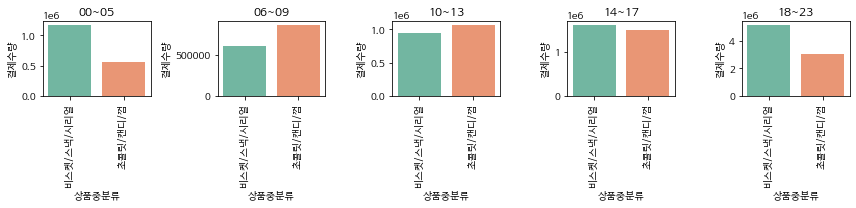

In [55]:
age_func3(data10_1)

#### 30대 과자류 중분류 | 연령대 및 결제시간

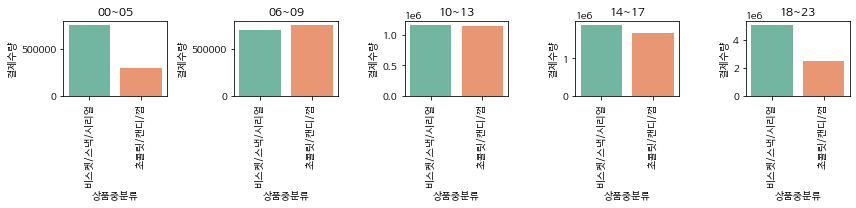

In [56]:
age_func3(data10_2)

#### 40대 과자류 중분류 | 연령대 및 결제시간

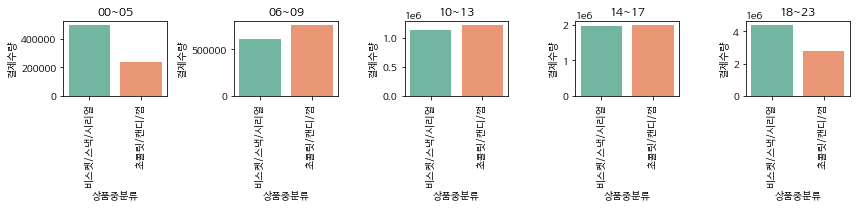

In [57]:
age_func3(data10_3)

#### 50대 과자류 중분류 | 연령대 및 결제시간

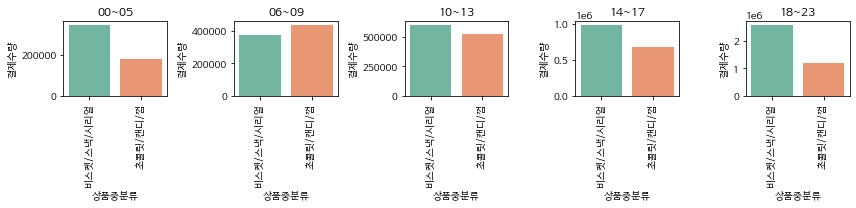

In [58]:
age_func3(data10_4)

#### 60대 과자류 중분류 | 연령대 및 결제시간

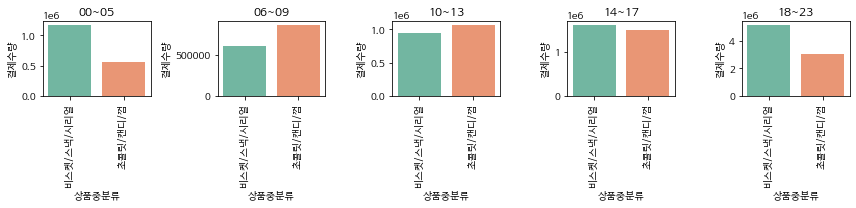

In [55]:
age_func3(data10_5)

### [주류 : 연령대와 결제시간에 따른 상품 결제수량 분석]

In [59]:
data10_1 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 20)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 30)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 40)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 50)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data[(data['상품대분류'] == '주류') & (data['AGE'] == 60)].groupby(['AGE','결제시간','상품중분류'])['결제수량'].sum().reset_index()

def age_func3(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (12,3))
    lctn_name = input_data['결제시간'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['결제시간'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 20대 주류 중분류 | 연령대 및 결제시간

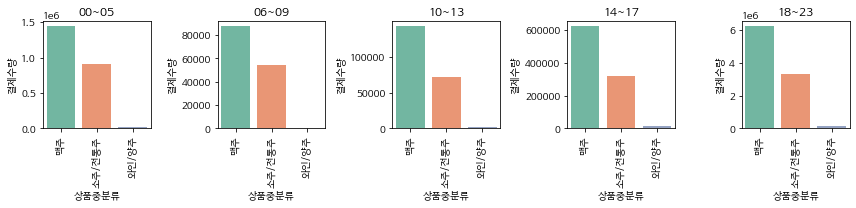

In [60]:
age_func3(data10_1)

#### 30대 주류 중분류 | 연령대 및 결제시간

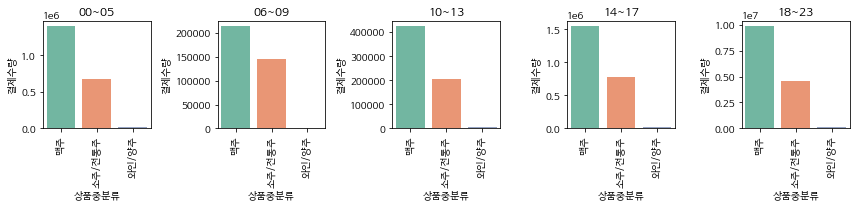

In [61]:
age_func3(data10_2)

#### 40대 주류 중분류 | 연령대 및 결제시간

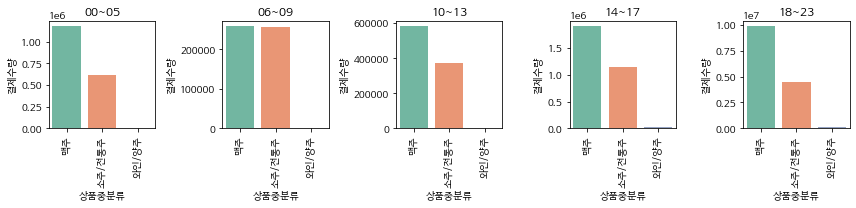

In [62]:
age_func3(data10_3)

#### 50대 주류 중분류 | 연령대 및 결제시간

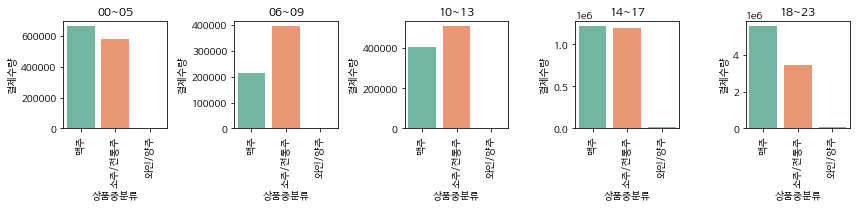

In [63]:
age_func3(data10_4)

* 다른 연령대와 달리 아침~오전 시간대에 맥주보다 소주/전통주의 판매가 더 높았다.

#### 60대 주류 중분류 | 연령대 및 결제시간

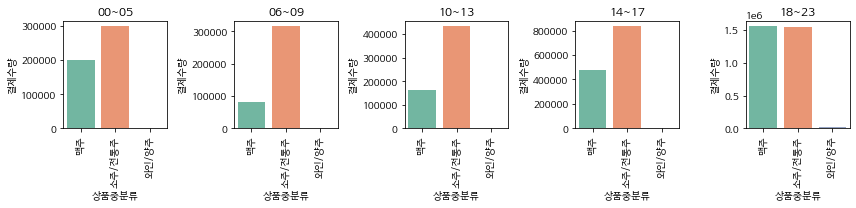

In [64]:
age_func3(data10_5)

* 맥주의 빈도가 더 높았던 다른 연령대와 달리 소주/전통주의 빈도가 훨씬 높다.

### (3) 성별에 따른 고객 라이프스타일 분석
* 위의 연령대에 따른 고객 라이프스타일 분석에 추가하여 EDA를 통해 성별에 따른 고객 라이프스타일 분석을 추가적으로 진행해보고자 한다

#### [월별 성별에 따른 상품 결제수량 분석]

In [6]:
data9 = data[data['상품대분류'] == '음료'].groupby(['month','SEX','상품중분류'])['결제수량'].sum().reset_index()
data9_1 = data[data['상품대분류'] == '가공식사제품'].groupby(['month','SEX','상품중분류'])['결제수량'].sum().reset_index()
data9_2 = data[data['상품대분류'] == '간편식사'].groupby(['month','SEX','상품중분류'])['결제수량'].sum().reset_index()
data9_3 = data[data['상품대분류'] == '주류'].groupby(['month','SEX','상품중분류'])['결제수량'].sum().reset_index()

def drink_mid1(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
    sex_name = input_data['SEX'].unique()
    
    for i in range(2) :
        plt.subplot(1,2,i+1)
        #plt.xticks(rotation =90, fontsize = 10)
        sns.lineplot(x = 'month', y = '결제수량',hue = '상품중분류',data = input_data[input_data['SEX'] == sex_name[i]], ci = None)
        plt.title(sex_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 음료

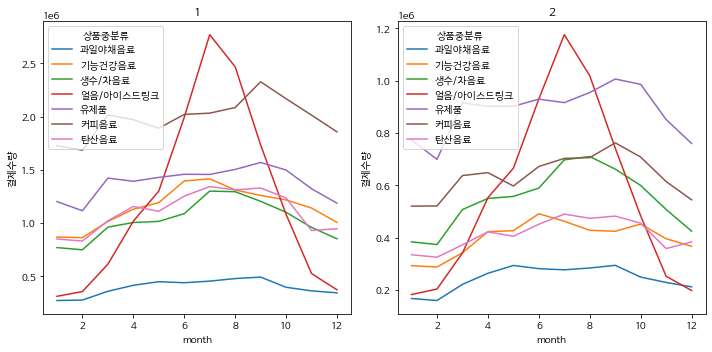

In [15]:
drink_mid1(data9)

- 남성 : 얼음/아이스드링크, 커피, 기능건가음료, 생수/차음료
- 여성 : 유제품, 생수/차음료가 상위권에 위치하고 있다

#### 가공식사제품

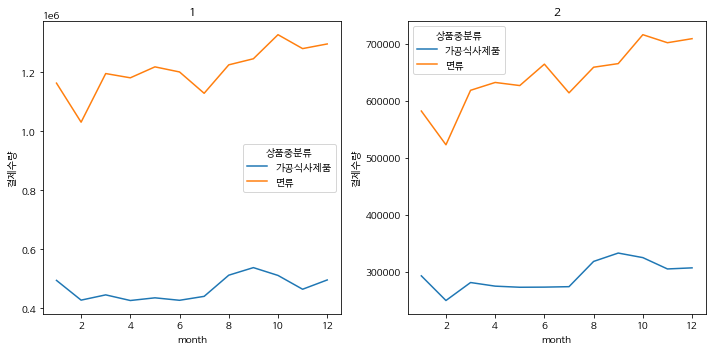

In [7]:
drink_mid1(data9_1)

#### 간편식사

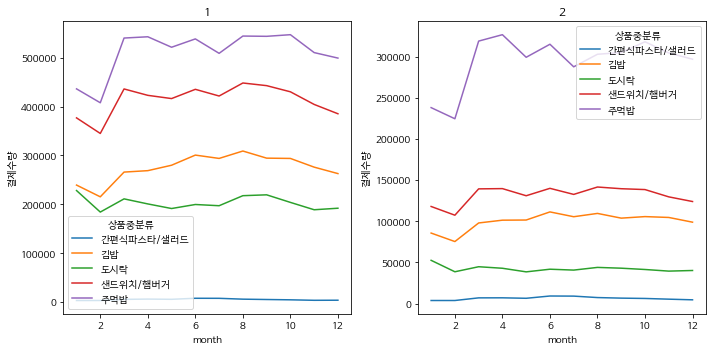

In [8]:
drink_mid1(data9_2)

* 성별에 관계없이 주먹밥 > 샌드위치/햄버거 > 김밥 > 도시락 > 간편식사/샐러드 순으로 간편식사 구매가 이루어진다. 

#### 주류

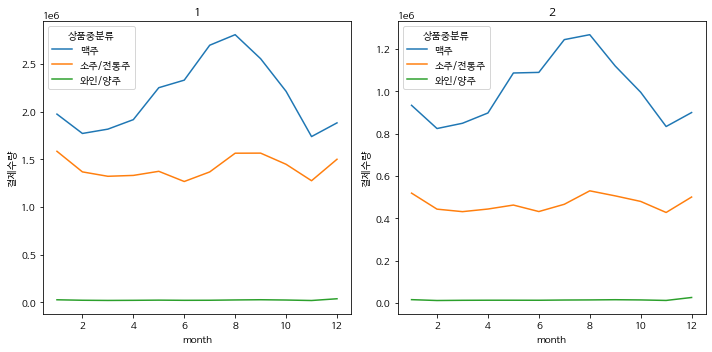

In [9]:
drink_mid1(data9_3)

#### [남성 : 주변입지에 따른 상품 결제수량 분석]

In [14]:
# 남성 _ 주변입지별 상품중분류별 결제수량
data10_1 = data[data['상품대분류'] == '음료'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_1 = data10_1[data10_1['SEX'] == 1]

data10_2 = data[data['상품대분류'] == '간편식사'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_2 = data10_2[data10_2['SEX'] == 1]

data10_3 = data[data['상품대분류'] == '과자류'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_3 = data10_3[data10_3['SEX'] == 1]

data10_4 = data[data['상품대분류'] == '주류'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_4 = data10_4[data10_4['SEX'] == 1]

data10_5 = data[data['상품대분류'] == '가공식사제품'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data10_5 = data10_5[data10_5['SEX'] == 1]

def drink_mid_man(input_data) :
    fig,ax = plt.subplots(nrows=5, ncols=3, figsize = (20,16))
    lctn_name = input_data['주변입지'].unique()
    
    for i in range(13) :
        plt.subplot(5,3,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['주변입지'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 음료 | 남성, 주변입지

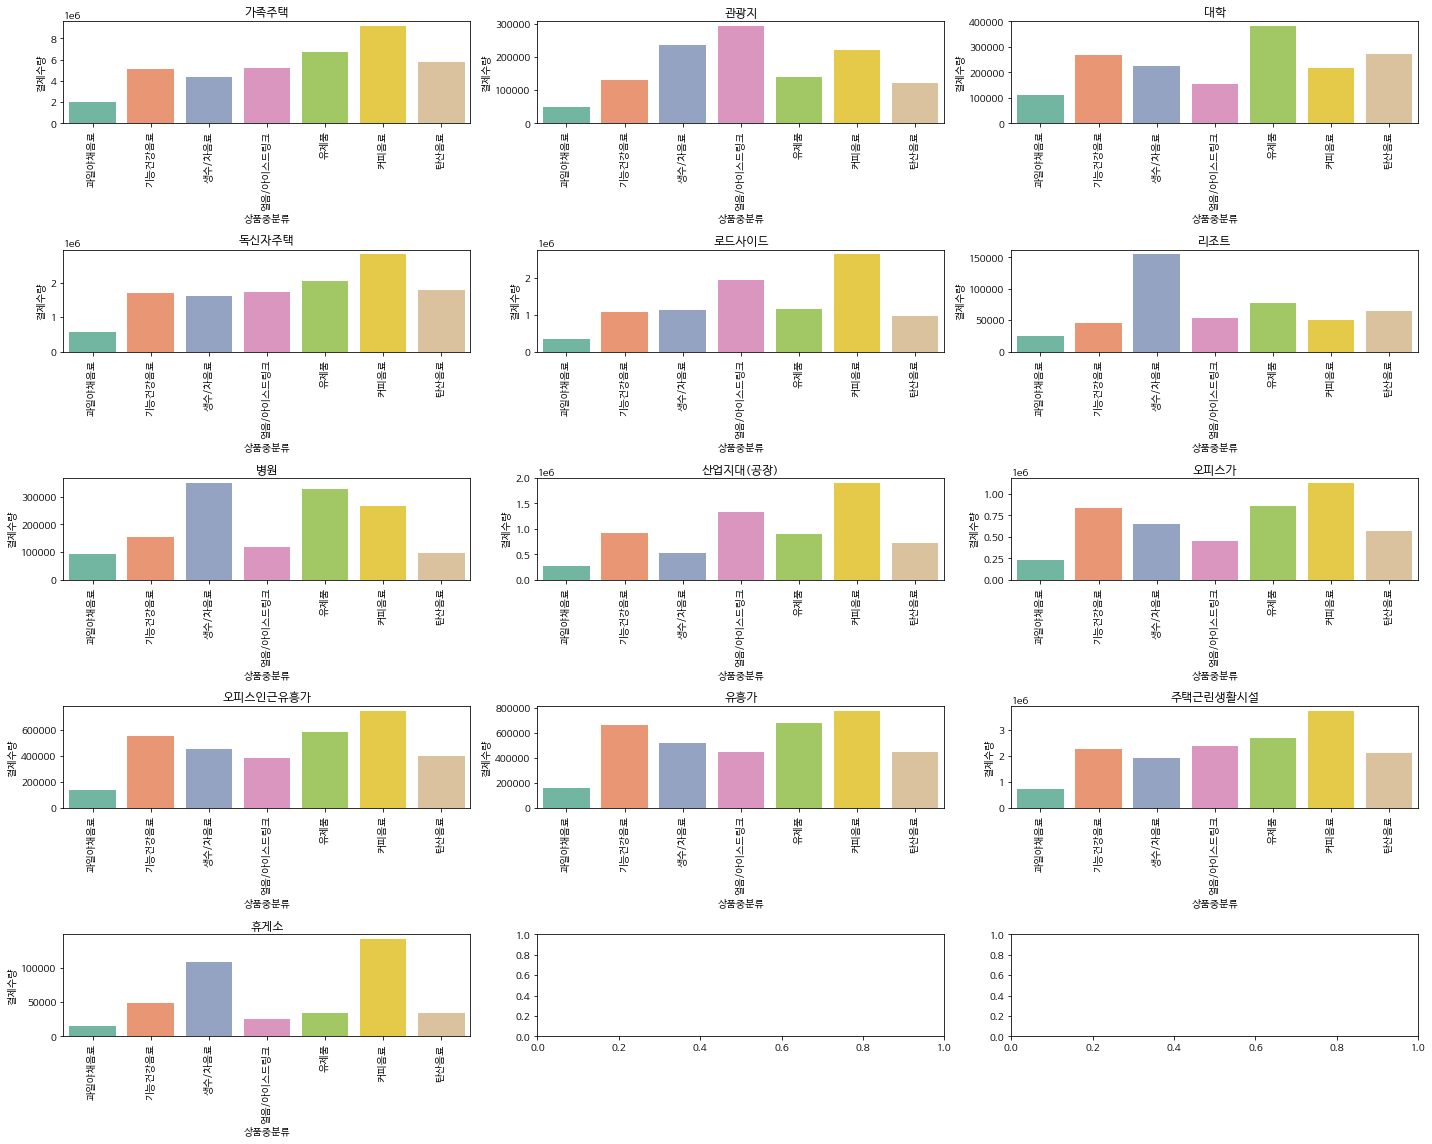

In [15]:
drink_mid_man(data10_1)

* 다른 입지와 달리 리조트 주변 편의점에서는 생수/차에 대한 수요가 높고 커피음료에 대한 수요는 낮았다.

#### 간편식사 | 남성, 주변입지

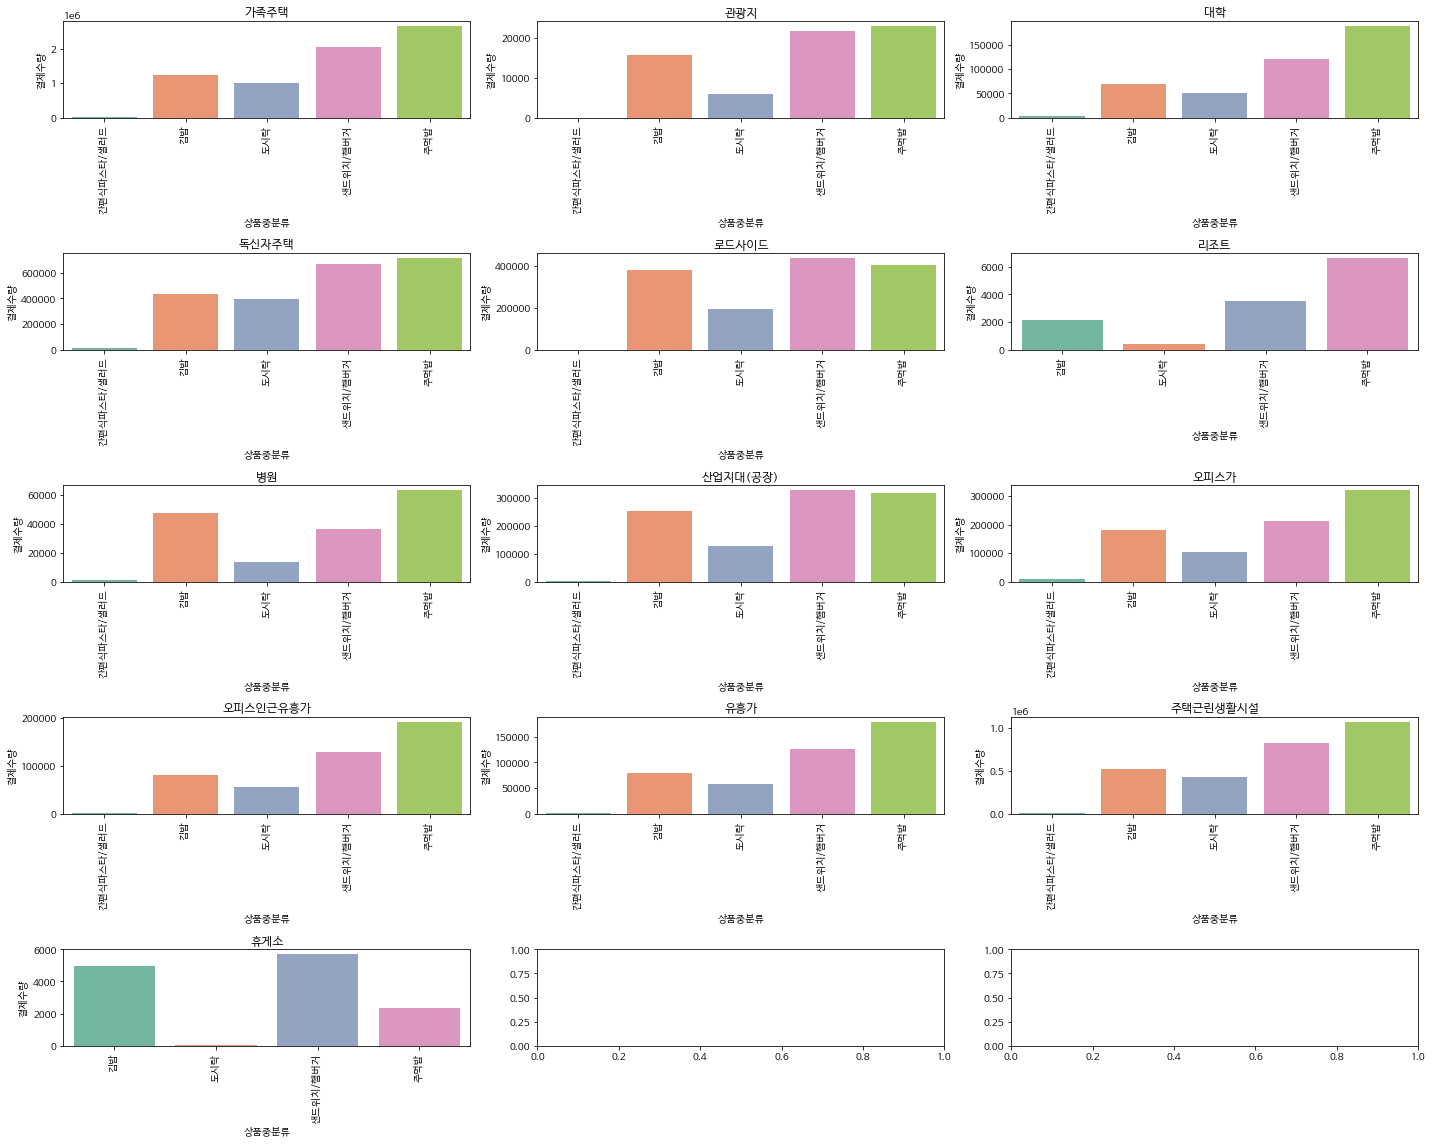

In [16]:
drink_mid_man(data10_2)

* 다른 입지와 달리 휴게소에서는 주먹밥보단 샌드위치/햄버거 구매빈도가 높았다.

#### 과자류 | 남성, 주변입지

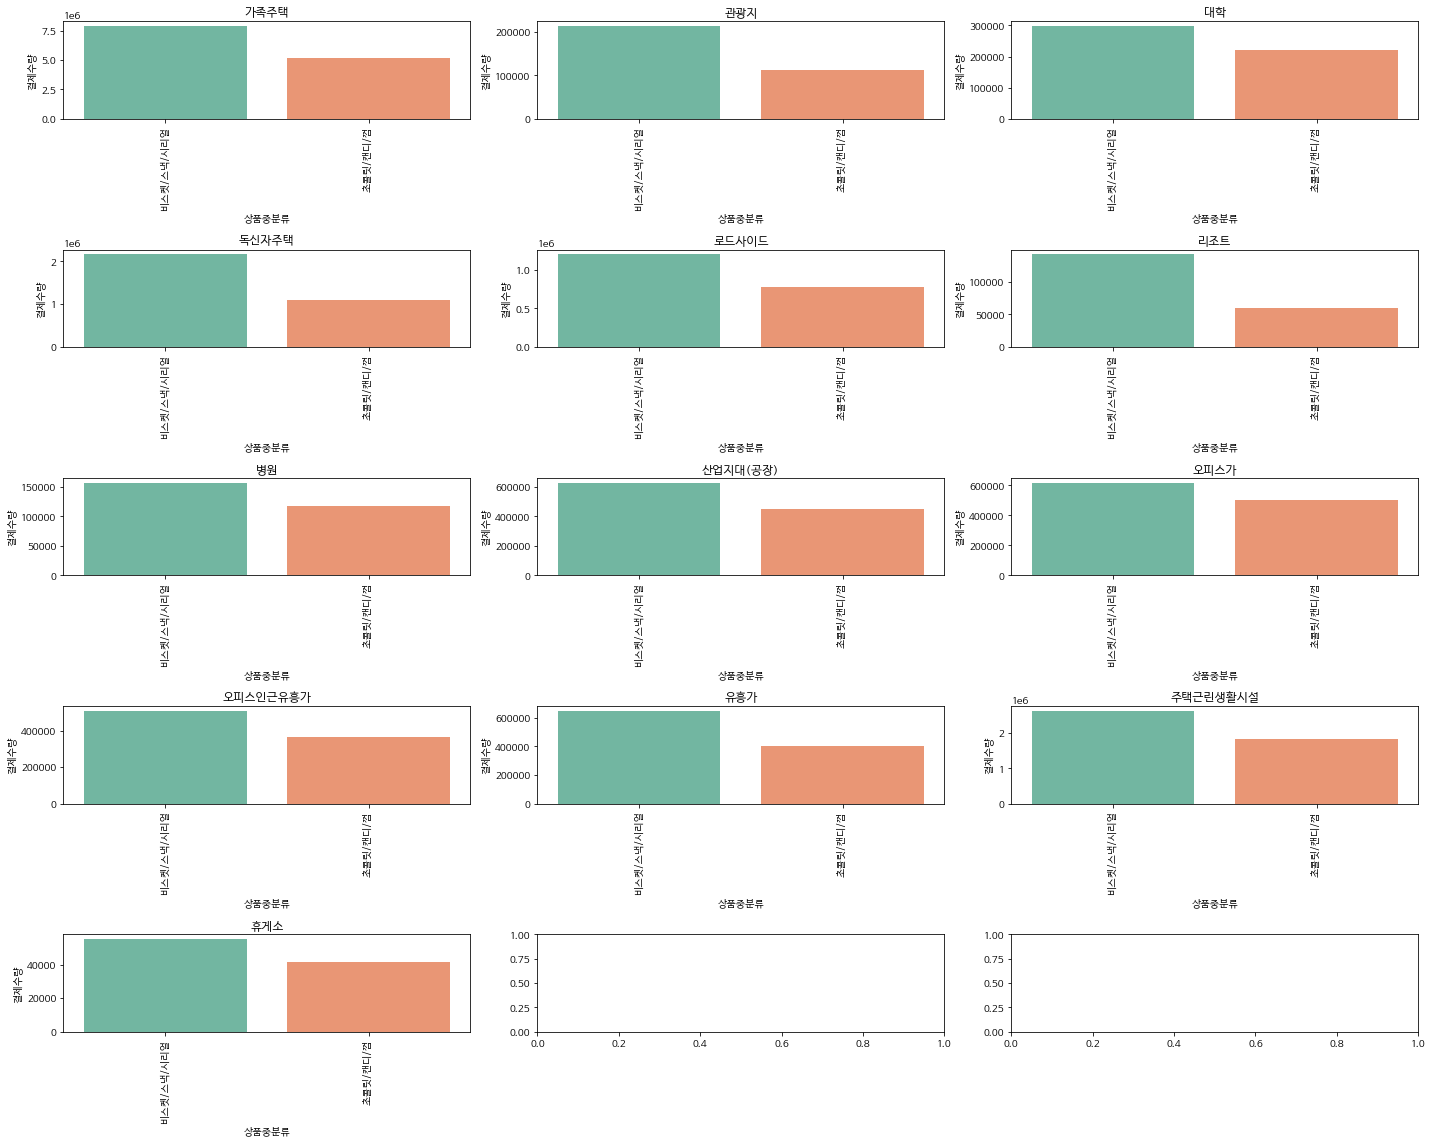

In [17]:
drink_mid_man(data10_3)

#### 가공식사제품 | 남성, 주변입지

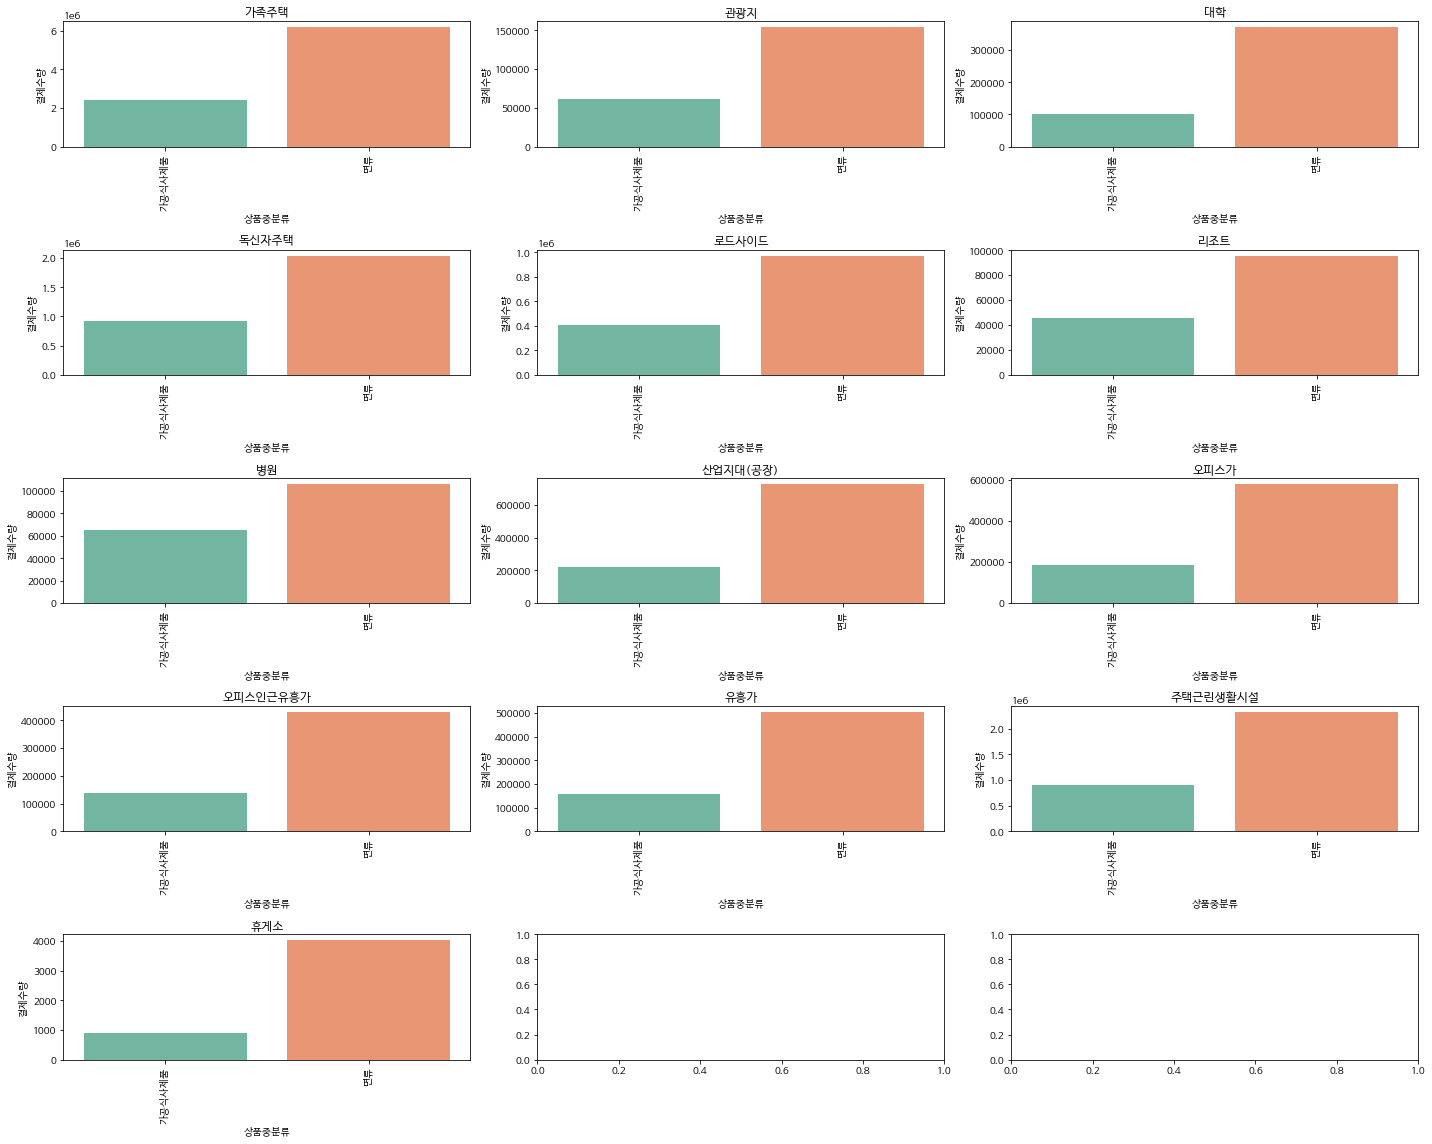

In [18]:
drink_mid_man(data10_5)

#### [여성 : 주변입지별 상품 결제수량 분석]

In [13]:
data11_1 = data[data['상품대분류'] == '음료'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data11_1 = data11_1[data11_1['SEX'] == 2]

data11_2 = data[data['상품대분류'] == '간편식사'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data11_2 = data11_2[data11_2['SEX'] == 2]

data11_3 = data[data['상품대분류'] == '과자류'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data11_3 = data11_3[data11_3['SEX'] == 2]

data11_4 = data[data['상품대분류'] == '주류'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data11_4 = data11_4[data11_4['SEX'] == 2]

data11_5 = data[data['상품대분류'] == '가공식사제품'].groupby(['SEX','주변입지','상품중분류'])['결제수량'].sum().reset_index()
data11_5 = data11_5[data11_5['SEX'] == 2]

def drink_mid_wm(input_data) :
    fig,ax = plt.subplots(nrows=5, ncols=3, figsize = (20,16))
    lctn_name = input_data['주변입지'].unique()
    
    for i in range(13) :
        plt.subplot(5,3,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['주변입지'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 음료 | 여성, 주변입지

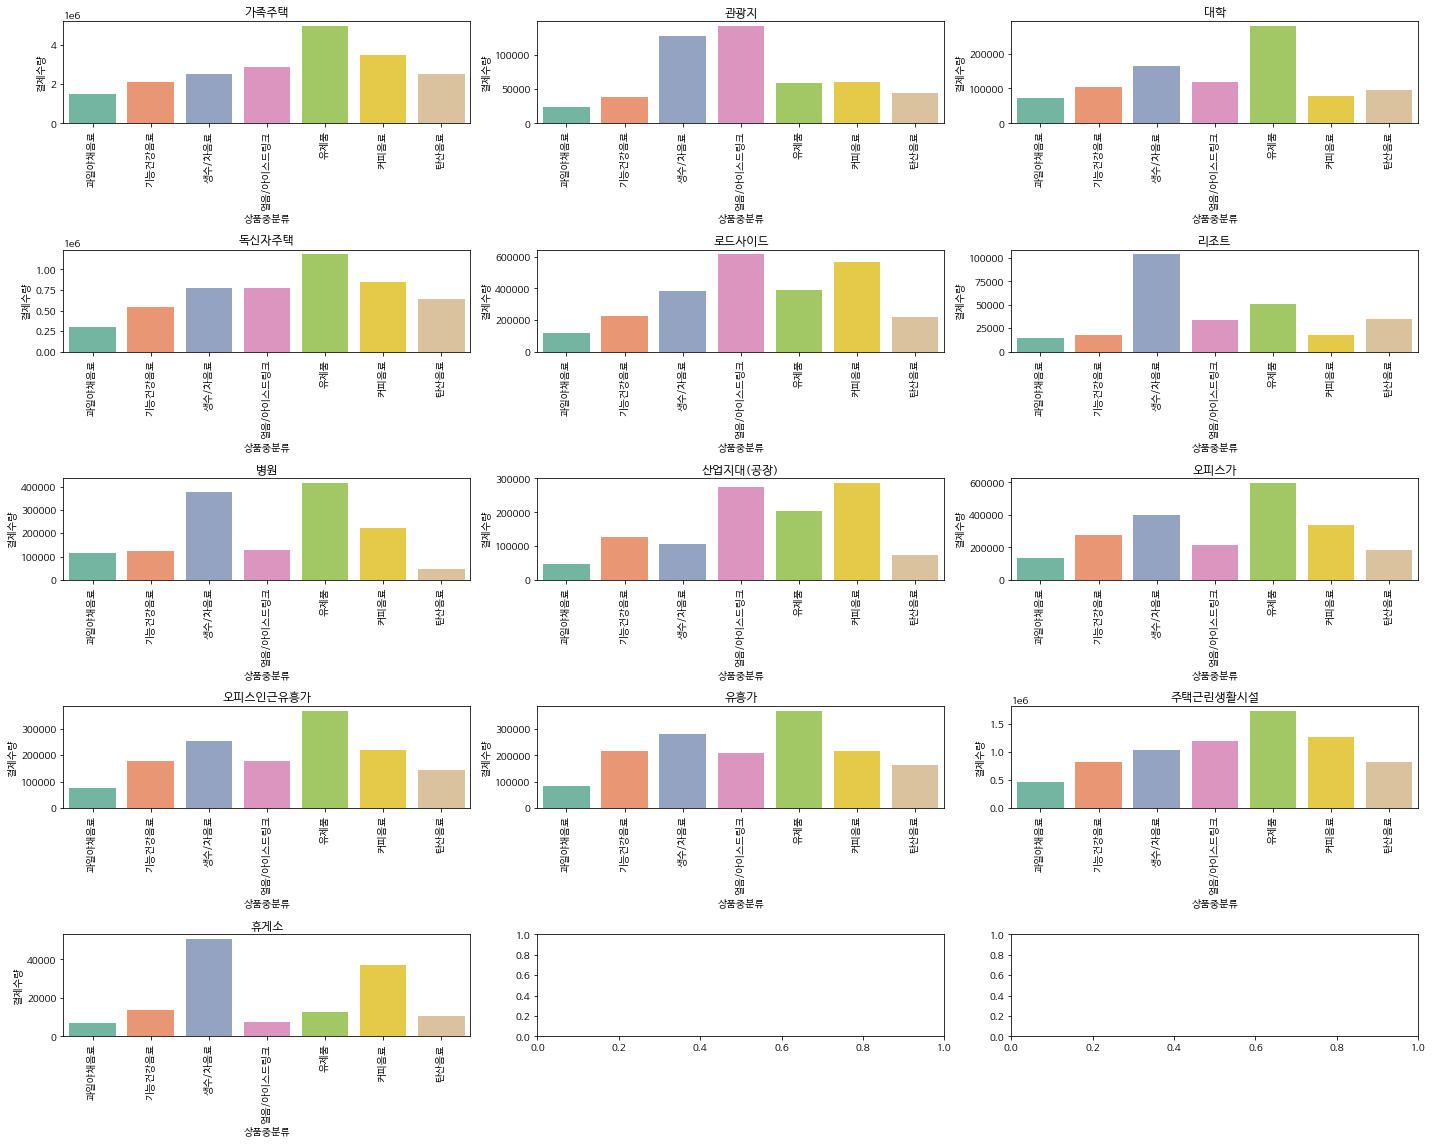

In [14]:
drink_mid_wm(data11_1)

* 휴게소에서의 유제품 구매 빈도가 다른 입지보다 낮았다.

#### 간편식사 | 여성, 주변입지

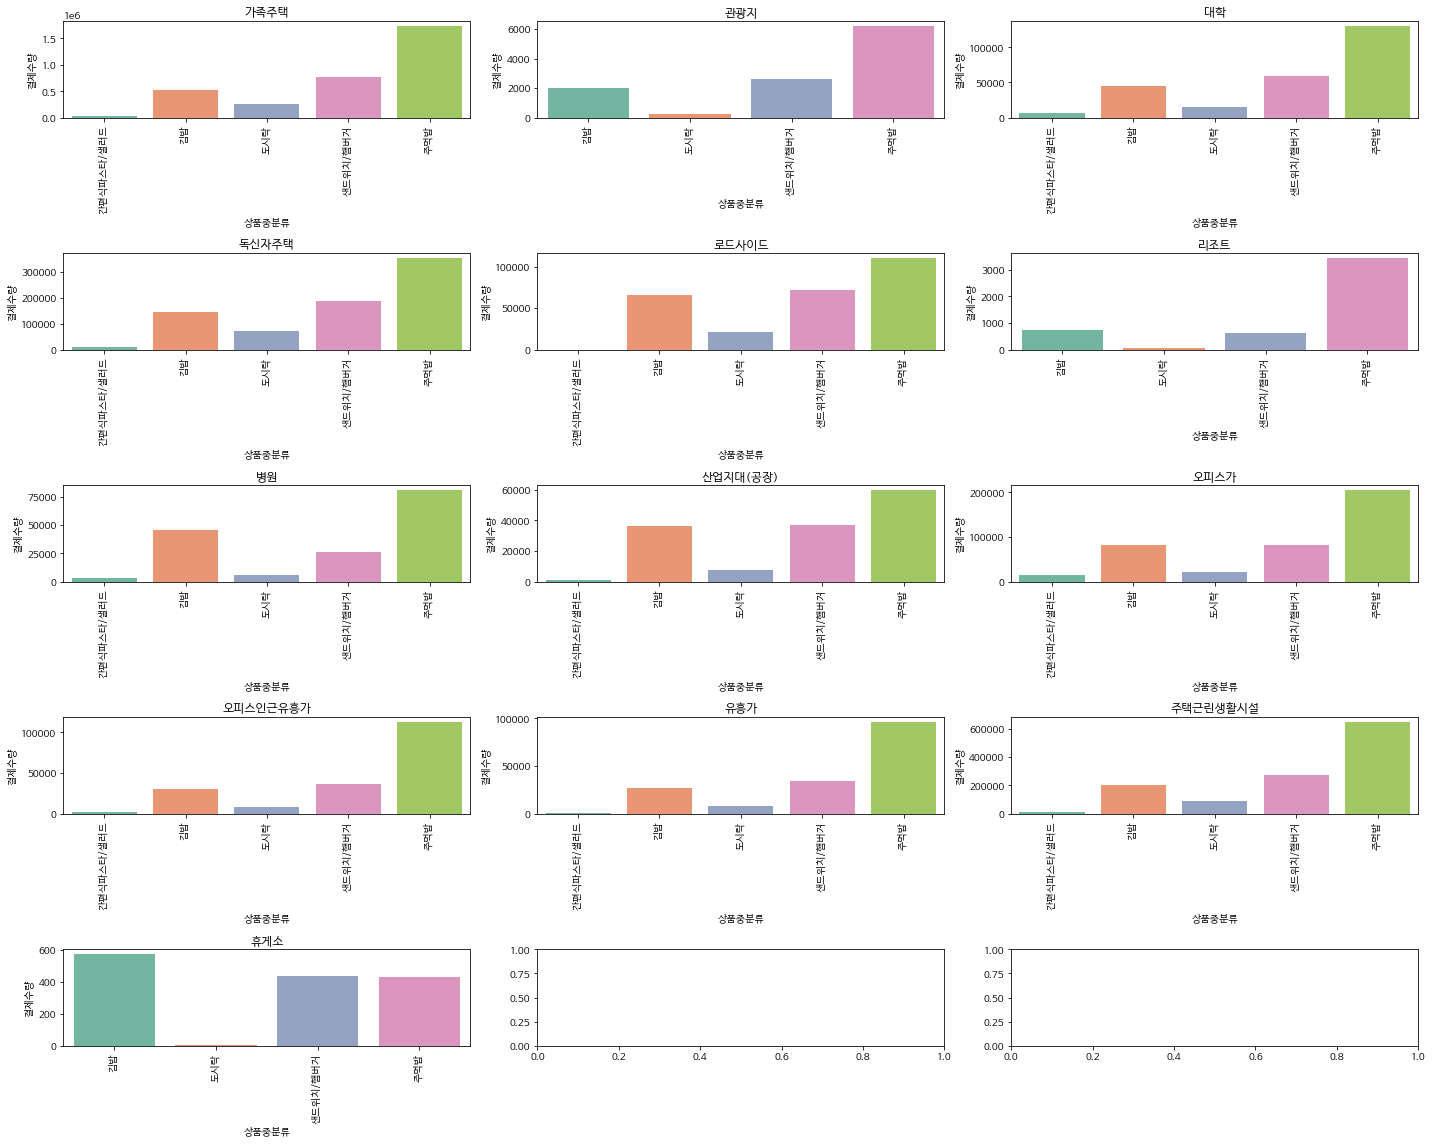

In [15]:
drink_mid_wm(data11_2)

* 다른 입지보다 휴게소에서의 김밥구매 비율이 높았다.

#### 과자류 | 여성, 주변입지

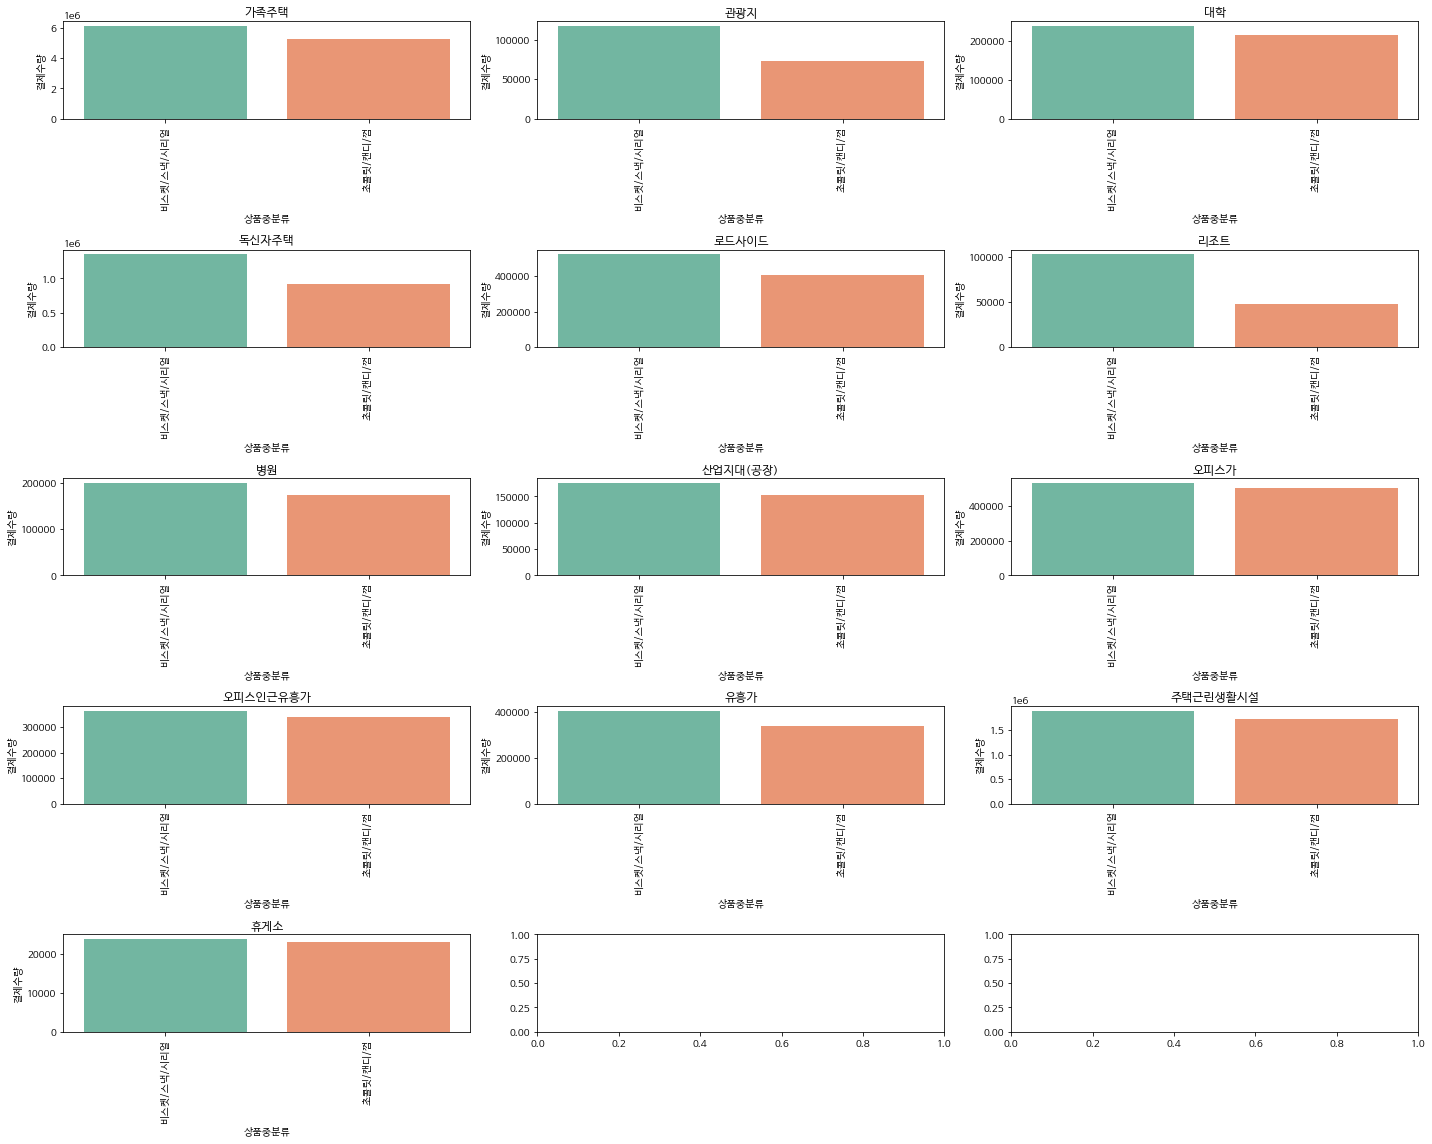

In [16]:
drink_mid_wm(data11_3)

#### 주류 | 여성, 주변입지

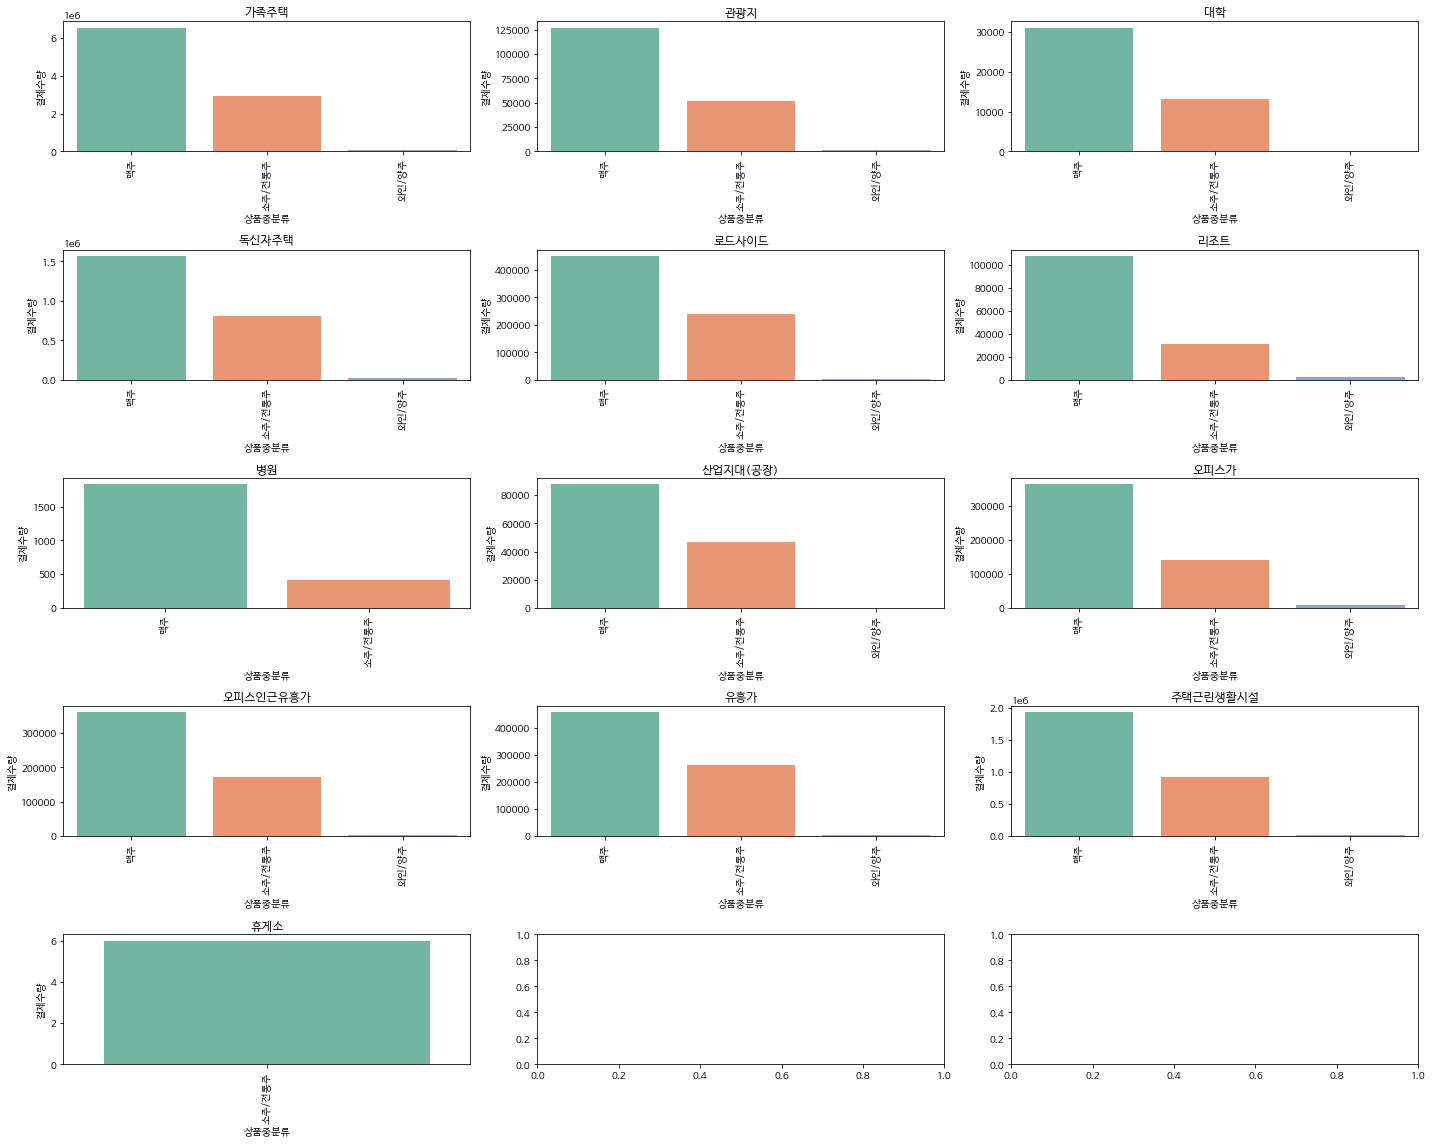

In [17]:
drink_mid_wm(data11_4)

#### 가공식사제품 | 여성, 주변입지

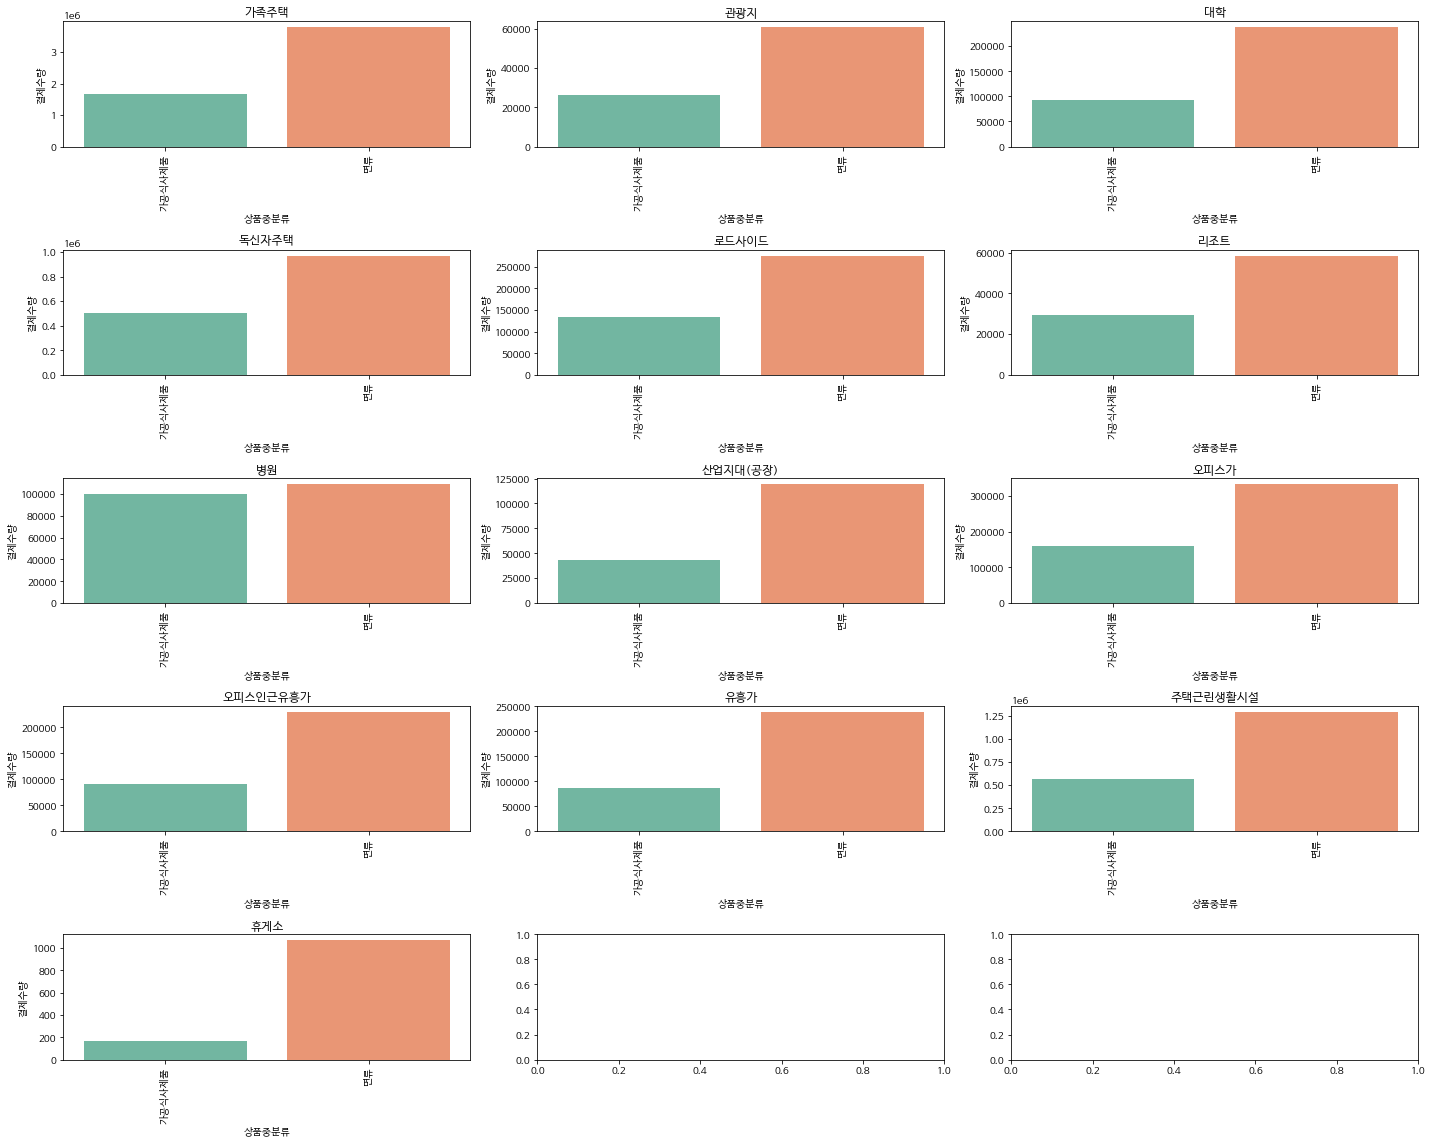

In [18]:
drink_mid_wm(data11_5)

#### [남성 : 가구생애 별 상품 결제수량 분석]

In [9]:
data12_1 = data[data['상품대분류'] == '음료'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_1 = data12_1[data12_1['SEX'] == 1]

data12_2 = data[data['상품대분류'] == '간편식사'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_2 = data12_2[data12_2['SEX'] == 1]

data12_3 = data[data['상품대분류'] == '과자류'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_3 = data12_3[data12_3['SEX'] == 1]

data12_4 = data[data['상품대분류'] == '주류'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_4 = data12_4[data12_4['SEX'] == 1]

data12_5 = data[data['상품대분류'] == '가공식사제품'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_5 = data12_5[data12_5['SEX'] == 1]

def drink_mid_man(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (15,4))
    lctn_name = input_data['가구생애'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['가구생애'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 음료 | 남성, 가구생애

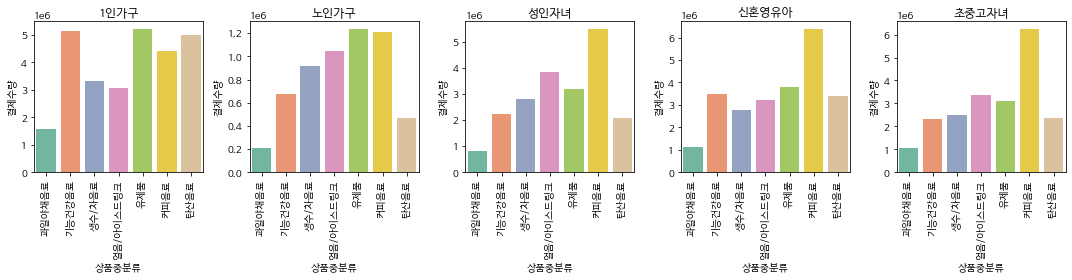

In [10]:
drink_mid_man(data12_1)

* 1인가구에서 기능건강음료가 다른 음료 종류에 비해 빈도가 높은 것이 특징이다.

#### 간편식사 | 남성, 가구생애

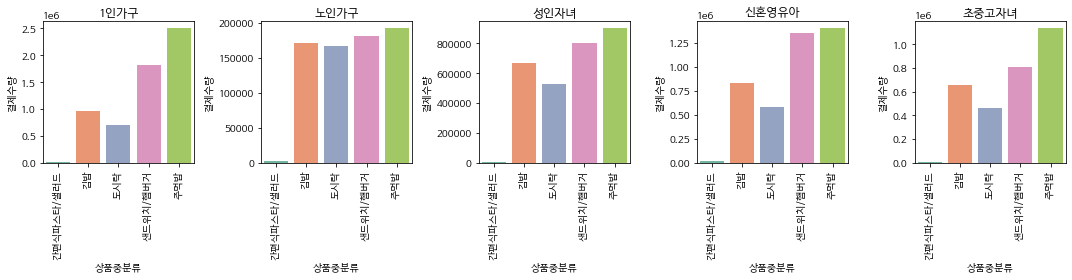

In [11]:
drink_mid_man(data12_2)

* 노인가구에서 간편식 파스타 및 샐러드를 제외한 간편식사 종류에서 비슷한 빈도를 보이는 것이 특징이다.

#### 과자류 | 남성, 가구생애

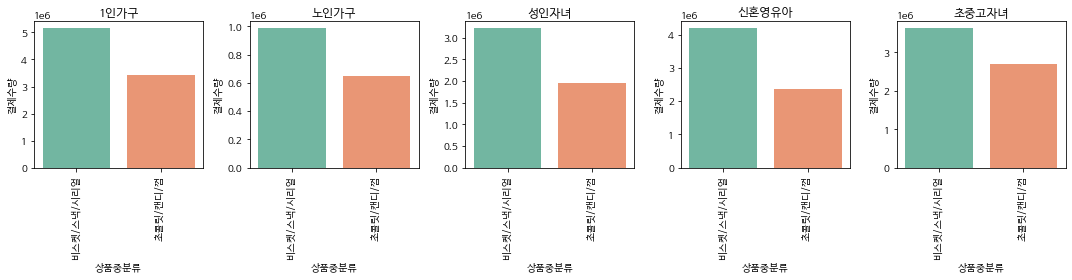

In [12]:
drink_mid_man(data12_3)

#### 주류 | 남성, 가구생애

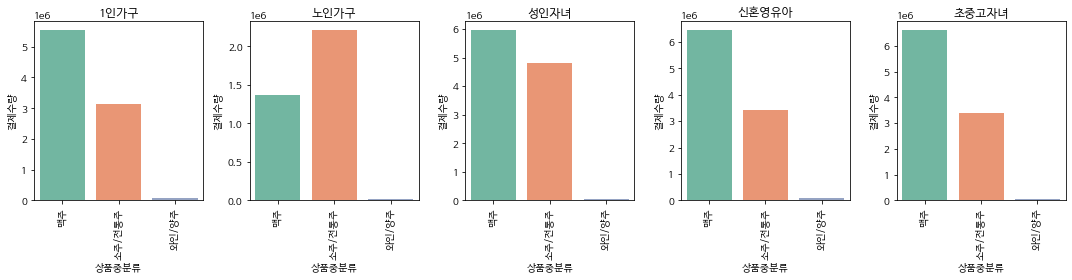

In [13]:
drink_mid_man(data12_4)

#### 가공식사제품 | 남성, 가구생애

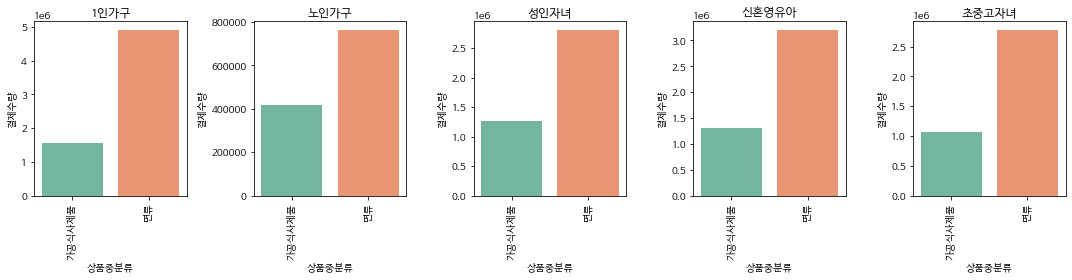

In [14]:
drink_mid_man(data12_5)

#### [여성 : 가구생애별 상품 결제수량 분석]

In [22]:
data12_11 = data[data['상품대분류'] == '음료'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_11 = data12_11[data12_11['SEX'] == 2]

data12_21 = data[data['상품대분류'] == '간편식사'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_21 = data12_21[data12_21['SEX'] == 2]

data12_31 = data[data['상품대분류'] == '과자류'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_31 = data12_31[data12_31['SEX'] == 2]

data12_41 = data[data['상품대분류'] == '주류'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_41 = data12_41[data12_41['SEX'] == 2]

data12_51 = data[data['상품대분류'] == '가공식사제품'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
data12_51 = data12_51[data12_51['SEX'] == 2]

def drink_mid_wm(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (15,4))
    lctn_name = input_data['가구생애'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['가구생애'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 음료 | 여성, 가구생애

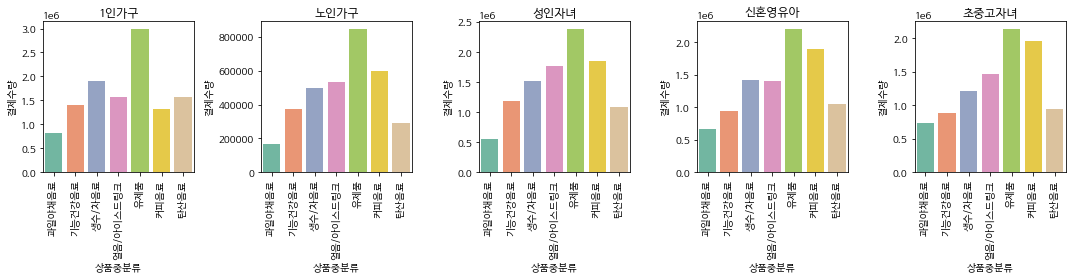

In [16]:
drink_mid_wm(data12_11)

* 1인가구는 다른 가구생애 형태의 분포와 달리 유제품 다음으로 커피음료가 아닌 생수/차음료가 가장 많은 빈도를 차지한다. 

#### 간편식사 | 여성, 가구생애

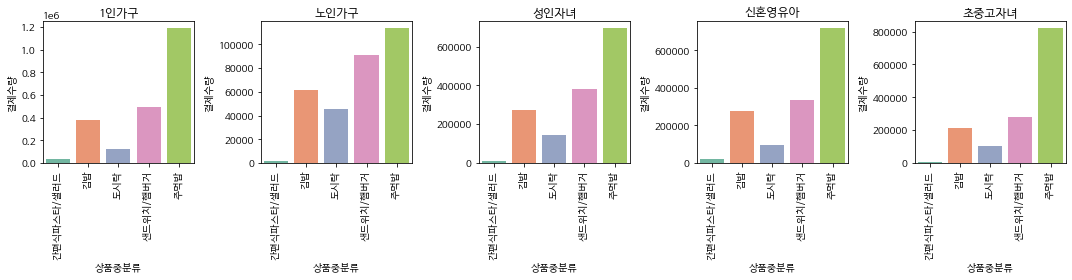

In [17]:
drink_mid_wm(data12_21)

#### 과자류 | 여성, 가구생애

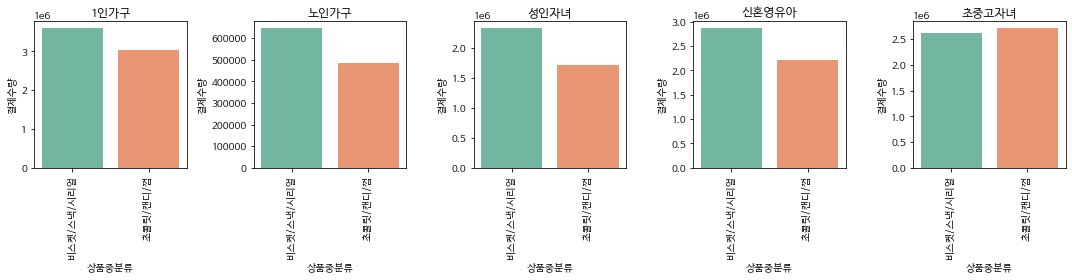

In [18]:
drink_mid_wm(data12_31)

#### 주류 | 여성, 가구생애

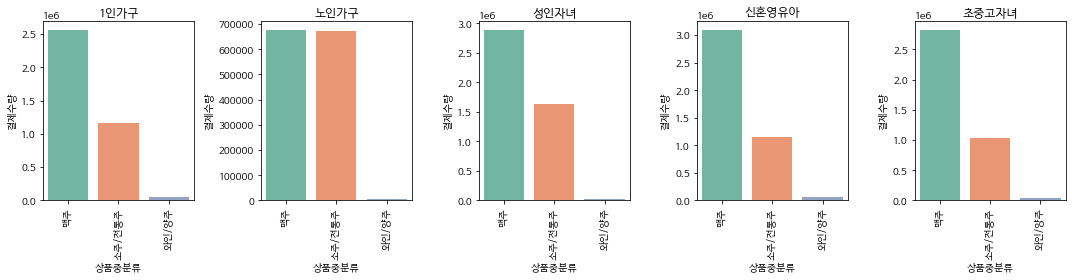

In [23]:
drink_mid_wm(data12_41)

* 노인가구인 경우 맥주와 소주/전통주를 비슷한 빈도로 찾는 것이 특징이다.

#### 가공식사제품 | 여성, 가구생애

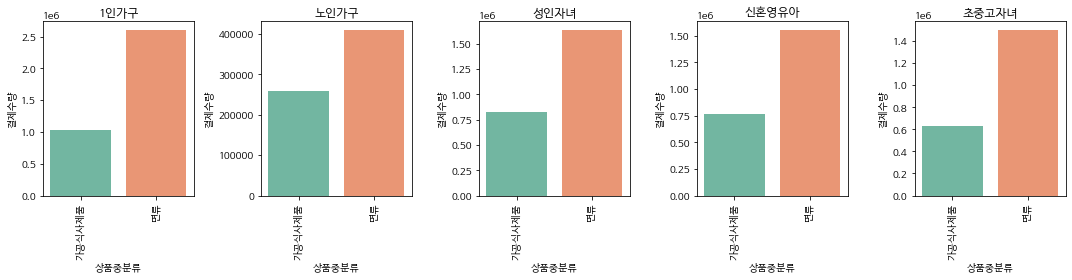

In [24]:
drink_mid_wm(data12_51)

#### [성별에 따른 가구생애별 상품 결제수량 분석2 : Pie Chart]

In [125]:
#### 전체 품목 ####
temp_all = data.groupby(['SEX','가구생애','상품중분류']).agg({'결제수량' : 'sum'}).reset_index()
temp_drink = data[data['상품대분류'] == '음료'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index()
temp_food = data[data['상품대분류'] == '간편식사'].groupby(['SEX','가구생애','상품중분류'])['결제수량'].sum().reset_index() 

In [127]:
def pie_mid(input_data) :
    for i in [1,2] : 
    
        for j in data.가구생애.unique() : 
                
            k = input_data[(input_data['SEX'] == i) & (input_data['가구생애'] ==j)][['상품중분류','결제수량']].set_index('상품중분류').sort_values(by='결제수량', ascending = False)
        
            fig = plt.figure(figsize = (5,5)) 
            ax = fig.add_subplot() 
            #exp = [0.05, 0, 0, 0, 0, 0, 0, 0]

            ax.pie(k['결제수량'], labels = k.index, autopct = '%.1f%%') #,explode = exp
            plt.title(f'{i} 성별 : {j} 상위 8개 구매 품목')
            plt.show()

#### 음료 | 성별에 따른 가구생애별 상품 결제수량

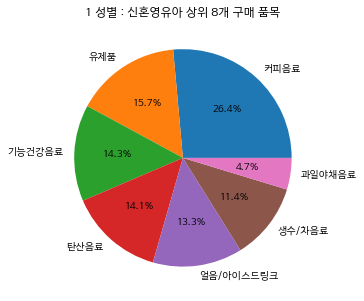

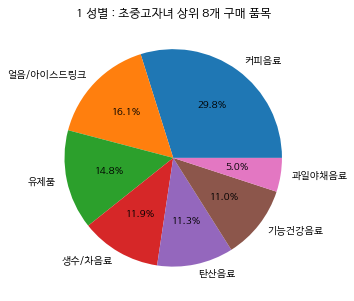

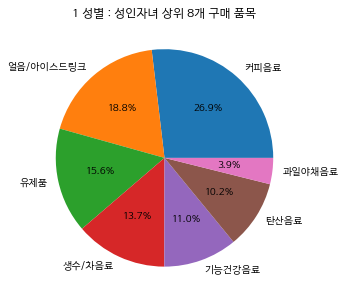

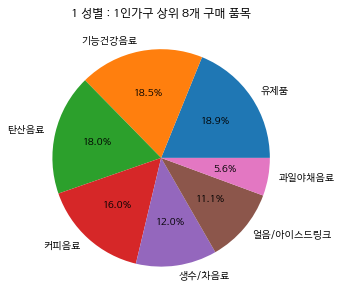

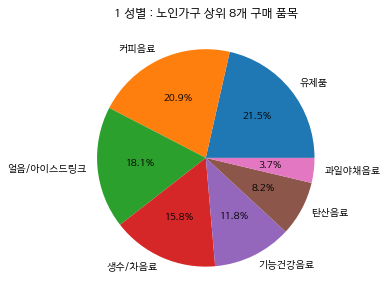

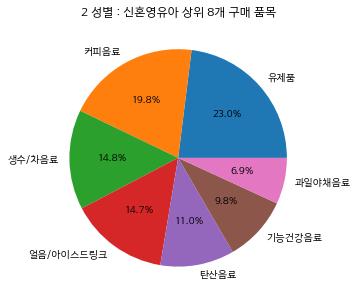

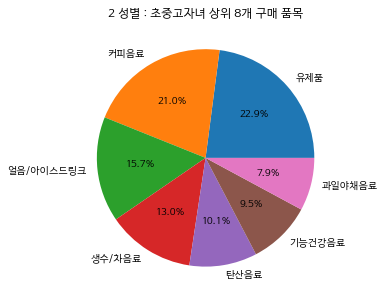

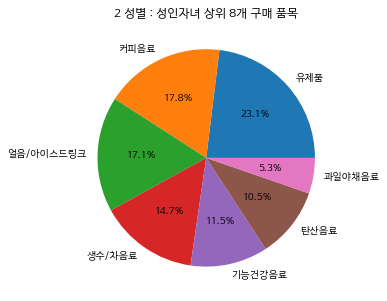

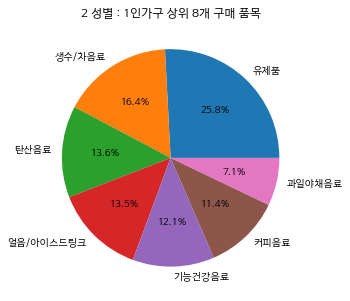

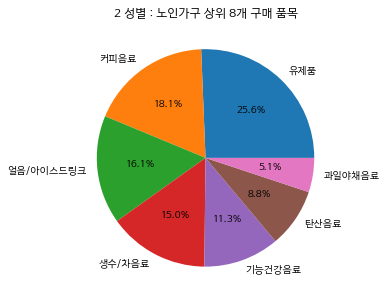

In [129]:
pie_mid(temp_drink)

#### 간편식사 | 성별에 따른 가구생애별 상품 결제수량

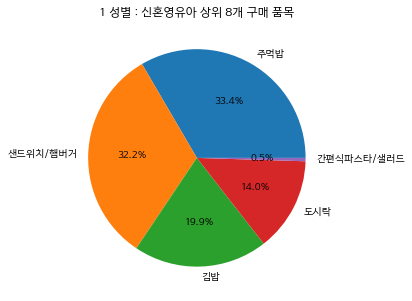

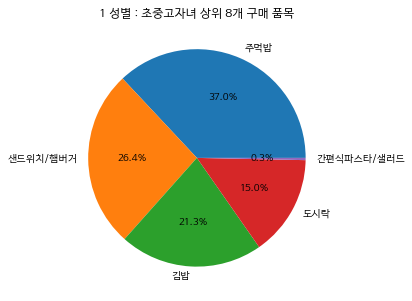

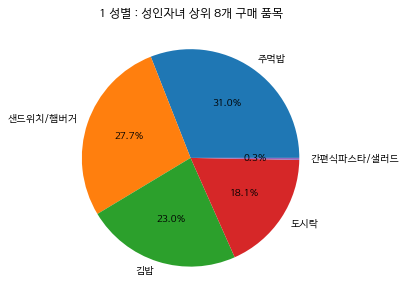

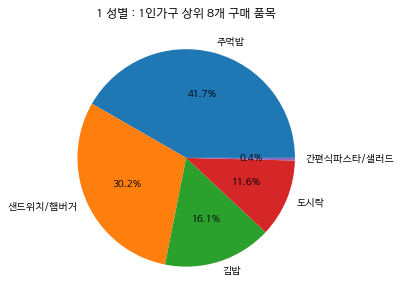

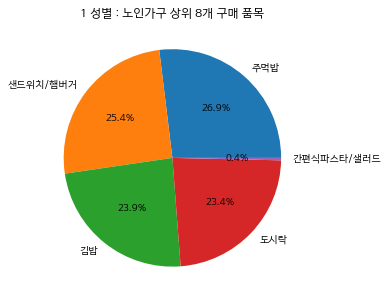

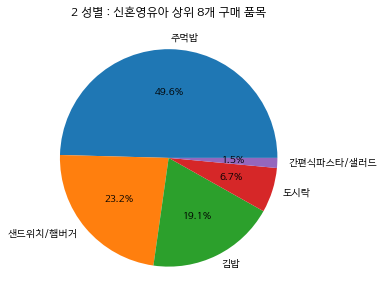

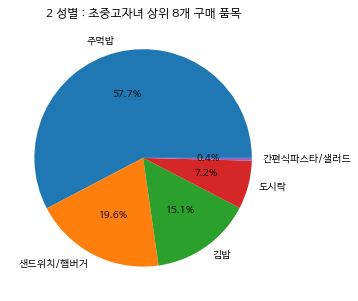

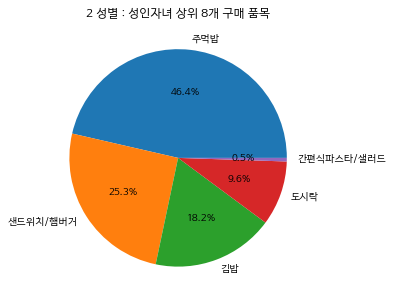

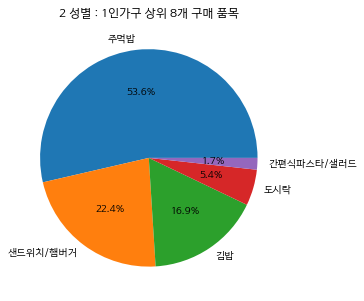

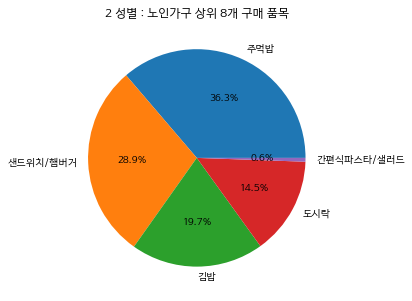

In [128]:
pie_mid(temp_food)

#### [남성 : 결제시간별 상품 결제수량]

In [25]:
data13_1 = data[data['상품대분류'] == '음료'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data13_1 = data13_1[data13_1['SEX'] == 1]

data13_2 = data[data['상품대분류'] == '간편식사'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data13_2 = data13_2[data13_2['SEX'] == 1]

data13_3 = data[data['상품대분류'] == '과자류'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data13_3 = data13_3[data13_3['SEX'] == 1]

data13_4 = data[data['상품대분류'] == '주류'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data13_4 = data13_4[data13_4['SEX'] == 1]

data13_5 = data[data['상품대분류'] == '가공식사제품'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data13_5 = data13_5[data13_5['SEX'] == 1]

def time_mid_man(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (15,4))
    lctn_name = input_data['결제시간'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['결제시간'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 음료|남성, 결제시간

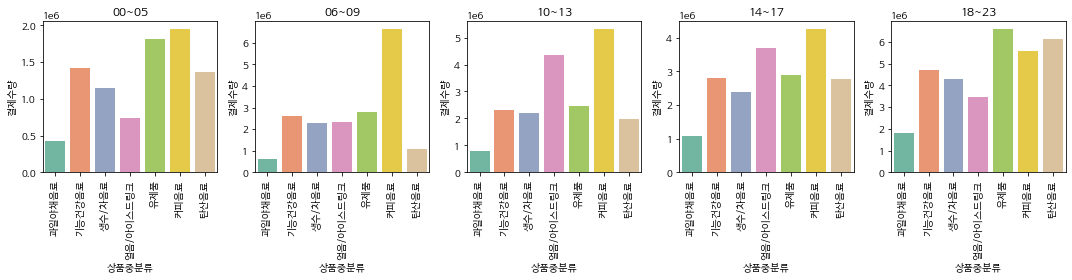

In [26]:
time_mid_man(data13_1)

* 유제품을 주로 저녁~새벽에 더 많이 구매하는 특징을 보인다.

#### 간편식사|남성, 결제시간

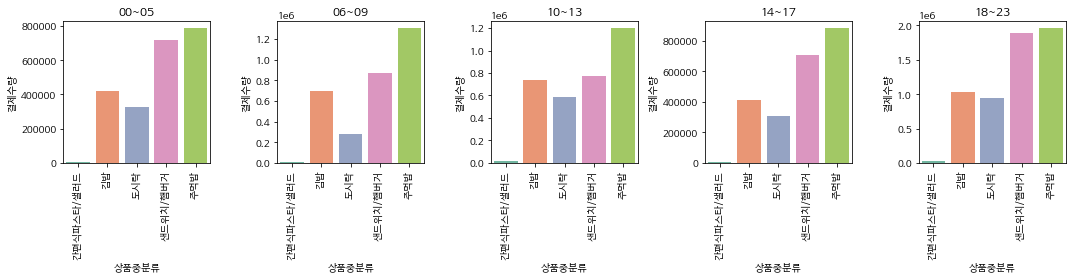

In [27]:
time_mid_man(data13_2)

#### 과자류|남성, 결제시간

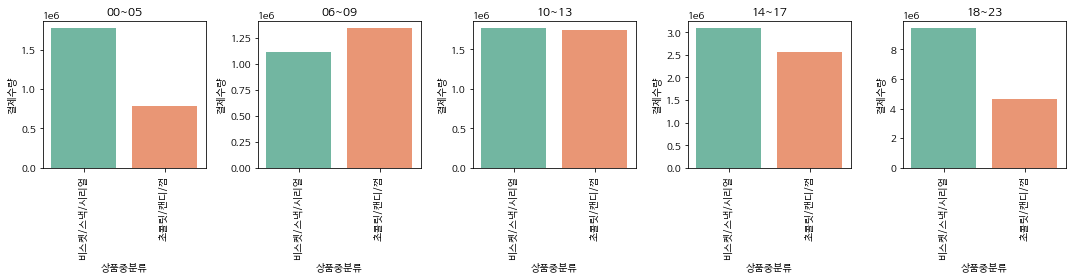

In [28]:
time_mid_man(data13_3)

#### 주류|남성, 결제시간

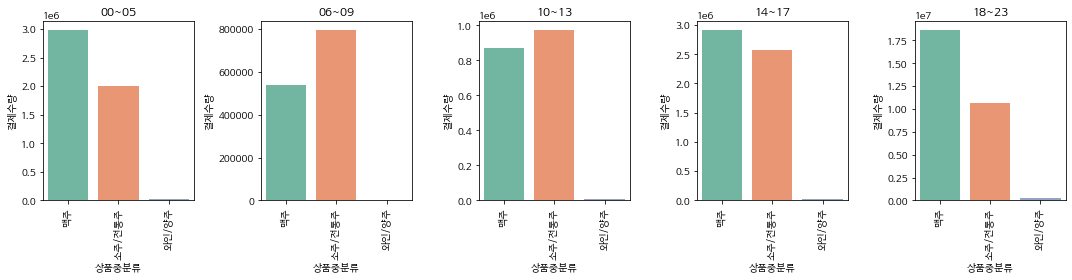

In [29]:
time_mid_man(data13_4)

* 오전시간대 주로 맥주보다 소주/전통주를 더 많이 구매하는 특징을 보인다.

#### 가공식사제품|남성, 결제시간

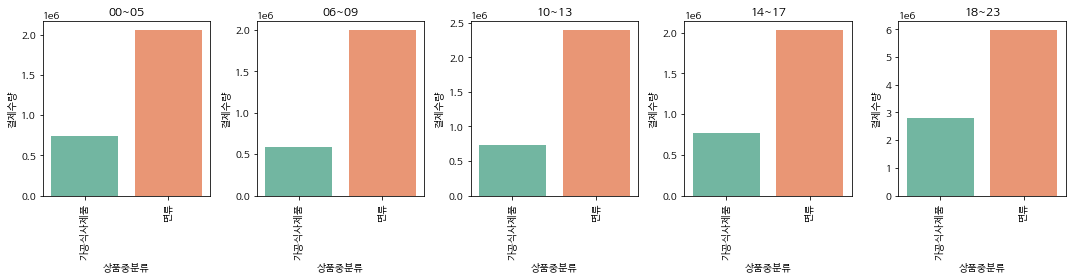

In [30]:
time_mid_man(data13_5)

#### [여성 : 결제시간대별 상품 결제수량 분석]

In [65]:
# 여성 _ 결제시간별 상품중분류별 결제수량
data14_1 = data[data['상품대분류'] == '음료'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data14_1 = data14_1[data14_1['SEX'] == 2]

data14_2 = data[data['상품대분류'] == '간편식사'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data14_2 = data14_2[data14_2['SEX'] == 2]

data14_3 = data[data['상품대분류'] == '과자류'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data14_3 = data14_3[data14_3['SEX'] == 2]

data14_4 = data[data['상품대분류'] == '주류'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data14_4 = data14_4[data14_4['SEX'] == 2]

data14_5 = data[data['상품대분류'] == '가공식사제품'].groupby(['SEX','결제시간','상품중분류'])['결제수량'].sum().reset_index()
data14_5 = data14_5[data14_5['SEX'] == 2]

def time_mid_wm(input_data) :
    fig,ax = plt.subplots(nrows=1, ncols=5, figsize = (15,4))
    lctn_name = input_data['결제시간'].unique()
    
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품중분류', y = '결제수량',data = input_data[input_data['결제시간'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### 음료|여성, 결제시간

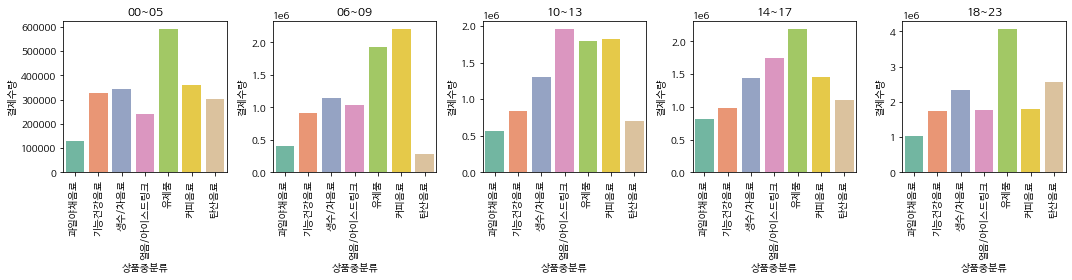

In [33]:
time_mid_wm(data14_1)

* 점심시간대에 얼음/아이스드링크 구매 빈도가 다른 종류보다 높아짐을 확인해볼 수 있따.

#### 간편식사|여성, 결제시간

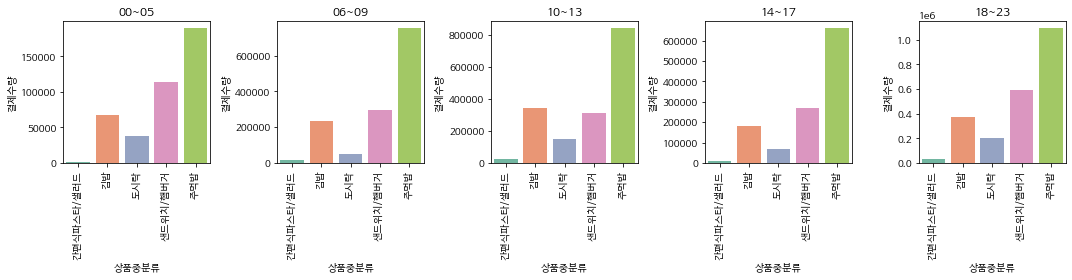

In [34]:
time_mid_wm(data14_2)

#### 과자류|여성, 결제시간

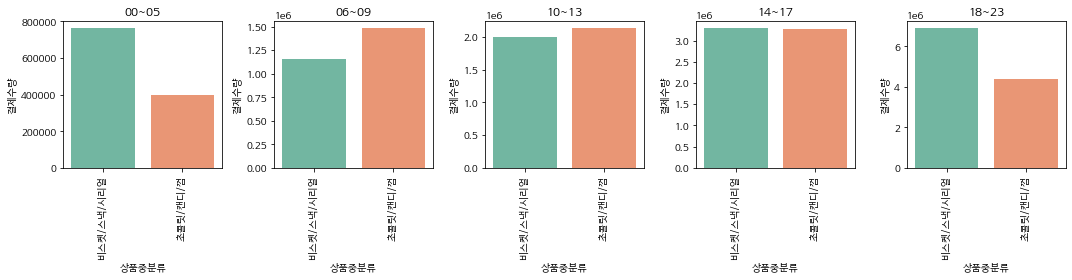

In [66]:
time_mid_wm(data14_3)

#### 주류|여성, 결제시간

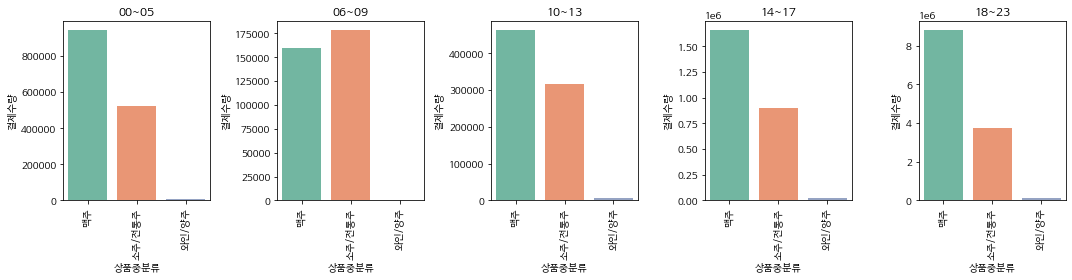

In [36]:
time_mid_wm(data14_4)

* 대부분의 시간대에서 맥주가 소주/전통주보다 높은 구매비율을 보인다.

#### 가공식사제품|여성, 결제시간

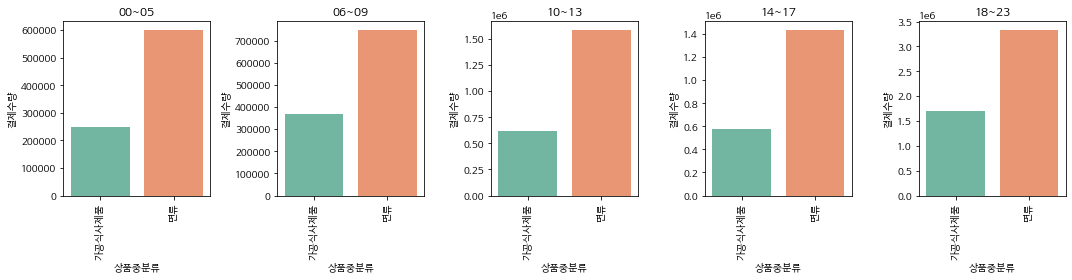

In [42]:
time_mid_wm(data14_5)

#### [ 상위 8개 구매 품목|주변입지, 연령대 ]

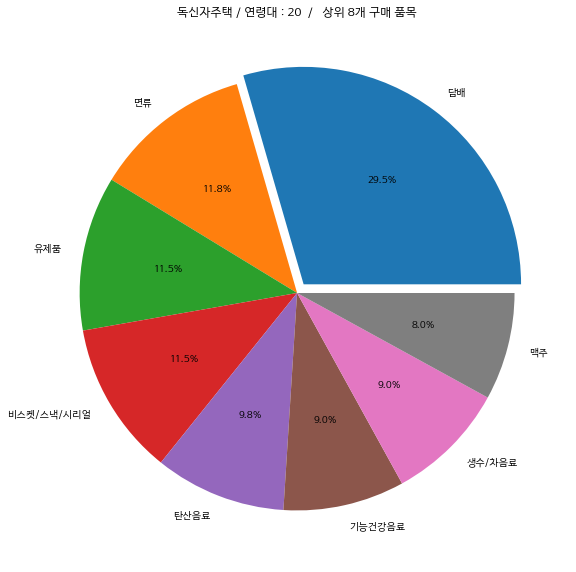

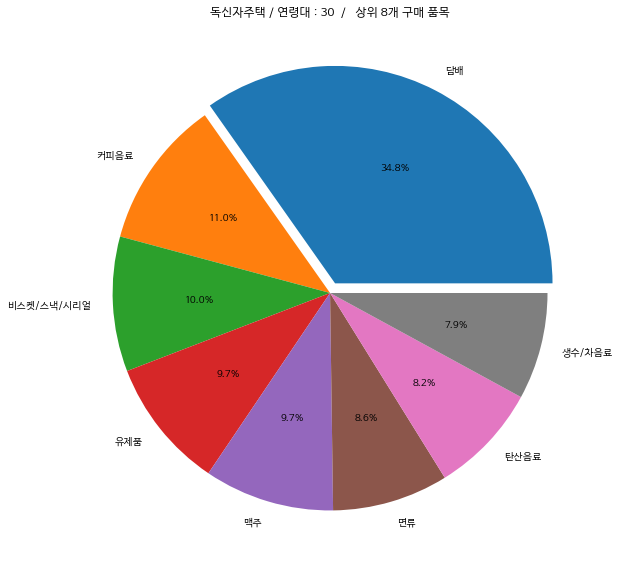

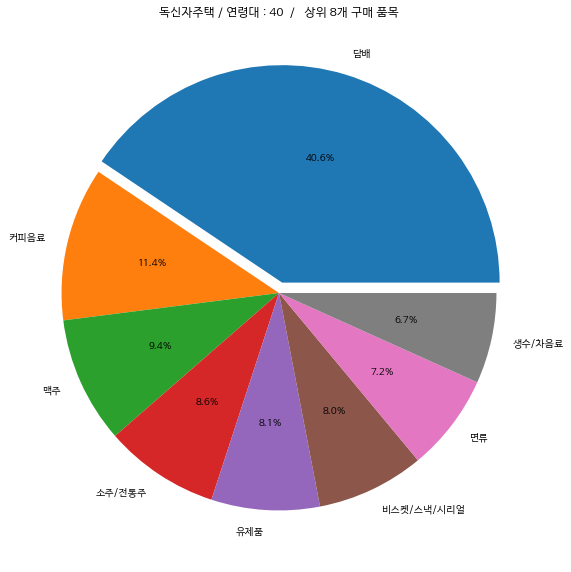

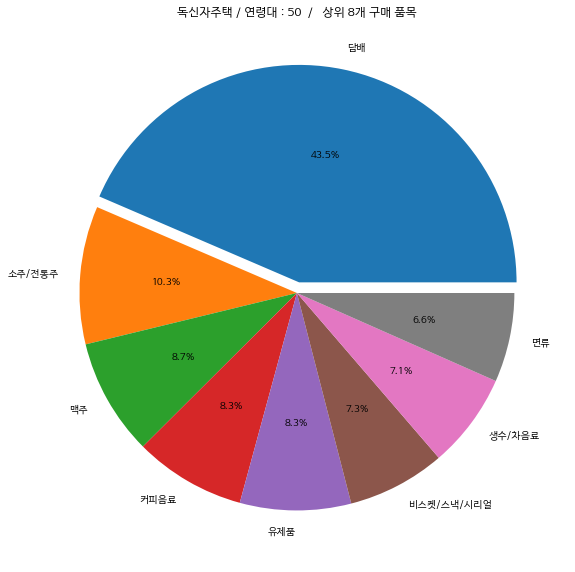

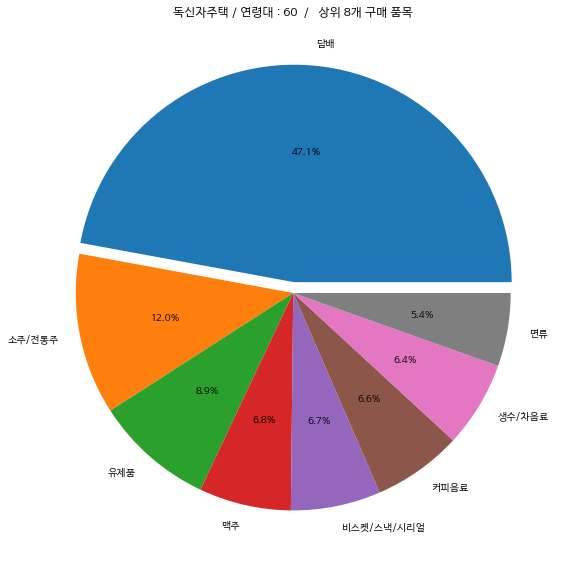

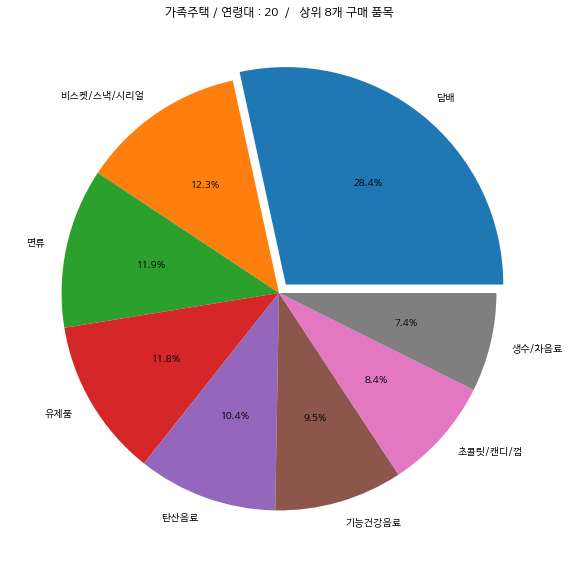

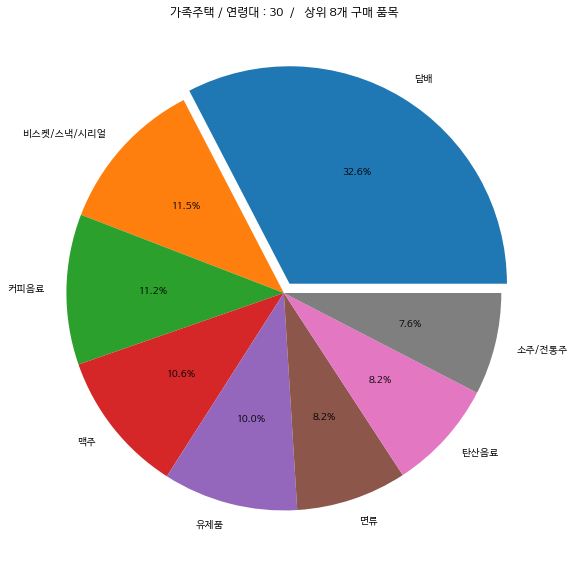

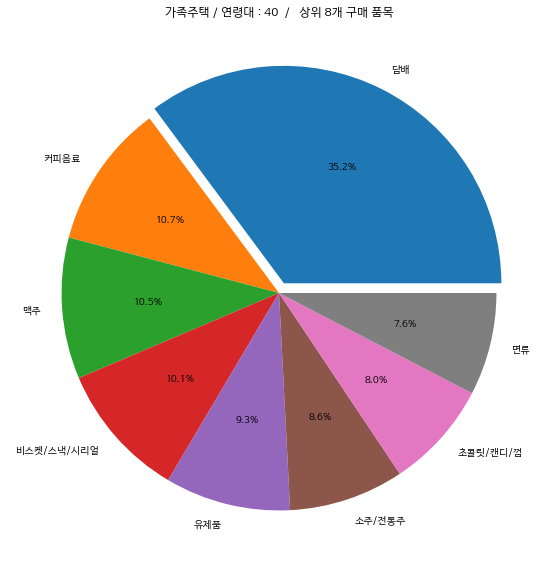

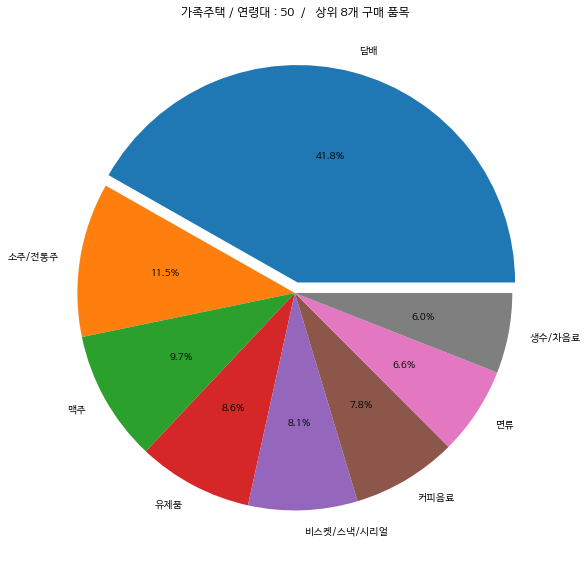

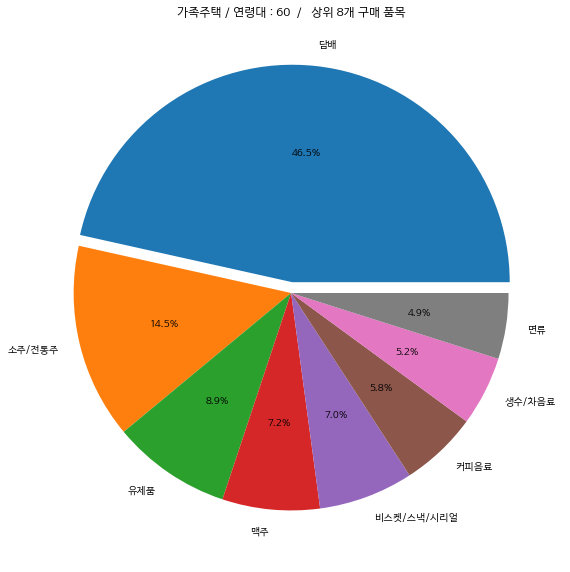

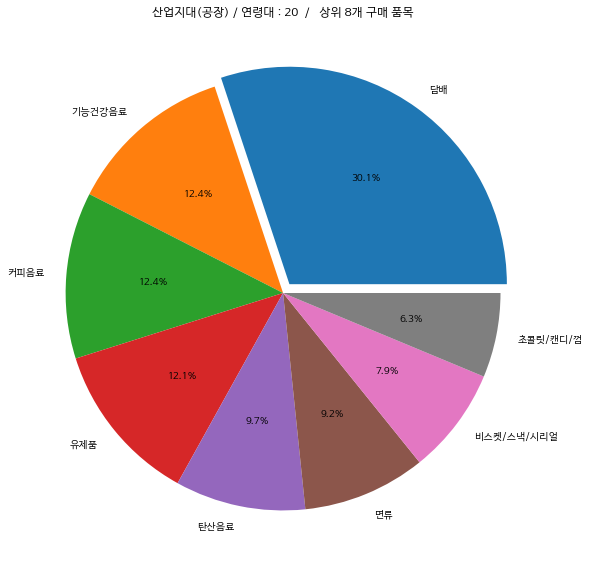

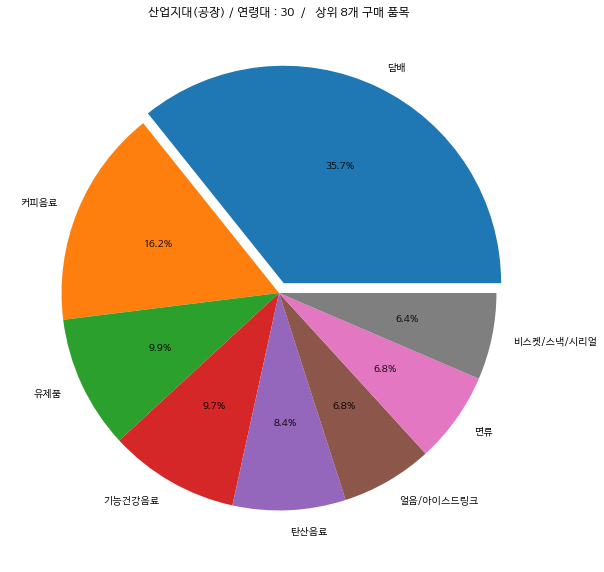

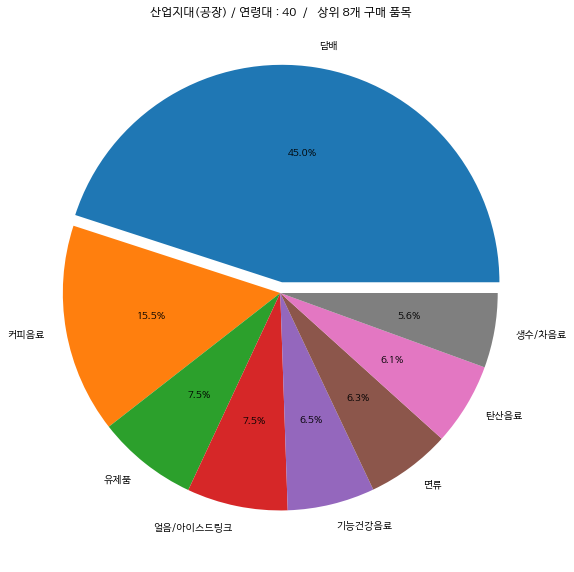

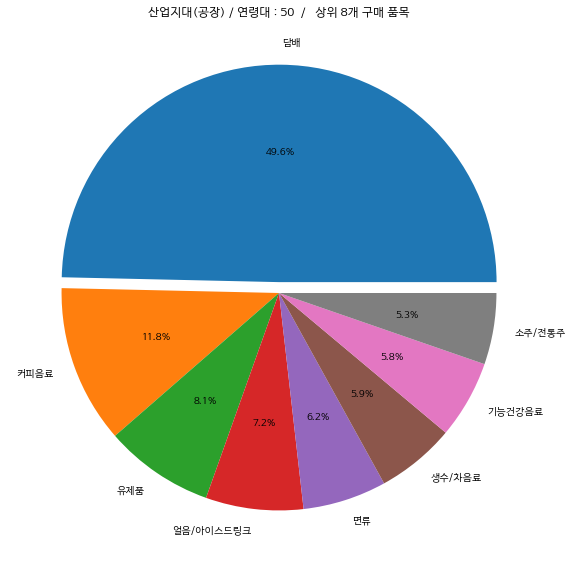

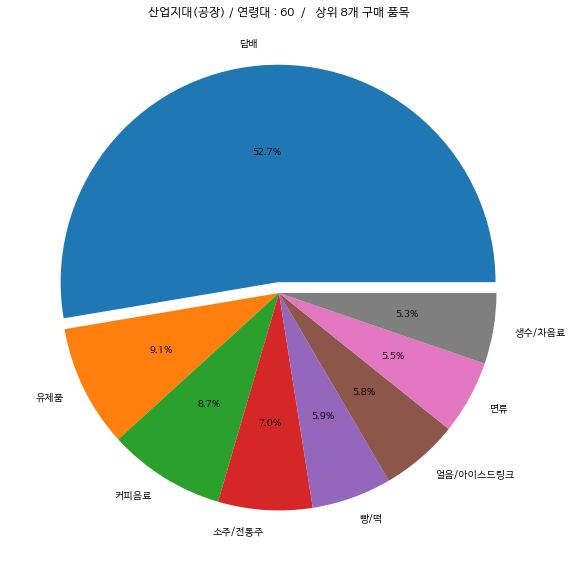

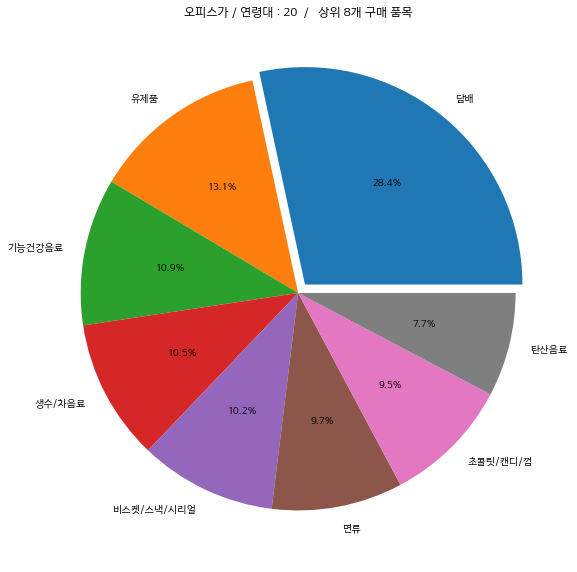

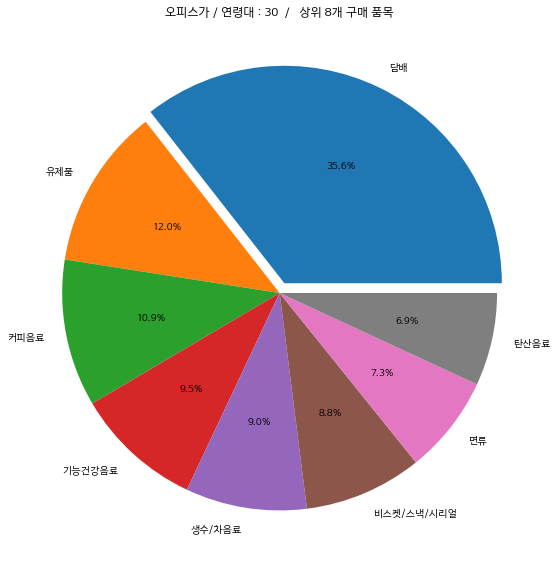

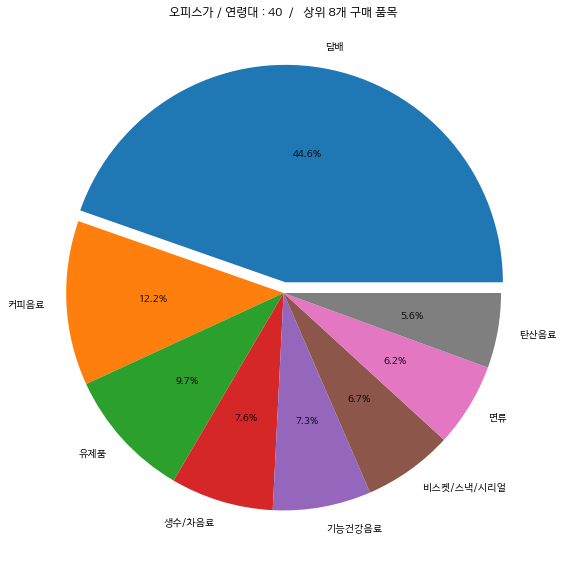

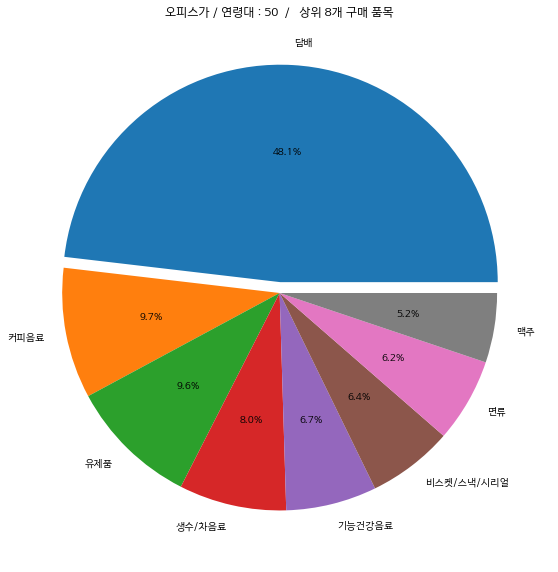

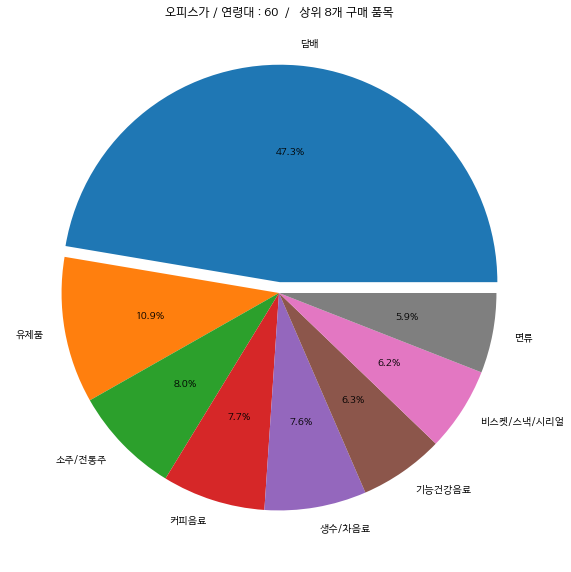

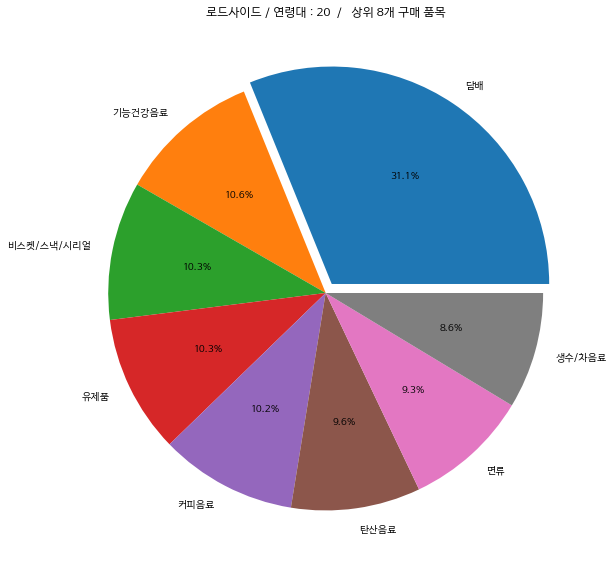

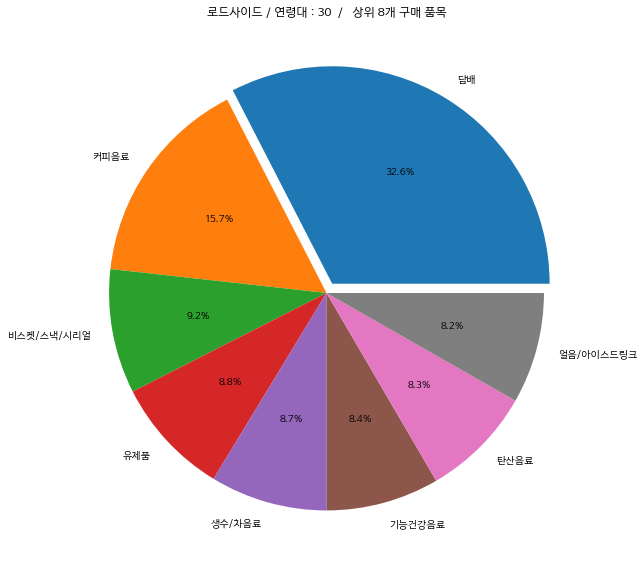

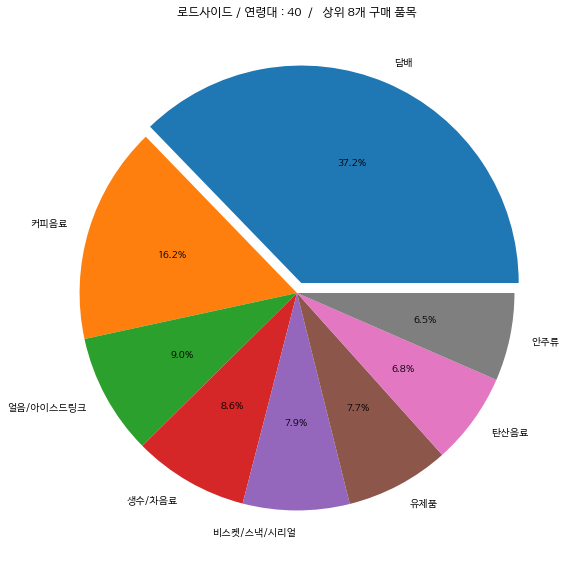

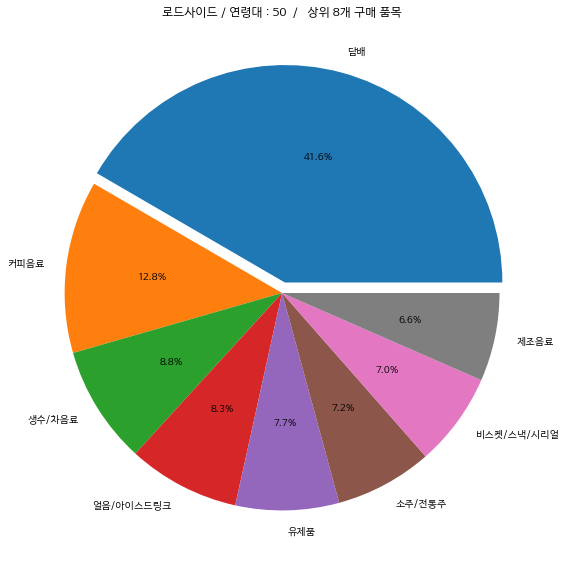

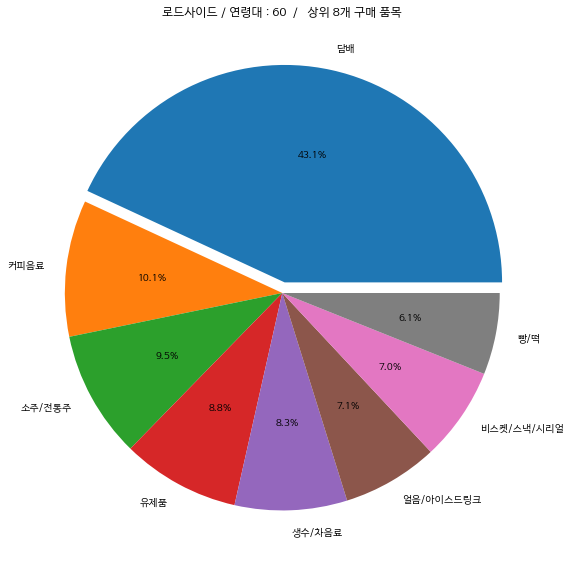

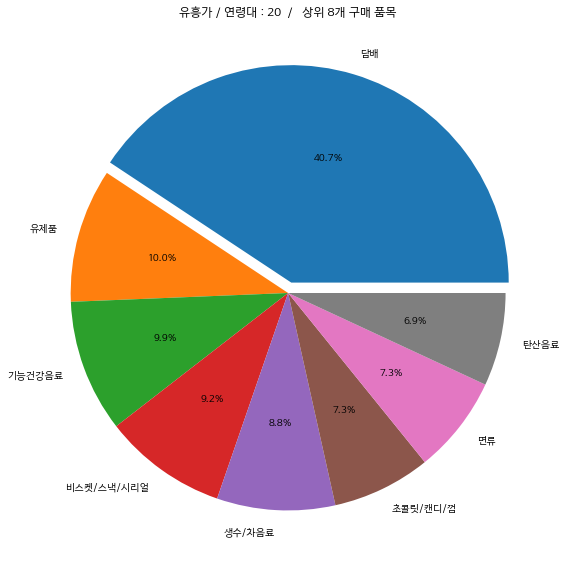

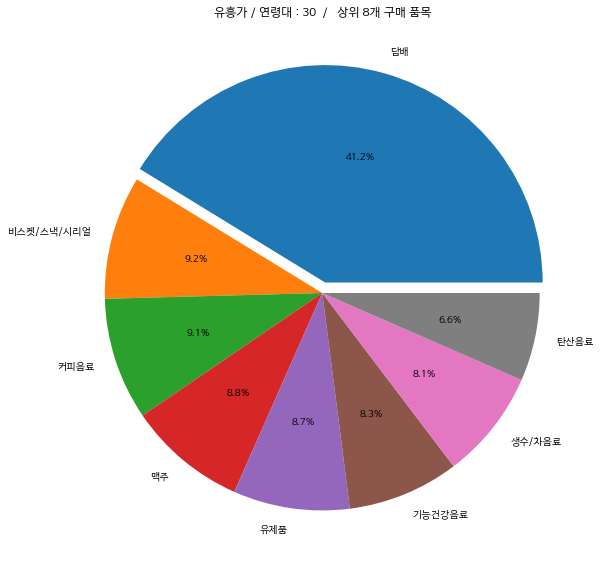

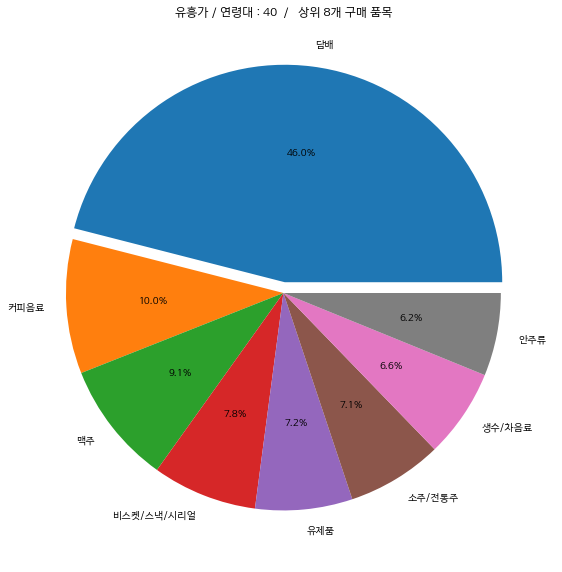

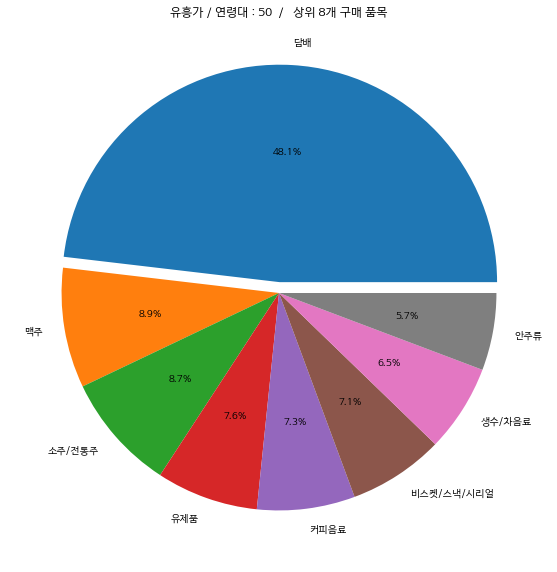

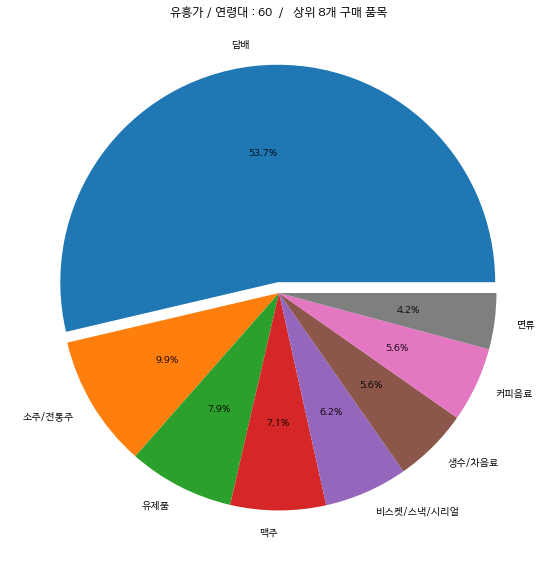

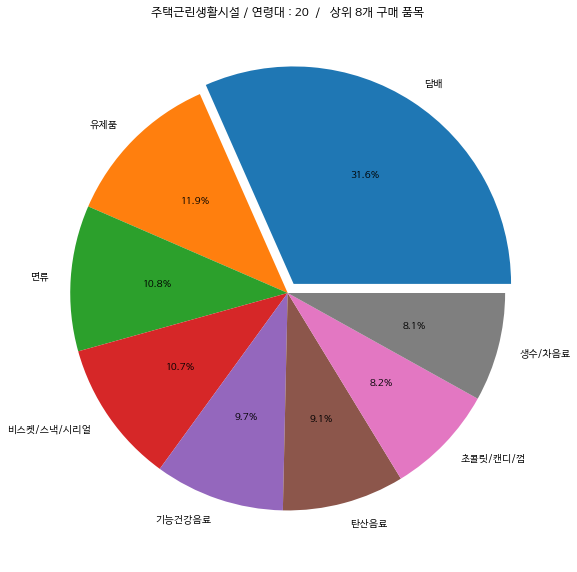

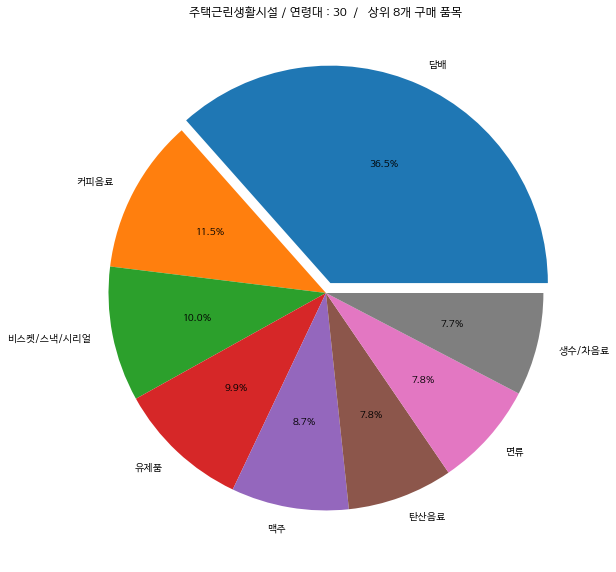

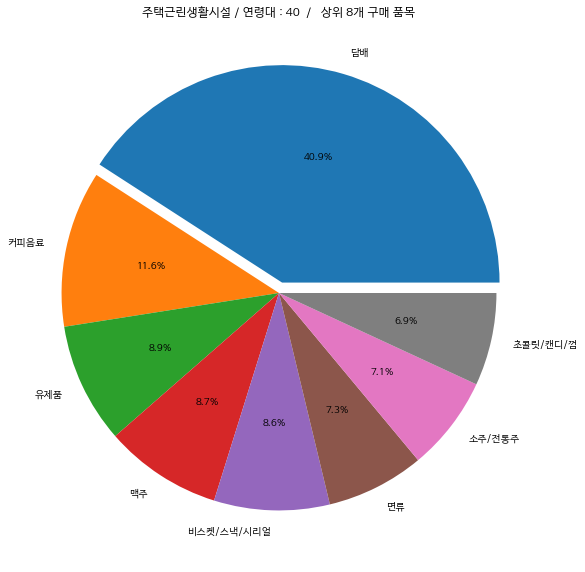

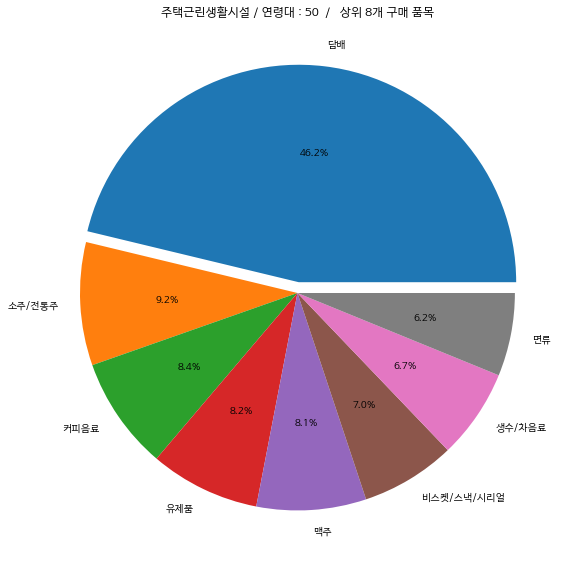

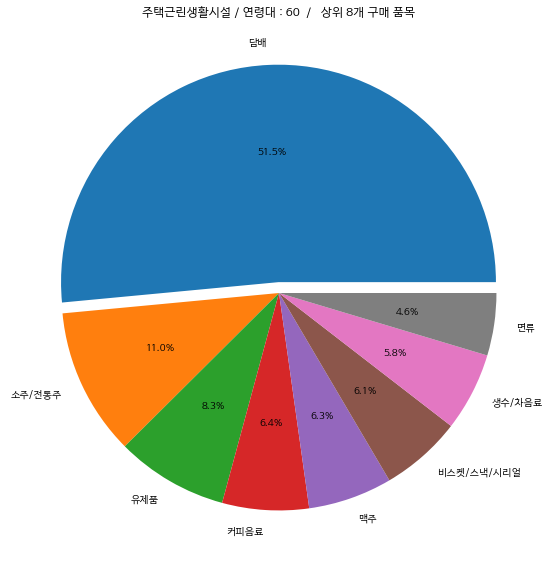

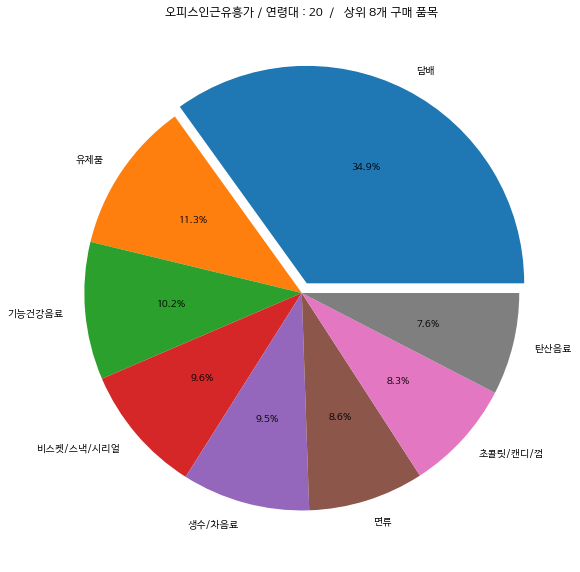

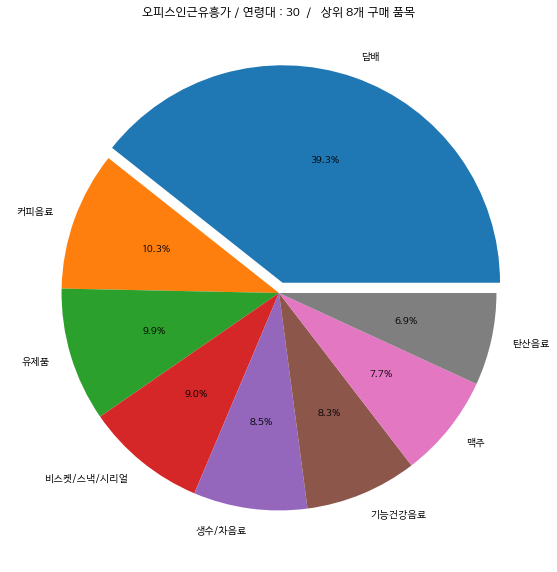

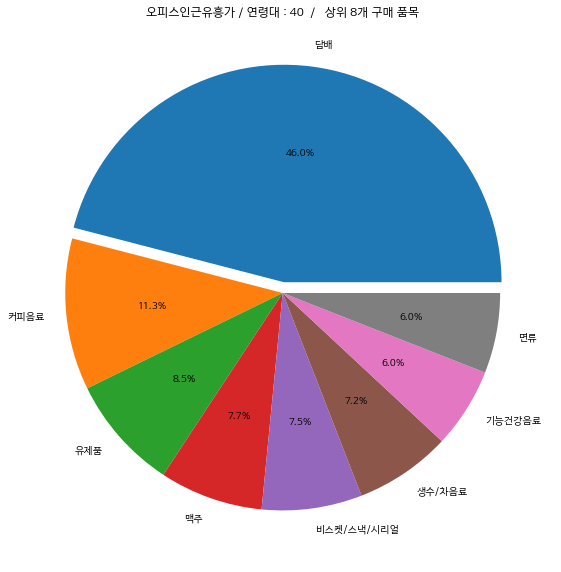

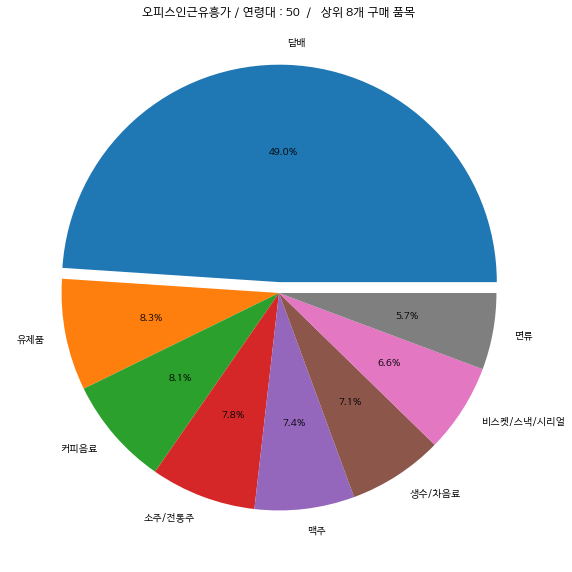

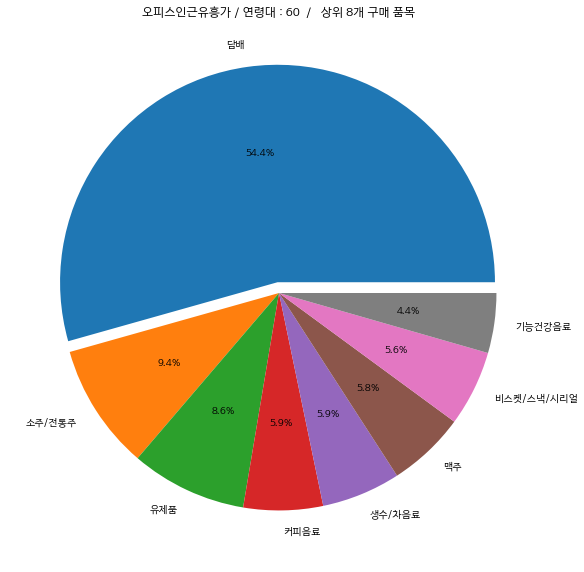

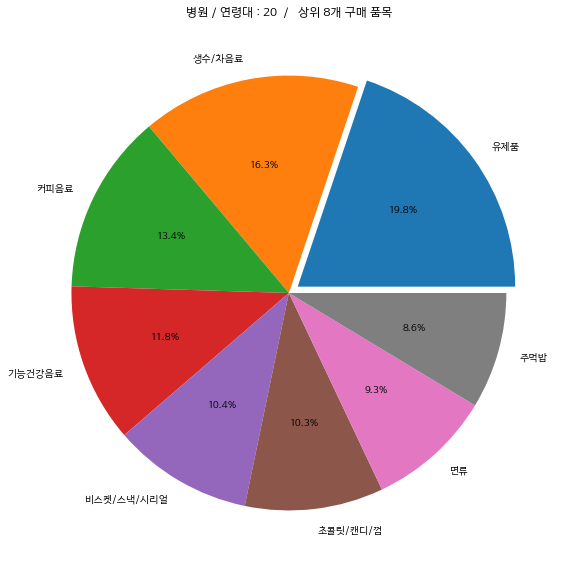

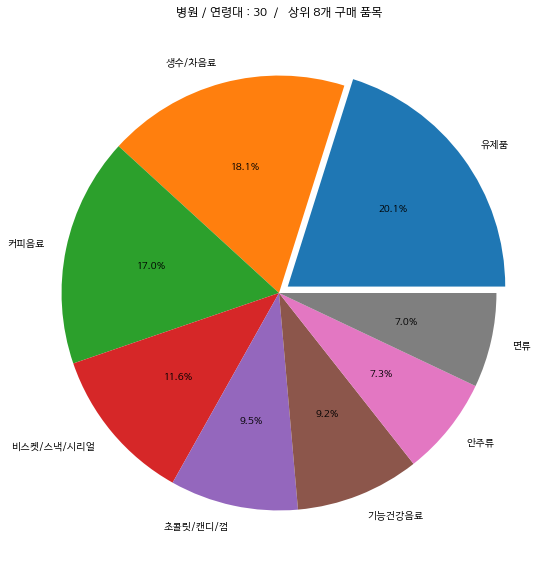

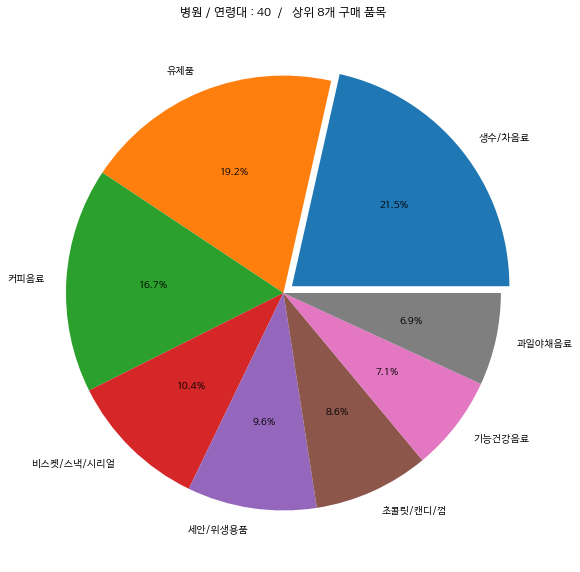

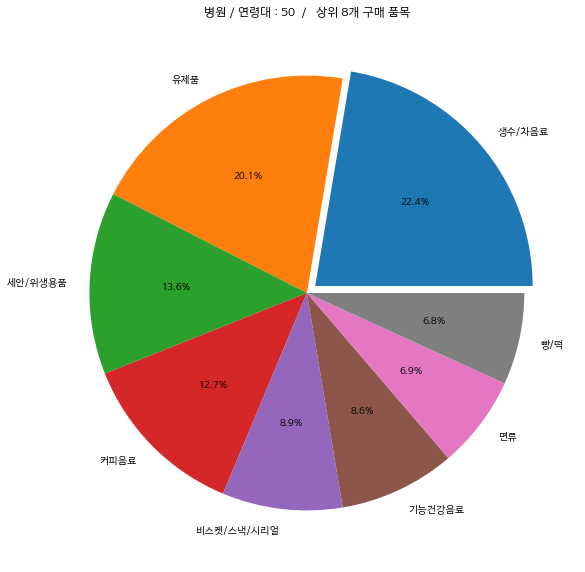

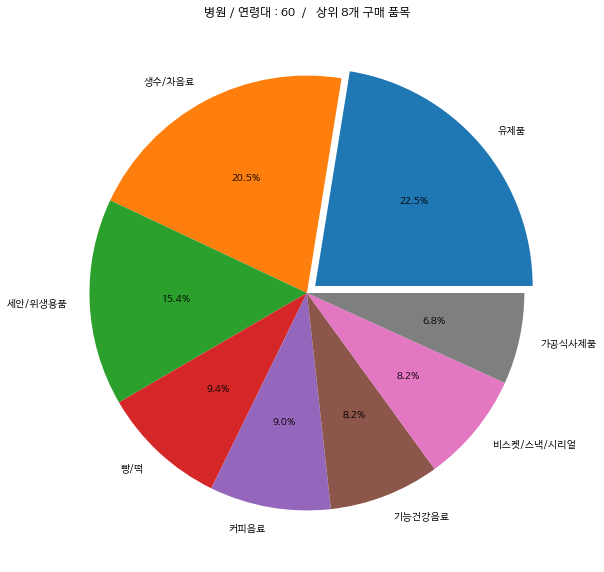

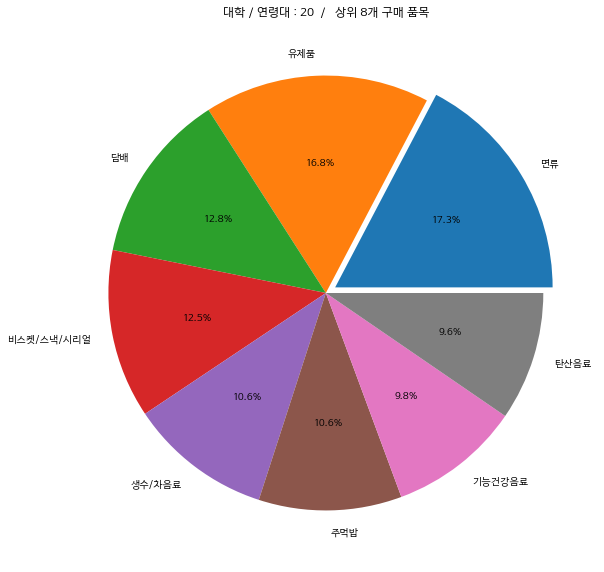

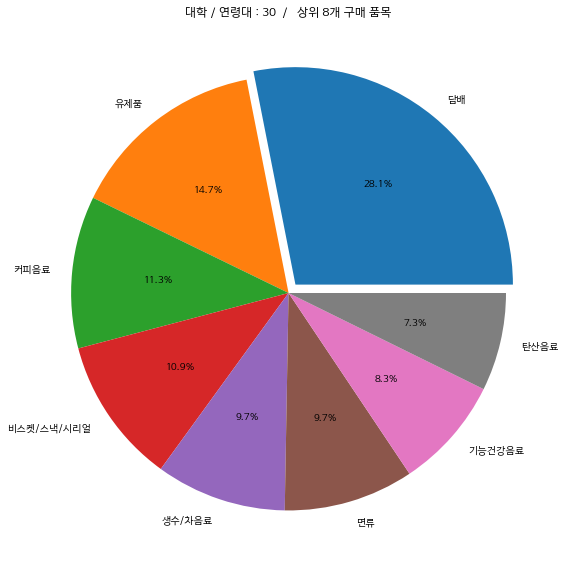

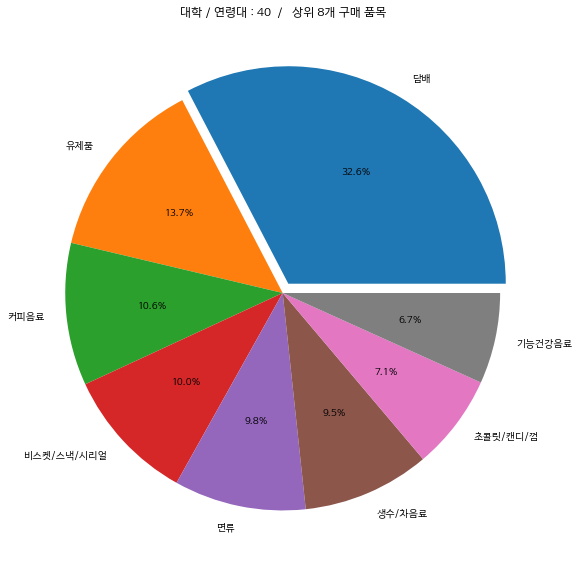

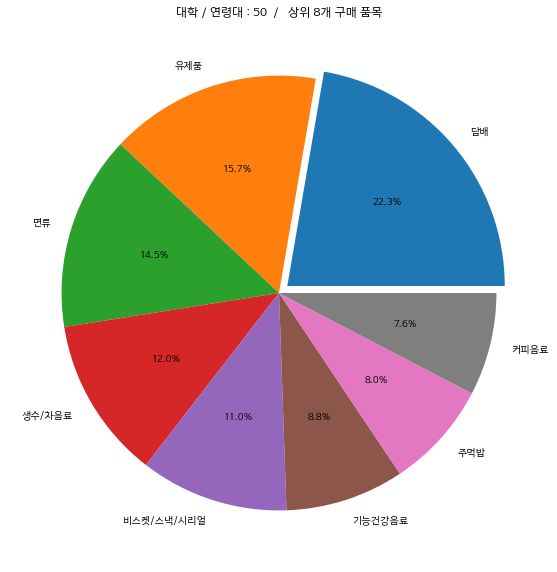

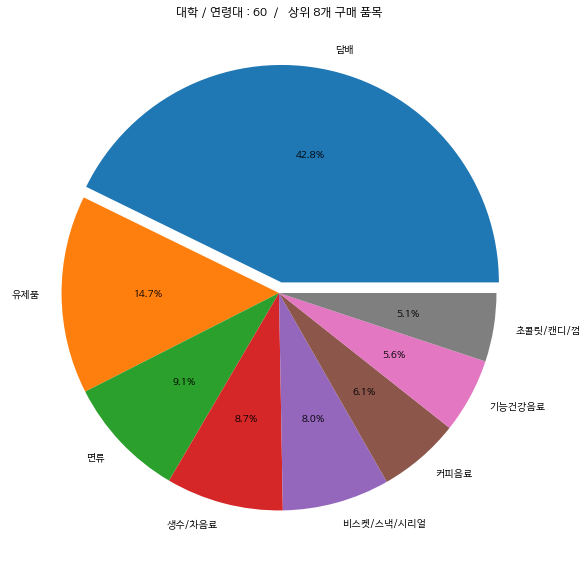

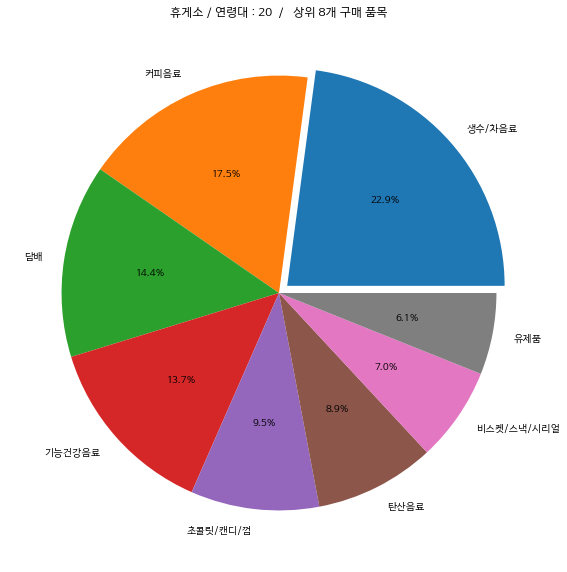

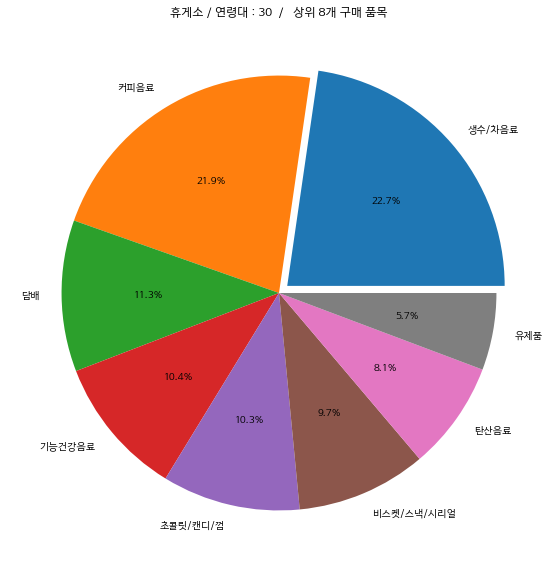

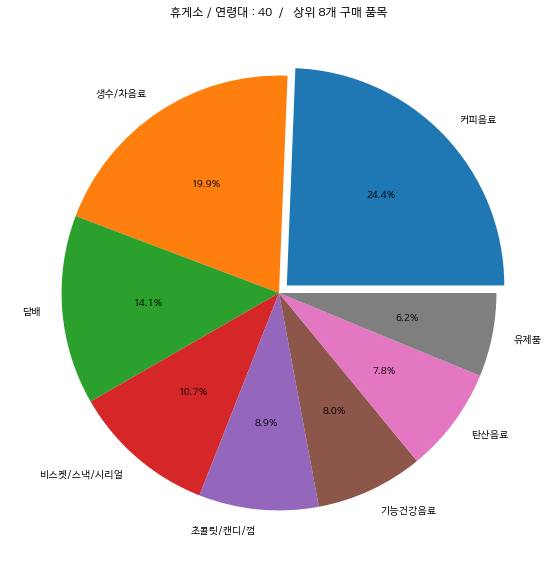

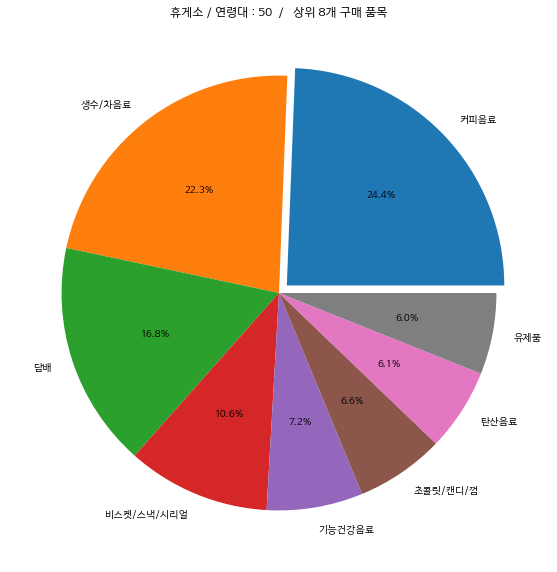

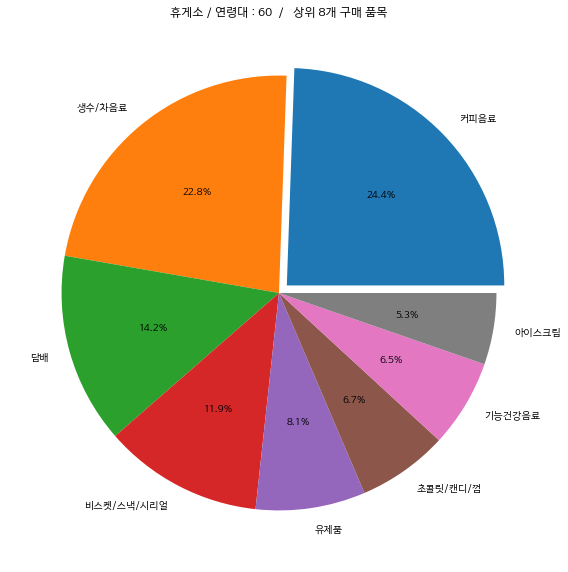

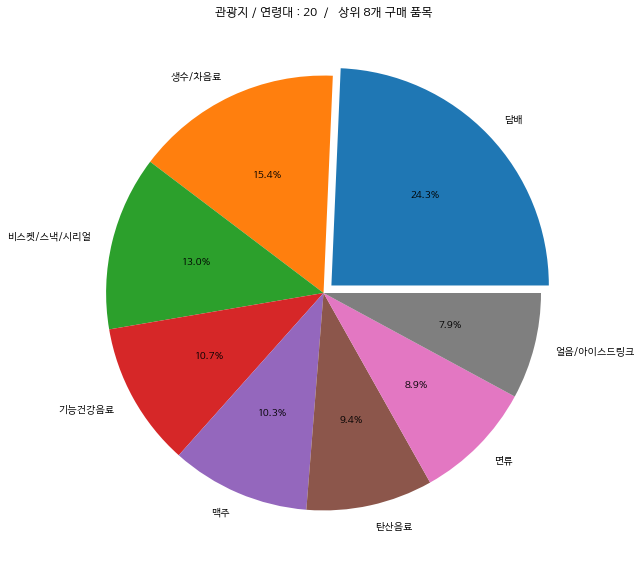

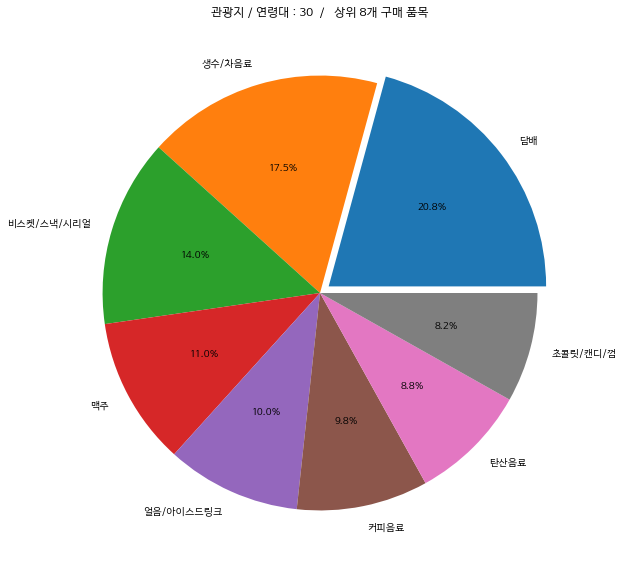

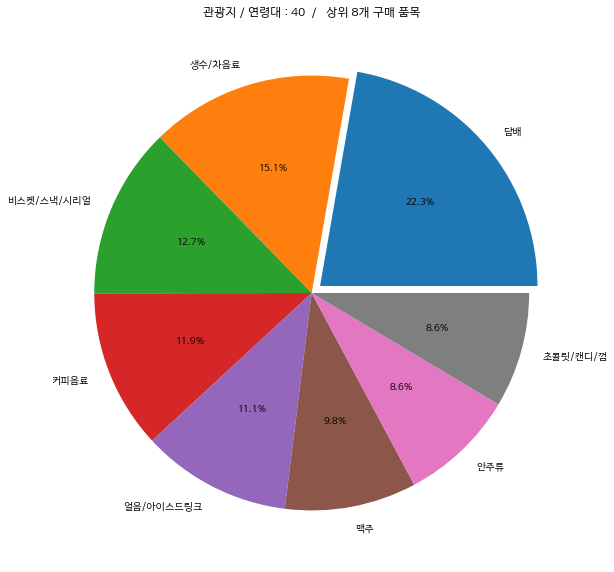

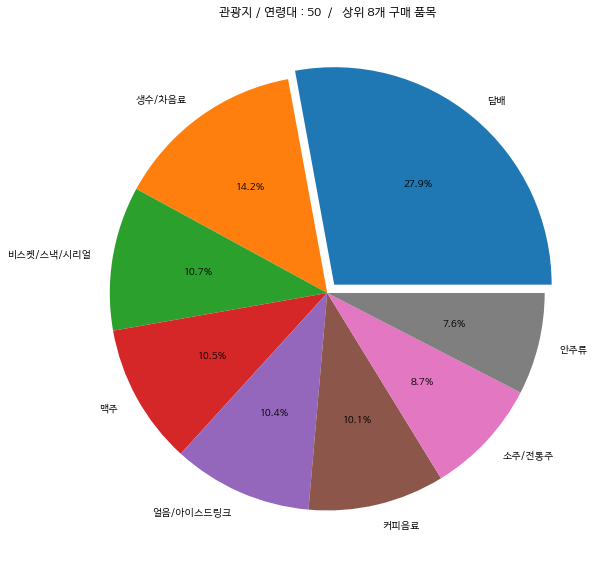

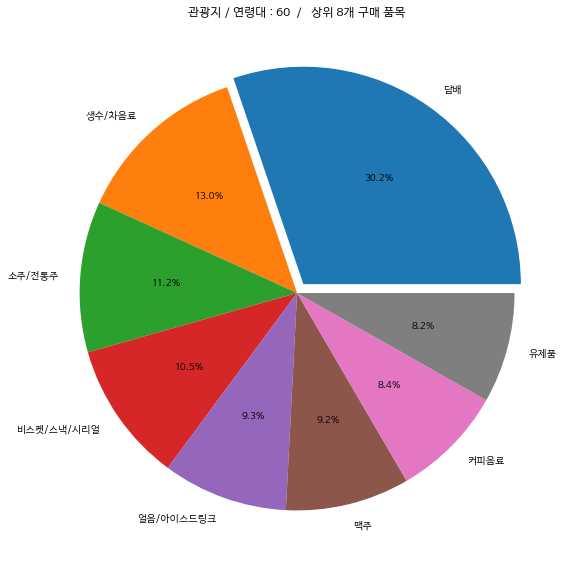

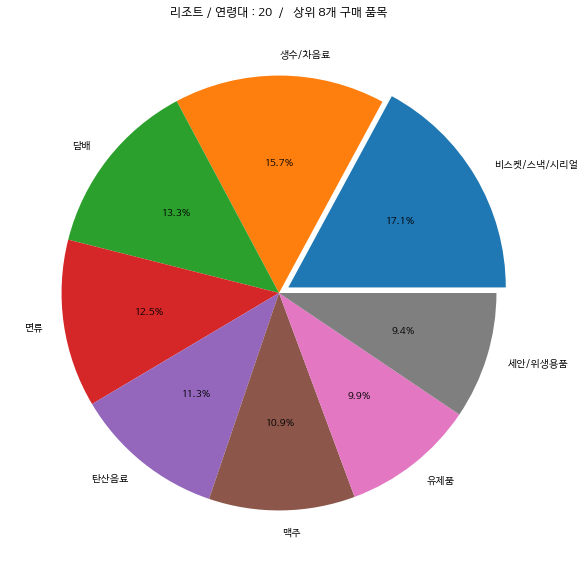

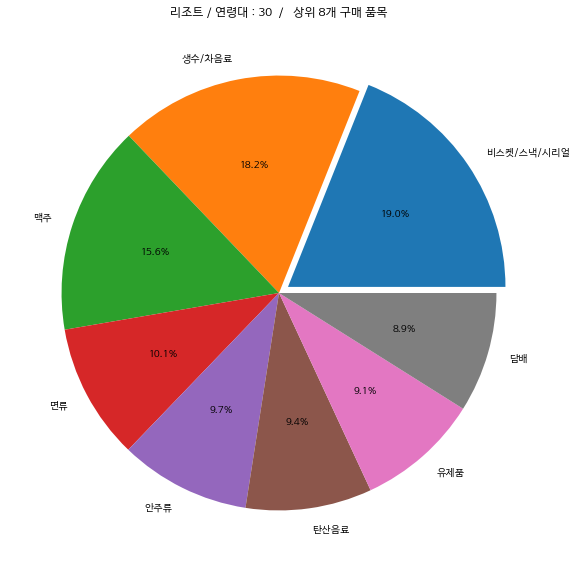

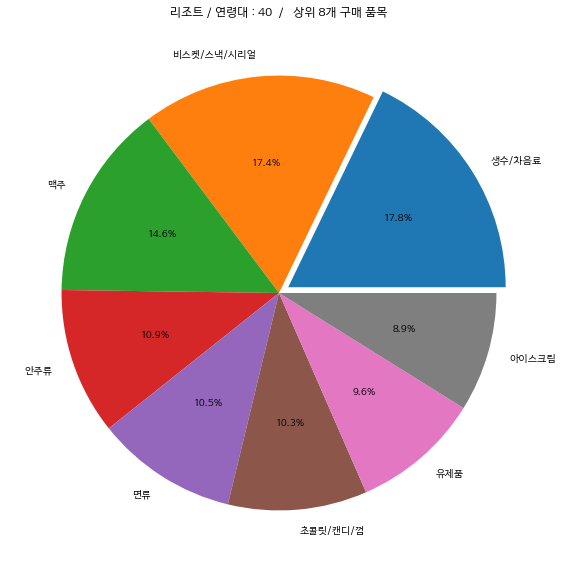

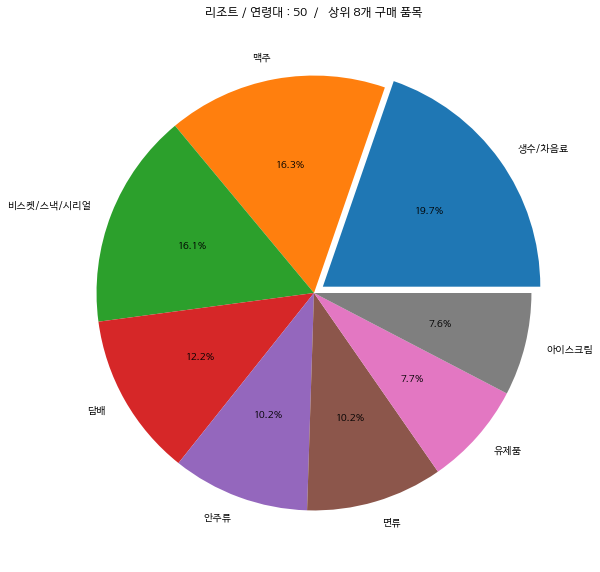

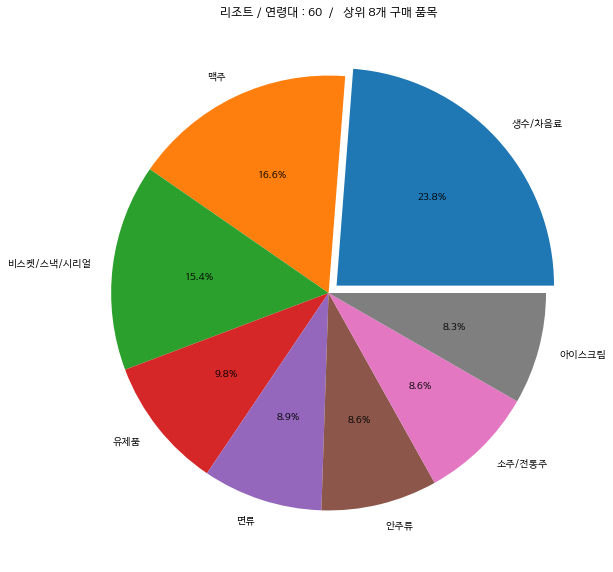

In [13]:
for str in ['독신자주택','가족주택','산업지대(공장)','오피스가','로드사이드','유흥가', '주택근린생활시설', '오피스인근유흥가', '병원', '대학', '휴게소', '관광지','리조트'] : 

    
    for j in [20,30,40,50,60] : 
        
        k = a_g[(a_g['LCTN_TY_NM'] == str) & (a_g['AGE'] ==j)][['MDCL_NM','CUST_CNT']].set_index('MDCL_NM').sort_values(by='CUST_CNT', ascending = False)[:8]
        
        fig = plt.figure(figsize = (10,10)) 
        ax = fig.add_subplot() 
        exp = [0.05, 0, 0, 0, 0,0,0,0]

        ax.pie(k['CUST_CNT'], labels = k.index, autopct = '%.1f%%',explode = exp)
        plt.title(f'{str} / 연령대 : {j}  /   상위 8개 구매 품목')
        plt.show()